# <font color='blue'>Tutorial Learning Objectives:</font>
1. ### Understand components of a simple neural network
   1.  Input, hidden and output layers
   2.  Model parameters
   3.  Nonlinear activation functions (tanh and sigmoid)
   4.  Cost function (cross entropy)
2.  ### Perform forward propagation
3.  ### Perform backward propagation
4.  ### Adjust model parameters
5.  ### Perform simple test of tuned neural network model parameters

# <font color='blue'>References:</font>
- This tutorial is based upon [these slides](https://github.com/jyoun144/deep_learning_tutorial/blob/main/Deep_Learning_AI_Week3_Slides.pdf) created by DeepLearning.AI (<https://www.deeplearning.ai/>).
- Andrew Ng et al.  *Neural Networks and Deep Learning.*  
<https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning>

# <font color='blue'> SImple Neural Network Model </font>

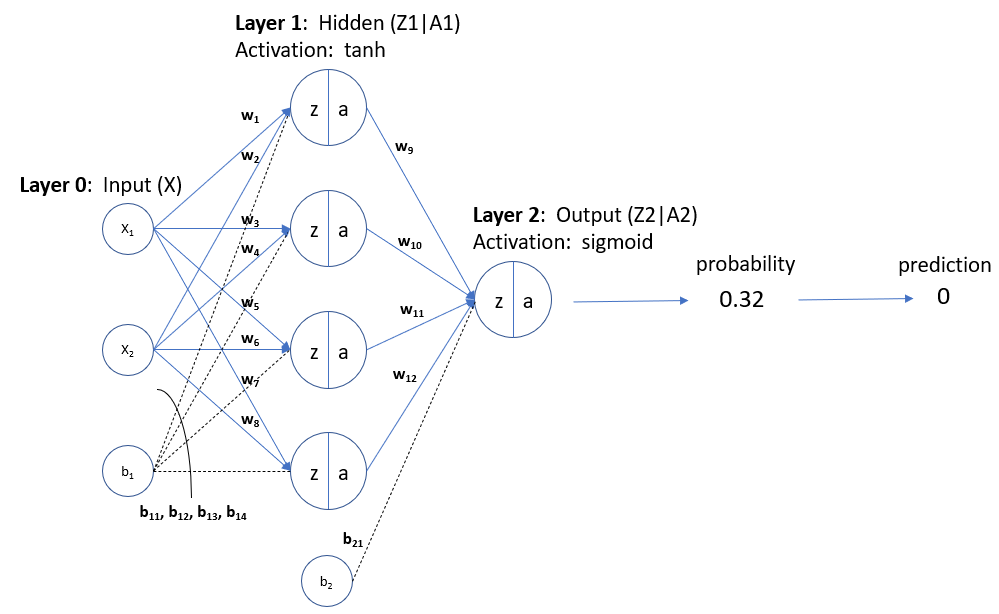

In [1]:
from IPython import display
from base64 import b64decode
neural_network_model = "iVBORw0KGgoAAAANSUhEUgAAA+cAAAJmCAIAAACxB2YiAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAL4YSURBVHhe7f0NeBzlmSf8+royZ/fszs4c+72y5539mHc069337HxttLve7MaTTMSBrGFnFnozIZ6NJokMDEITeyLwBBwZ0ieM7USeMSIQgYw/JIOJ8KcERlgYsGLLDv6WsAwGW7LAH7EBCZHYoDED5Pzd9+0n5eru6vru6u7/79Il111dXfVUd8n6V+npp6b8goiIiIiIko2pnYiIiIgo6ZjaiYiIiIiSjqmdiIiIiCjpmNqJiIiIiJKOqZ2IiIiIKOmY2omIiIiIko6pnYiIiIgo6ZjaiYiIiIiSjqmdiIiIiCjpmNqJiIiIiJKOqZ2IiIiIKOmY2omIiIiIko6pnYiIiIgo6ZjaiSrCyMhIf3+/FnlMy9AiDzfLhKKzs3PKlCkF2+zDrFmzIt0FrH/69OlaEBERhYSpnUpeW1sb4h1gQmclGMIoUp00OHgklVVpYYE1Y/7s2bO1zqTtglu81KZca7Nys0woEHxN9sWOyHazZb/pTU1NmG/dd5t8L5ohJwwwODios3LJtyF5Or5rTUREFAamdip5zc3NmYg1BRM6K5F6enoQQ6WpIurUjke1/sUvZsyYgeDuHEMzjUpEapf2m0SOdxb7YiPnIdY3HXuH3cw08Ip9t8FDWECLXMxKkMt11pWcNzQ2NpZzPhERURBM7VTySiW1I8Yh6sV5rd1rcMw0KhGpvaGhAVsZGRnROgsewgII7mYZvLAoQZ7rsO/5XjQha5ar+1ibzrVwsyF5ukP7iYiIvGJqp5JXKql9bGxMJiQ1AlN7PsjEpntMTrLj1u4xmIOTIgTlgvue70UT0uGqp6dHkjcm9IHL3GxIOsmURJctIiIqFUztVPKcUzvSVVNTk+nPIJdI5SKo5DOwJTMsg5mmvzLSNp5iOrcgpVmXHxwcxEw8RRaTaX0sD0mNkJ3aJSm6T/P5Amh2oMxeEsuYlwUtl34doA9nuFxGmg14lWzvgrw7eJUQZOU1xOvjfH4lL6l5/bNJJrbuHeBZMpG97zb5XjSB/ZV3ULaCvZb5hpsNFdwFIiIir/L+6iIqFc6pXSK4DeIjAijCt5TW4CVRDCSuIX7lXAMinW15yYJCHsrHLInn6qzLZL5zqLXKF0CzA6VtSdl37BpOaQAT5rREl3C3jERbWQbNlgWsSVfeHYn+mG+WcdhHOZvKtwDeOGwOC5j0bOMQpkW+Fw0kbUv75RQF25KHsjlvyPm5REREXuX+1UVUQiQXQs6ch+SE+ZLwkMPMVWGJ3SaGmi7ISJ8yRy6oS8LDSiRhYzFz7RlrwxyJbsIEfXx3IOsEWaeVv2vt+G4jjcSELpcVVWXHzYawL2a/ZA4UXAavBl4ZLCYvhZANmRdB3h0sZubgWTJHymzyFlj/oGGFFxmP5sv0IO+Idd9tbC+FlW3T8naYMzQb5w3Ja6UFERFRYPylQiXPObXbSNIyC5uMbrogS1SVTCn5ErCYPApyBRok25kV2sKrA0mNYAKxb2ZVOVkDpTWqyhVlxEopBRqfeZKHZeSiuK33tlx9N++FvDu24CuNMWdKNvJozhdHXm3nl1qWse67jfWlsMGaracT8l7n6+jivCGHvSAiIvKBqZ1KnnNqR7xD5jYXiQ1Z2ORyiacSVUGumksAzUfWINHNlG5InoPgkS5fAM0OlNYlbcHawExPy8ilaOn3YtiuhWMCpW1PnROtw6NyTuX8umXvu431pbCSd1/eegMhHjNzniQ4b8h5H4mIiLzK8auLqLRILgSTFA2ELUld2czCJtAjwds+n2rWnJPtWnv21vORPAfBI12+AJodKK1Lyn5lNxgzPS1jdiSbuQAv67HtqTwx3+7ne1RWle/Kt5G97zbWl8JKzjewfmzIkPME298KhPOGnPeRiIjIqxy/uohKC6IV4hFgQmddZjrAIJDJ5VJJWmAWNhfUzSV500fChPjsNRvZKyxI8hwEj3T5Amh2oLQuGe61due9wBqyl3FOtDkfNb3hHfrGiOx9t7G+FFb5TvAg59qcN5RzL4iIiHzL8auLqLRILoTsiCnJCUzUM73SzcJ4SObIVVUwfSQkloHD9V2zTPbW8zGtCh7pZFVaWGQHSuuS2Y+CeR2kdLOMvPK2fu02soxtT6Ux+XZfzrXkTxmGPMV5WyJny61kVVpcJgeGrXuMkDSf3QvfeUNyOGlBREQUGH+pUMmTXAjZudlca5e0h5hlrqdaF5ZrxoY1L5oojzVI9Ed6w3PN9XiJbpC99XwkNUJ2bHVz9doqZwCF7EBpW1JeBzOuC3bN9BSSOVBwGbn+jZdIXhmjs7PTzJF3x7ZH0ph8uylPsb6ecuHfujsOsvfdxvZSCOkeYztVEPJQ9gmD84bwkDlIiIiIgsvx+56otEjIy4b55tOl2ayh0FyAB1vSQjKT8GpjFpPoBtYV5mQ7N7DSJS73Pym4KiNnAIXsQGlbUnIw9gInNoAJJHIJ5bqEu2UwX5ZBtEWzUcp5jsn6mIkS7ZFSSGNsMw1pvPXvG7I81owJG2xRlsGbiG2BhGwsLGX2VvAsLKBFBs4xsAug9ZXk8MCOm1LW7LAhOfCwIa2JiIgCy/H7nqi0WDO3FYIUHkWWkqAJmMDCEittl06R2GQZRDGdddnIyAhmyrMAK0FSNP0lzIlBwc4bblJ7uNfas4OvFhnmpcC+47VCcsUytuTqchlZuSyG18rafjwL8217JLtpkn02PIrtauH40mHTzstkv6HZL4W8XNlLGtgvLCB/QHCzIRwMmFPwkCAiInKPqZ3oEhPFkEF1FhVPwVgfRHZqD520P7srPBERkW9M7US/HLXddhWZigXnTng75K8loYs6tY9lPrNretQQERGFgqmd6Jc94x36SFDMpmdoEaqoU7t8HgDftSYiIgoDUzuRxrhp06ZF1CWDfJDs676Lv3t4uyP9owrWH9H5BhERVTKmdiIiIiKipGNqJyIiIiJKOqZ2IiIiIqKkY2onIiIiIko6pnYiIiIioqRjaiciIiIiSjqmdiIiIiKipGNqJ3IymKFFNEZGRqIYlTw5sHdTIrvRKRERUYVgaqey0tDQIPdL0joY5HWsDbSOBlqLTZRxcGdqJyIiCo6pncrH2NhYJmNf0tPTo3Ndw7Nmz56tRcbIyAgidYj3ucx5V84ZM2ZgZtRX9N2I6KahTO1ERETBMbVT+ZB74CN5Z+dvN/AsxFYtooH1YytaJE9EzWNqJyIiCo6pncqH5PWxsTHpc4IJfcAdPIWpPYrmMbUTEREFx9ROZUK6x8gldund3tnZKQ9ZITtOnz4dj8rC0pFG0qqVuVSPaRPlMZ3dgaStrQ3zJZKiDbb1m34vmC8zDbOq7KxsW8+MGTOwFX0sQ9aGlWMfZTGsTdpgSKd803hnDs1z2CmQRI7mYcK8jHj9radMJrXjiXh6zmWIiIjIGVM7lQlJz5LUkcUxbZK3IbES35Egm5qaJIliPp4lsRVzMAGmW7wsL9NIzyhtPeZlJvKodILHNPIo1mA+F4v5WAzJFTNli5ktNJsgLq2SaUCWlXXa2okV6hKXQ7YsJpsza9YlLEFca0f5mue8U/JEzLE2WHbHvGhglsET8y1DREREzpjaqUxIcDSXbyVrmnAJpte71pl8bL0enzNHWmfKGqzpGevHHGwa0wjumLBuEfEUj1ovk0ta1eIy20zEdNtW0E7J04i/MkfWjH00l72lJZgjJeAhzPGUjLObV3CnJJGD9ZWU1pq2uVmGiIiInDG1UzmQzGpN5JJ9sxOzQ0zEo9kZ1zoT6RmlNRlj/batWElaRczV2l1ql/MNc/ohbKccEp2tIRhkPdaE7VXO5tnYdkpK6zkG2JrnZhkiIiJyxtRO5UDSszUCypVmuQouUIIWueBRE9AN20zplm06ycgFfmtQRtrGo4ikIP1JMKGPuUjt0uzsZtjmY50okYalFLIe20xPcjYPHHbKFuIFSq/LEBERkTOmdioH0t2iqakJKdDAHDCRWkqZzgmPZsdl20y55i2XjeUCv/XEQC7w26Al+rCL1C4BN7sZYJ0vexdPanfeKaZ2IiKieDC1U8mT69D5mFwopUznhEez47Jt5lhmWEnpJGO7wC+BHiHedMLJTqs5Y7F1pjwluxlyhmDmS+S1BXRZj22mJ9nNK7hT2fsI0jxPyxAREZEzpnYqeXIx2No9Rkian375zqYSSU36zIZHs+Ny9kzpItLT0yPdY0wH9OzQnJ1Ws2Mx2GZiWs4KrKzX+EEir3VbkN0Ar7KbV3CnsvcRpHmeliEiIiJnTO1U8qR7jO3jm8I6UIlcGrcNB2n9ICkeNRHfwEwkVy0ykNdlpm1tti7vaE++fu22D4zasrKsx/osrMq6IyCR1xbQbQlbTlpsjXeW3byCO8XUTkREFA+mdiptkghtWdyQy/D4jmkkTrk6jmyKsIiZEoVlSZDMilXJozJTlpdpY1pmmBewXuCXNI+H8FysASuXxazBFNOYg2ZgwrRZtivTgNAsTzTtlNJ6giHrcU7tsgxI6UZ28wruFFM7ERFRPJjaqbRJ+MvuHiPkejNiqJRyqVhyJ74jmJqryICFJfiCSZOYzk7tiLCYjzVghTorA2uTEwPAyqUzujWYmmvVYFYrG5VpgSeadoKtnSB7bUvtWAwzzfV4H9faczbPeadyJnL5s4Y5zXCzDBERETljaiciIiIiSjqmdiIiIiKipGNqJyIiIiJKOqZ2IiIiIqKkY2onIiIiIko6pnYiIiIioqRjaiciIiIiSjqmdiIiIiKipGNqJyIiIiJKOqZ2IiIiIqKkY2onIiIiIko6pnYiIiIioqRjaicqYSdOjT+7+7Xl6/c03b+19q7O6+e2X3PLipm1rZ+5aR2+YxpzMB+PYhksieX1mURERFRSmNqJSs/gqz99YO2uLzU+NuvWlXcs3YLpJ7e//NKrPx09885b4xcuvP/BNXfswndMYw7mP9X3CpaZv/RpLI9nYRpr0HURERFRKWBqJyoZOw+cWNT2PJL3jbc/9uDjuxHH9YEsSO06lQXPwnOxBqwHa8M69QEiIiJKMKZ2ohKwdsuhq+Ysv+meDR3dB0Zc9HJxSO0G1oO1YZ1YM9avc4mIiCiRmNqJEu3pHUdTf7Xmm997cujYWZ3lgpvUbmDNWD+2gm3pLCIiIkoYpnaihOo/OFq3cB2+MKGzXPOU2kWQzREREVHUmNqJEufk2YnG7z8V5OK3j9Qu5NI+to426CwiIiJKAKZ2omTZPfD6VXOWr3nygNa++E7tAltHG9ASrYmIiKjYmNqJEmRd70uf+coPt+8d1tqvgKkdXthzHC1Be7QmIiKiomJqJ0qKZR07brxj7Wuvv611AMFTO6AlaA9apTUREREVD1M7UfG9N/nB7c1bbm9+6r3JizormFBSO2Qa9hTahgmdRURERMXA1E5UZAjEN96x9r41O7UOQ1ipXaBtaCGDOxERURExtRMV2e3NW8KN7BBuage0EO3UgoiIiGLH1E5UTMs6dtze/JQW4Qk9tQPayT7uRERExcLUTlQ063pfiqjnSRSp/b3Ji2gtR5UhIiIqCqZ2ouLYPfD6Z77yw1BGjMkWRWoHtBZt5jjuRERE8WNqJyqCk2cnrpqz/IU9x7UOW0SpHbbvHUbLeedUIiKimDG1ExVB4/efCnj3U2fRpXZAy9F+LYiIiCgWTO1Eces/OJr6qzVaRCPS1A5oP/ZCCyIiIooeUztR3OoWrnt6x1EtohF1akf7sRdaEBERUfSY2oliFU/ejTq1QwznHkRERGQwtRPFKp6+JTGk9hj6+RAREZHB1E4Un7VbDn3ze09qEaUYUjtgX7BHWhAREVGUmNqJ4nPVnOVDx85qEaV4Ujv2BXukBREREUWJqZ0oJjsPnLjpng1aRCye1A7YI+yXFkRERBQZpnaimCxqe76jO8Ix2q1iS+3YI+yXFkRERBQZpnaimMy6deXIqXEtIhZbasceYb+0ICIiosgwtRPFYfDVn954+2NaRC+21A7YL+ydFkRERBQNpnaiODywdteDj+/WInpxpnbsF/ZOCyIiIooGUztRHL7U+NhLMV6QjjO1Y7+wd1oQERFRNJjaiSJ3IvbO33GmdsDeYR+1ICIioggwtRNF7tndr81f+rQWsYg5td+xdAv2UQsiIiKKAFM7UeSWr98Tc8/vmFM79g77qAURERFFgKmdKHJN9299qu8VLWIRc2p/cvvL2EctiIiIKAJM7USRq72rM86PokLMqR17h33UgoiIiCLA1E4Uuevnto+eeUeLWMSc2rF32EctiIiIKAJM7USRu+aWFW+NX9DCuylZmpub9bE83KT2kZGRhoaGadOmYYX4jumxsTF9zCPsHfZRCyIiIooAUztR5GbWtl54/wMtvENGN2bNmoWQ3dbWpo/lUTC19/T0SFhvamoyq50xY4Y+7BH2DvuoBREREUWAqZ0oQuff/4cXj4z/xy+3fvzxxzorgLGxMeRsKHhRvGBqR+63XVyX4D44OKi1Fx999NFnblp3dnxSayIiIgobUztR+IZPX9i048z81qH/ueDFL8zf9bmbH39v0v+1dqOpqQnBurOz8Oc+ffRrb25uxsr7+/u19uLC+x98/taN6dVHtSYiIqKwMbUTheP8+/+wa2hsaeex1MI9CM1XfNU//tb4eV3Or8HBQaTqWbNmae0IG9UpRyMjIzgHyHS90U4y/lL7pX7tf7GqdtF+nK7oLCIiIgoVUztROHr3nftlTL/dEtnv2PUn8340ejroGDIzZsxw34MFG9WpPMbGxiSm2/hL7TKGDF6B+mUDOouIiIhCxdROFJqlncesYd18/dmd6wOO197W1oZI3dTUpHUh2KhO5dHQ0IAV4vvIyIjMCdJDxozXjtS+a8jnQDRERETkgKmdyo3kUTPKyuzZs7PLnp4eKcM1fPrCDQtftOZ1+Zr/d71Pbn9ZF/LO/YdQDWxUp/LAiwBaZARJ7U/1vSL3Rh08/m5q4R6ZSURERCFiaqdyI5elkc6lzKTTX5bIvijNBeZwIbP+r7uzOrXfsWv5+j0PrPX88VBDzkPcfAjVwEZ1Kg95HcxpAF4Q6YHjL7Vj77CPMp1efXTTjjMyTURERGFhaqdygwCK9AmYRgaVaUApH+j0PSq5s95952oX7d81NHb+/X+4oemK7P7s7tfuWLpFl/NIdgchO/ORUWX+dJBPwdQuw9FMnz4da8P0pSv5mRzvL7XPX/o09lGmsfuphXs4CiQREVG4mNqpDJnLxoikmDCjo0iJ77pceDbtOIPIPnj8XSkbHzx8fdOL3+04ivSM+SdOjc+6daU85JWcadggbevDeRRM7YDXAevB2pDXEdzlvkv+Ujv2DvuoRaZ/P760ICIiojAwtVMZkgvJ+I68jmAqeVRKTJhhWMIK8Q91n6hfNmCuLu8aGpvfOvTa6LmqqqpDr1watR0zv9T4WMAPpHriJrWHBfuFvdMig5fbiYiIQsfUTmVIOsbIFXe5A6gpzVVqGac8YGpHPF3aeQy5HBNmDhL84PF3u7q6UqmUzIQH1u568PHdWkQvztSO/crutd+775ycrhAREVEomNqpPEkvbZAPcZqxyRHiZQGBOb5TOwJ6evVRpHYT2WFN7xtyi9B0Oo3gLjNh8NWf3nj7FRekIxVnasd+Ye+0sJBe/loQERFRMEztVJ5k3BWQ4WJkYBmw9dvGHH+p/ez4ZP2ygYe6T1gjO6Yd7g8669aVI5bO35GKLbVjj/J12Udkx6uhBREREQXD1E4VzV9qRy5HHs0e3xAhHl+YGBjIcYvQRW3Pd3Qf0CJisaV27BH2S4ss81uHeved04KIiIgCYGqniuYjtQ8efxeRPTuMnh2fxHy59F5VVdXX1yfzjZ0HTtx0zwYtIhZbasceYb+0yILXhDddIiIiCgVTO1Wozs7OSz1mMgoOpGjICI85u2unVx9d0/sGJrq6uqqrq2WmzVVzlg8dO6tFlOJJ7dgX7JEWeSztPCZ/fyAiIqIgmNqJ3JLInrPbuvThlgvto6Oj1s+hWq3dcuib33tSiyjFk9qxL9gjLfLAa4LGcBRIIiKigJjaiQpD9LQNym7jvgN36q/W9B8c1SIyMaR27AX2RQtHZlwdIiIi8o2pnagARHbboOw2m3borZSgL0Omc3p6x9G6heu0iEwMqR17gX3RwhFet3x/oyAiIiKXmNqJnCBxplcftY3waIX5qYV7Bo+/K2VNTU2+7jGG+7zrW9Sp3eu5R+++c/XLcoyrQ0RERC4xtRPlJSM8On+Yck3vG0s7j8n0wMDA1KlTJyYmpMzHfd8S36JO7T76+SC186ZLREREvjG1E+WGyI6gmT0ou5WM9mjt7D466irLNn7/qTVPRjh2e6SpHS1H+7VwDa8nR4EkIiLyjamdKId8g7LbLO08JqM9enXy7MRVc5Zv3zusddiiS+0v7DmOlqP9WnthBsckIiIir5jaiewcBmW3kmRv+rt3dXXV1NTItBu7B17/zFd++Nrrb2sdqohSO1qLNqPlWnsknwHgKJBEREQ+MLUTXUEiu5tkOb91yNp/JpVKpdNpLdxZ1/vSjXesfW/yotbhiSK1vzf5AVqLNmvty9LOY+ZjAEREROQeUzuROl9oUHarXUNjZrRHgdTuslO71bKOHbc3e+4jXlAUqR3tRGu18AsvssuTIiIiIrJiaie6BGkyvfqow6DsVlgG4d6M9hjQ7c1b7luzU4uQhJ7a0UK0U4tgeveds53wEBERUUFM7UQa2R0GZbfJvtlnwTHaHUjPk3CDe7ipHW3L9OT5QOvA3HxsgIiIiKyY2qnSuRmU3QrJHstb7/Q5MDBQVVVVcJh2BwjEtzdvub35qbCScVip/b3Ji2gV2hZiZAdEdryGWhAREZELTO1U0SSyOw/KboN8b4v46QwtAljWsePGO9aGMqpMKKkdLUF7gvdlz2l+61DBgTWJiIjIYGqnyiVDN3rqqmEb7VH09fX5+BxqTut6X/rMV374wp7jWvsVPLVv3zuMlgQcMcbB2fFJ3nSJiIjIPaZ2qlAuB2W3md86FPV9gnYPvH7VnOUB75waMLVj62iD73HZXVraecx9xyQiIqIKx9ROlQjJ2+UIj1bSG9t2oT2dTg8MDGgRkpNnJxq//1Tqr9Y8veOKz7y65zu1Y4vYLrbu7+6nnuCVRDs5CiQREZEbTO1UWZAUl3Ye8xHZ8UQ8y3ZtfmJiIuDnUB30HxytW7gOX5jQWa75SO1BNudb9mg8RERElBNTO1UQJG/3g7LbbNpxJjtftrS0pFIpLaIhF7+/+b0nh46d1VkueErtWDPWH+TSvm94I2qvHJCHiIiIcmJqp0ohkd39oOxWeEpq4Z6ct1WK6EK7zdoth66as/ymezZ0dB8YOTWuc/Nzk9qxHqwN68SasX6dGzuOAklEROQGUztVBBnh0fcHSfHE7M9NxpPXrXYeOLGo7flZt6688fbHHnx890uv/lQfyOKQ2vEsPBdrwHqwNqxTHyie+mUD+UaBbGhomDJlSltbm5SzZ8/OLnt6eqQkIiIqY0ztVP4ksvseHfzs+CSent0PPp1Ot7S0aBGvwVd/+sDaXV9qvJS85y99GtNP9b2COD565p23xi9ceP8DpHZ8xzTmYP6T21/GMncs3YLl8SxMYw26rgTAG5RvFEgEdORypHMpMW0tp02bhnJkZERKIiKiMsbUTmVOOmDYPkXqydLOY9kX6eVzqGEN0+7biVPjz+5+bfn6PU33b629q/P6ue3X3LJiZm0rUvul77eswBzMx6NYBktieX1mwqRXH835lxAkcknqmO7v75dpQDk4OIiJGTNmZBYkIiIqc0ztVM78DcpulfO2SoC83tjYqAUFJp8cyDmwD3I50jkie3NzMyZmzZplLfFdlyMiIiprTO1Uttb4GpTdhjfej81D3SeWdh7TwqKpqQnpHN+R16dPn97T02NKTAwODmIZc0ke2GGGiIjKElM7laHzlwdl9zFcjBXyOlK7FhYTExNdXV1aUEjwZtXmGgVSOsbIFfeGhoaxsTFTIsTLMkjweAgT+I5pmUlERFROmNqp3CD8pVcfxVfAyC4hMudojzEM016Z8p0myadOobOzE6VcZQdJ6oD4LtPNzc0myhMREZUTpnYqK4jaiH3+BmW3WZP/tp01NTV9fX1aUKhyfg4BiVxiuvR+kYFloL+/XxZAmpc5wNRORERliamdykfAQdmtZLTH7N4agpE9OjLmjxbeId8ztRMRUVliaqcyIYO99O47J9dlA96X56HuE6Gkf/Ihvfqo708A483lqDJERFSWmNqpHCDkmZ4Vwe/LgxOA1MI9OfvYTExMpFKp+O+KWlHOjk/me/3zMV1opHc7ERFR+WFqp5Ing7Kbj40Gvy/P/NYhrFOLK3V1dfFzqDFY2nks5yiQREREFYupnUrbQ90nsgdlD3Jfnl1DYw5DRtbV1XHMxxjg9b/mjl0Bx9onIiIqJ0ztVKoQ7JZ2HpvfOpSdsN3clwfwEEowHWawKkT2nKM9GuweEw+HMXyIiIgqEFM7lSTEa0Q6pPbsyA5u7suD+Qjr0p3GdIbetOOMQ1IcGBjQKYqFwzA+RERElYapnUrP2fHJgoOyF7wvj2FmYm3OMbG6uppjPsYp4CiQRERE5YSpnUqMDMqe79OiBoK4xHTp/ZJ9Xx4hPd1lmTW9b+BMQOZnGxgYQGrXguJSv2zA9yiQRERE5YSpnUqJGZRd62CkI41cjJfbKjlcvEdqb2lp0YLigpO01MI9WhAREVUwpnYqGTLCY/bt7v2RyG7Gk0mvPsrbKiUT3xoiIiJgaqfSYBuUPTjT0x3++b/9nPOF9r4MLSheeF9SC/dwFEgiIqpwTO1UAnIOyh6i+a1Dzr1uUqkUh2kvojW9b/CmS0REVOGY2inRzucflD0sm3acwfq1yGV0dHTq1Kkcpr2I8O7XchRIIiKqbEztlFzIaunVR51HeAxI4mDBjjccqb3oevedq1/Gd4GIiCoXUzsllAzq4jAUYyjY9aKE4HgI67PIREREJYepnZJo+PSF+mUDBQdlD0hODJy7y3d1ddXV1WlBRTV4/F2OAklERBWLqZ0SJ9xB2R0s7TxWcEhBRPZ0Oq0FFVt69VHedImIiCoTUzslS7iDsjuQc4OCPeZrampGR0e1oGI7Oz7JUSCJiKgyMbVTgkhkjyeTzW8diroHDkVhaecxfhSBiIgqEFM7JcL59/8h6kHZrXYNjTmP9ih4Z6UEwqFyzR27eLmdiIgqDVM7FR9yWHr10UgHZbfCVnB64Ga0Rw7TnkybdpzBAaMFERFRZWBqpyKTyB7poOw2a3rfcJP50ul0Y2OjFpQwtS5G2SciIionTO1UTMOnLyB+RT0ouxXODbBFN3fZbG9vZw+ZxNo1NIb3UQsiIqIKwNRORRPPoOw2OEOI8ySBooODh6NAEhFR5WBqL3OdnZ1Tpkzp7+/X2gUs39DQoEVkZODFmG916XK0R0in0wMDvH9+oskokFoQERGVu6Cpfdq0aQh5+K51gjU3N8+YMQOtBUyg1Ad8QQ7GegKuJAbTM2S6ra0NbZ41a5aUxuDgoLwmUiKyoxwZGZEyCrENym4zv3Wo4G2VYGJioqqqisO0J5+b+2QRERGVh6CpHfFOaJ1UiKraUIsgV5SLm9qxO27OlKSRCOtSjo2NIcFjTk9Pj8wR8uJ0dnZKiUcj3TXErNhGeLSSntBuLrS3tLSkUiktKMHwbvKmS0REVCEqIrVLLxGQmD4yMmIuunvqOmJV9NSOrWuRX/ZVc3kpzNV3kB2xXYDHKYF1mbAgYy3tPFaUyI5NY7vur+7zQnupcDkiEBERUamriNQuF5itF6dtOd6HkkjtOcO3PNdcgJcXx3b2InF/cHBQ6zAgN8c5KLsNR/guVzicat0NCkRERFTSok3tCMezZ89GdpRlZsyYYbphyEzTl1pIx2sweRETZg34jmlrlESJ+XhWT0+PpE8TRo2RkZFLa7zycnL2TOnbbbvk7CA7teO5aOHY2BhmSoPRJFtfFHkKlkEsNq9A9jK2ZkjbsLOYxtMxbYX1yGI21mdZSculqXL2kn3qIm9E9ovpm0T2OAdlt8JGUwv3uBzeO51Ot7e3a0GloHffufpl/OgwERGVuQhTu4ngNpIFc/ZRQVqVmdKpw1wRt0LcNMFdljfPguyL3xJSwZZNZSZIadKwlAXlTO2Yg/1CC5syJJdbdxClnIQg0OO5ckk7exlbapdtyUxM44lyioIJyJet5fXHAlpbyHblzAGsXWiEbDE78fsjg7IX8VOD2LT70R6rqqo4ekzJ8dT9iYiIqBRFmNqRFxE0e3p6xsYu/TaVIAhInCiz+6hgMZkjF+BRIlBKKbESazBzMs/4ZcrHfER5PCVfAAVbfpWZIGUo19oxB22T/QXZR2v2RQnYZbOMZGuzR4DS1gzZlnWmbEuLPHDagGVsF/IFXiV5JSFnrJf3wv2r4UAiexHH1T47PokGuOxJPzo6ys+hlqLB4+9yFEgiIipvEab2bJI1ZWHJhYD4KI+aHC8Xj01pzZ2SREFSr1lhvuvN4DK1e5UvtdtOGzBHzlKElCayCwnQZiambXHZX2qXZfBcra+Ecwk8CuYPFzbyqBZ+FWVQdhsODlgh0quPxnzHLiIiojgFjWWS7UDrKyFwS4cQXegyedT0D5FcbnKkBF/zaE4SRiWYwqXV5RFzatfisswWfjkT09bwLWzxOnsZ2ZZ1Zs5t2dhWayV/WJD3JV83GDwEWvhSrEHZrdzfVgkmJibYN6Z0nc3cdImjQBIRUbkKFMtAsh1obYFEq49lkQUQ1qWUTjISIrN7v2TDkpLszTLylJxMajddcYTMtF4I96SkU7t5SPrH51wG80EL74o1KLvN/NYh951zOEx7qVvaeQxfWhAREZUX/7FMSLYDrS+zdoAxoVDCIkgJkhrB1j0GzKX3nJlSZK8wm1xXBiyss/IMLOMJWoWnl2Jql5da1ibT1l71BuaDFl6cvzwoe1GGi7FCXkdq18KFmpqarq4uLagE4ZC75o5dvNxORERlyU8ss5JsB1pfJkETmpqadJZl3BitLf3UTXw3/cLNpXqHPusSTEHrPOQqPr5rndWH3gffqT376r40T4tcy8gfJSRni5zbssn5aVScTclLbV5nWRVeECmFnNVYt+gSYlN69VF8FT2yowG1i/a7HO1RtLS06BSVLJyqcWB+IiIqSwWSX0HIdkLry8y1dmRETIO1n7ouZLkQLqwXfc3lcIRaEz2xPNZj0qQkTpAyH7NpCdlYsyRXrNmEV2mJ+5zqO7WDta8OThswx9q5XNqG9kiJCYn11rbJtkzjc5LTHmsLQWZaGyA7gk3gPdJZl2fm6/KeD4Ly/NahYg3KbsNbZlason+agoiIKAoF8m5ByHY54SHTxSWbPFeYC/Bgu/ItiTabSZMuUzvyqARfG+sFZomzoHUhQa61ozH4jufK6YT15AFkrzGzqalJFpDv1tQurcVLh4l82To7ecuJkC2gg7Tcui/SBuucgoo+KLvV2cxoj+7vlzkxMVFXV4fvWpeOE6fGn9392vL1e5ru31p7V+f1c9uvuWXFzNrWz9y0Dt8xjTmYj0exDJbE8vrM8oXIjndfCyIionLhNqTmY83cVngI0RC5U+IyviN6mjwqzxXWaJ598RjRE7lTVgLIl1jehE45MbCtMCc8BQ0w68ETsWZ9LCOia+3YorV5sgnsprQcMGEuqxtYrVxxx3fsL+bIkvIoyO5kVuDUZjyKNWhxuc9MdhaXNA9aX35hsxuWjwzVUsRB2W0e6j7h6fyhq6urpqZGi1Iw+OpPH1i760uNj826deUdS7dg+sntL7/06k9Hz7zz1viFC+9/cM0du/Ad05iD+U/1vYJl5i99GsvjWZjGGnRd5ah+2UByjkYiIqJQBE3twUlcBmv3mHKF3XR/YhCc1/Bt4EzDGvedyaXN5PRJkBvueOqlk0ql2tvbtUiwnQdOLGp7Hsn7xtsfe/Dx3Yjj+kAWpHadyoJn4blYA9aDtWGd+kAZkVEgtSAiIioLxU/t5pqxXFQub9jNOFO7fIzVU0cXkGc1WT5G7EAGZff0oc+ozW8d8nG3nYR3j1m75dBVc5bfdM+Gju4DIy56uTikdgPrwdqwTqwZ69e55YJ31yIiojJT5NQ+Zulxnt09pvxgN+NM7TA9Qwt35DzKzdvxUPeJJAzKbrVraCwJg06G6OkdR1N/teab33ty6NhZneWCm9RuYM1YP7aCbems0odjgKNAEhFROSlyapfe4YCkqLPKGvY05tQuY1zaOvE7c/N2IBIt7Tw2v3UoUfkYjUFk93rhv6amZnR0VIsk6T84WrdwHb4wobNc85TaRZDNJRPHESIionJS/B4yVHIQjhGGkNoTFdlh044zXlPawMBAdXW1Folx8uxE4/efCnLx20dqF3JpH1tHG3RWycLx6WkoISIioiRjaidvzo5PJmdQdit/EQ2pPWk3V9o98PpVc5avefKA1r74Tu0CW0cb0BKtS1bvvnP1ywa0ICIiKmVM7eSBDMru47OeMVjT+wbOJbQoWet6X/rMV364fe+w1n4FTO3wwp7jaAnao3XJQmpPzgBHREREvjG1k1tJG5TdSm6r5PXy/8DAQKJ6tC/r2HHjHWtfe/1trQMIntoBLUF70CqtS5OMBKoFERFRyWJqJ1dkhMfEXrNMrz7qY5i/VCrV1dWlRVG9N/nB7c1bbm9+6r3JizormFBSO2Qa9hTahgmdVYL8HR5ERESJwtROhSGy+xibJTY4l/BxoX10dLSqqioJw7QjEN94x9r71uzUOgxhpXaBtqGFpRvccWykFu7hKJBERFTSmNqpgAQOym4zv3XIX7+dhFxov715S7iRHcJN7YAWop1alKClncfwpQUREVEJYmqPz1vjFzZuO7ysY+eC+565+Z4N18/tmFnbii9M3PydDZiJh7AAFtMnFNv5RA7KbrNpxxm0UIsStKxjx+3NT2kRntBTO6CdpdvHnZfbiYio1DG1R2745Njqzfvn3L0eAX1By9aO7gM9O47uPXzyxOnxC+9fxBcmUGImHsICWGzOwvXtXfvxRF1FMSDlpFcfTeAIj1ZoW+2i/T667gwMDDQ2NmpRPOt6X4qo50kUqf29yYtobemOKtO771xJn+AREVGFY2qP0IEjpxru3Xxt/colK7Z7ut8kFsZTrq1fhadjJTo3RjIkS/IHUlzT+4a/bg/pDC2KZPfA65/5yg9DGTEmWxSpHdBatLl0x3FP8ieqiYiInDG1R2L45NiClq3X3bZq47bDOssXPB0rwarivO6e5EHZreTUwl+fh6lTpxZ3zMeTZyeumrP8hT3HtQ5bRKkdtu8dRstL9M6p8sFlLYiiNzIyMmXKlObmZq3Dg3VizYODg1qHTdaP9mtNRAnA1B6+5lV9M2tbV27ap3VgWBVWiNVqHaUkD8pus7TzWOkO59f4/acC3v3UWXSpHdBytF+LUuP7s8sxmD17NnJSpFEsFP39/Q0NDdOnT5fWzpgxI6xUijXjRZg2bZp1zWNjJfznEbxQ2BHJvm1tbbJf2bDXsjx2Fothx2U+Jjo7O+UhG0nVeMW0ziInDIAV6iyLghuSp6P9WhNRAjC1h+nd85NzF3ffuawHEzorJFghVouVh75mq4QPym4lZxf++twXfbTH/oOjqb9ao0U0Ik3tgPZ76vSVHGfHJxN706VZs2ZJhHKIYkWXL3oGj3cScAHnA3gpzKuBEO/jNAZPNFE4dC6vcyMZo/GmGT09PbJfVnLygwlZRmI0nmUegpwnRQVTe1NTkzwd69RZFm42hGWwQEmfNRGVGab20Bw5fi41r+PBx3drHQGsHJvAhrQOlUT2UhlkY37rkL8+PKOjo1OnTtWiSOoWrnt6x1EtohF1akf7sRdalJqlnceS+ZkN5CcJTwlP7WgnAiimkefM3wcgyJ8IJGIiI1r33azfR3bEs0wUDl3BxCw6OzuxWL6L5UISs7yeUlqXlzMZ7L7WFgXbgFWBpPPst8bNhuQMzbn9RBQnpvZwbNt9bMaXH9j8/BGtI4NNYEPYnNZhOP/+PyR/UHarXUNjvgcDSafTxR09Jp68G3VqhxjOPSKCAx6vTwKP9pJI7TaIg9JmyHlJ2A3TlyNn7pfcmbObhwM8peipXU45HLqGy3oc/iaAcxUsANnbcm6DvC84F5LkjQl9II+cG5L3xaF5RBQzpvYQHDl+Dkn6sS0HtY4YNoTNhXXFHQkmvfooQrC/3ibxQzuD3Ki1paWlry+OTwjkE0/fkhhSewz9fKKzpvcNHPZaJIZzasfMBktvckwgt8kVaHNB2hoQTZ42eRdzsCQWk4UxbU3JshIs3NPTI1txGZQvbSPDujzWDy4vkEuyzNfHRq5Ym24eeB1Q2s4QZA3SAPMyGiZ34iHABJ4u+ygvozwqMFOWMeSVlJXI1m2sL6OVvAhaZJFMXPBVkk1kHxLOqV3+doGGyVawm/pAfpc2k7VC510gopgxtQf17vnJ1LyOGK6yW2Fz2GjwPu4S2RM+KLtNMvOWS2u3HPrm957UIkoxpHbAvmCPtCgpOOBrF+0fPp2UO5oJhMWcyQkkOGaTKGl6MFsDqKQ6kB4Okn1tEMhM4pStmzaALc7mZG2YaTYmbHOcyUZNLxEbcxlYSlm5rW2yszITeyqlJHIwa8aGkP4BO44XDTBhWxtKLKZFhmxRZiIEY2FpME4zMqvP/XlZeWVsq7KSlTifGknmBq0tsF3Mz/cKY79MUsf+YknzRueUb0PSSOfnElFsmNqDmru4O9K+7Plgo9i0Fr7ICI/JH5TdKmDYam9vL+5HUa+as3zo2FktohRPase+YI+0KDW9+87VLxvQIhkkIUF2FMMchDDkUaQrlPiOUhbGNMi09ZKqZDVApgSJp5iJhfEoVmjmyPJm65iPlIanyJLOpD80WDcNWAlgJVo7kk3nC6Agm5BpLIZpZFYphURY60yUWK0Wl8mGzIsA5qzDNBXTtifKFq0znROzwKkClsGJgdZXkpOo7BbayIbM3wqsHNpg27TznzJEvg1hJfm2QkTxY2oPpHlV353Lcl8figE27Xs4SARfRJbkD8pug3MM36cZyOtVVVVFHKZ954ETN92zQYuIxZPaAXuE/dKi1OBHIFGjQEqmdBmSJGaZhU1Gl8uiJsdLDjMX2q3XsyWQgQRWs3Xnq79W2LQ8BfJdKXdD1uCw17KATMtGsftSCnk1rDNRZmdi2UfblWO8RJhp2p/9RNmidaZszqHBkN0kw5xEOV/Dxpsoi+U8fXJog5xKmZVjcyixKimzOWzIYS+IKH5M7f4NnxybWdsa6VCMzrBpNMDHDZhk2MSSu0mk/HHAd2eerq6uVCqlRTEsanu+ozvCMdqtYkvt2CPslxalBkdUokaBNLk5ZxRDCEMaM5fYDVnY5HK5wiqXVwHzUZor4jnJGszWMe2GiXrgfB23IDnlcAjBshWZxmKYtuXI7HCJ0ha+QfZRi8tsz81+omzROlOe4tBgyG6SIW9Hzoes5GXJdxLl0Aa8L7Y/fdjOTGwcNuSwF0QUP6Z2/xa0bA3xVkr+oAFohhbulNCg7DbzW4fc3FZJfiOa30Dy60rK0dFR599ekZp168qRU+NaRCy21I49wn5pUYLSq48m515dJjdnRzEJjjnJwnI9FSSuyXEOtuvo2ZDw5AqrWQbTBWG15uo+JmQrvsmm8/1Uonl41FwqlpfCliOzwyVKa84WsiEtLrM9N/uJskXrTHlK9ttkld0kIWvD2+T8osn/Yw6nQ/naIOdveFOwgCE7nnNtzhvCc/EovmtNREXF1O7TgSOnrrttlRZFhWagMVoUgsheXzojPFrJvejdXGiXq4xILVJi2lrm+0Nw1AZf/emNtz+mRfRiS+2A/cLeaVFqcESlFu5JyE+ERCvIjmImIpvTUYlTYBaW+AXmurs57E2IdwiaZutaOzLbCh7ZQfrqmH7YNrI7Zl8k9dpyZHa4RGkL3yD7qMVltudmP1G2aJ0pT3F4MSG7SUL+WuL8XHl5zS7nlK8N5r3Ohv/9bG9WwQ3l2wsiKgqmdp8a7t28cdthLYoKzUBjtMgP6WRp57ESjexoPFru8u8DcmUOMC2/bkV7e/tg5pNnyBmyZJweWLsrzk8tx5nasV/YOy1KEH4u8KVFUZncnB3FZL710DW90s3CPZnPIILpRSPdY0CyF+TsBSHM1rXOT06MITsF+iM/pznXhjmyO2ZfZGHbtWF5NazhEqUtfIPso+2kXWKueRkxLX+vMOSF9Zra5Vm2UxF5onMclyRd8HQoZxvwFMy0tV/IbpqXEdxsSJZx3lMiig1Tux/DJ8eurU/EhXZxbf1K597tSL2lNSi7zaYdZzyN9ojfQ/KbRn6xya/qBx54QEp81+Vi9KXGx16K8YJ0nKkd+4W906IE4YciyMBEITK5OTskySEN8hFDk5vBurD8KckwacycymIB0xFFOsqbMGq2LmU+5twAqzKfd8yGR8E5d1rJ1rGb1kiNadlx00iQfUEwNSs3f1uw/mjLMlpcZrZinitn8miqlCAnCWbXMIFHMcfaBvmfxJqAs+F9sT1LWu78ssi+WFuYj7TBdqjI03P+1UIeMicMLjckr5jDG01EcWJq96O9a/+SFdu1SAA0ZvXm/VpkkcheWoOyW6HZqYV7PN1WSS684Tt+5eB38IMPPmhK628gTAspo3Mi9s7fcaZ2wN5hH7UoQb37zvm+226I5PjMhmRmjek21twmR76wXdDNtwazmNm6lPnkaySY7CuBFWyZ0gGyowR0wAS2Yi1tyVIuG+NHG8lV2iOXhK2pXeZjScw0KVZmYoVoKmaCJHJzJgPyQskCslr5jufqEpY/DmDleDRfqJVltLicszEHq8qGBbAeLADyClihMbISQ9Zme4WxJGbmbA9ew8y6L53Lud+QvD5aEFGx8afRjzkL18dwe0v30Jg5d6/X4koy7kpyPm/nAxrvdbRH+Z0qv/XxO1V+XUlpLr9h/kgGZlp/2Ufh2d2vzV/6tBaxiDm137F0C/ZRi9KUhI9oIzDhaMwmyQxpUi4DA8KoueZtjWgmjUH2lWCsB0+UHAaIaFinCcQSha0pMydZLCfrczENtrTtDAujPWiVri7Twuy9ACyJn1+sH8vg5xr7BZjG03WJzEthVmV+wGUOnm7yOp5ujewCy8tLje+yTkxjx+VRgWVkDVgG/43o3CvJ5syjWBXKfLCA9e2zwapkJUbO1I455r+4bPLeYX9dbkgWs+04ERURU7tnb41fmFnbqkVioElomBaXSWRP1IjUXp0dn8Qu+OiLL79QYdWqVaOjo+b3N37Z6xIZktpzJoMQLV+/J+ae3zGnduwd9lGL0iQfd9ailJkj31NirhDy/4AW0ZOYbj2XCFHO1B4uaX/U/z0SkXtM7Z5t3HbY62CLMUCTbJ+OLdFB2W2Wdh7z94cCpHP8voGlS5emUilzlcv8kpO8DrYcH4Wm+7c+1feKFrGIObU/uf1l7KMWJSu9+mhJn+KCdFYGXh/NKebUjhMnbC77MnkoYkjt8vdJnv4RJQdTu2fLOnb6u1eO/A3XlhrD+j8XTULDtCjlQdmt5MQjYHf8mpqarq4uLXIJ69fq2fHJfJmv9q7OOD+KCjGnduwd9lGLkoV3MFE3XfLB/E2J10dzijm1g1w+MJ1kQhR1apffUDFc1CAi95jaPVtw3zM9OzyMZ2KF/wFNp0P8/gjxP0Q0CQ2T6TW9b5ToCI8281uHAl77nJiYSKfT+K51LnhHQkntw6cvICvjlc9u8/Vz20fPvKNFLGJO7dg77KMWpSw5o0D6g5gFDj2bK1z8qV2yLxK21uGR1D4Y2egusv4ozjeIyDemds9u/s6GvYdPauEd/h/s7OyU6+46Kwxo0s33bDh/eVD2Eh0uxgrZN9JhPcxVSdBZwUhqly9bdr/mlhXZnzpwT1tpUTAEuEnt+H2M80bpBo3vmPb9p3DsHfZRi1KGHxy8dGVwxktEROWHqd2z6+d2nDjtf5A76Xg6ffr0cP+EjSb9z7mPplcfxVcZRHbsQu2i/Z5Ge8wpnU7rVPSsqV2+THafWdt64f0PZDEfkNENOdko+Pk2bF2n8pARSBDWm5qazGpn+L3/FPYugR/R9mdN7xuebg5AREQUD6Z2zzIJ7KIWviCyh/4nbDTp6sYfX317vzU1VvjXp67/3q/9839nmxn/V/3fDfzHL7d+/PHH+lYFMDY2hpwNBS+KY7s6lQdyv+3iugR3f39w/+ijj/5b3Y827TijdSmTM0acg2lNRESUDEztniG1T/59oOumktoxobPCgNRec9uT137rJwE7gifB2cxoj8FjUyqVKu619ll/vfuP7/rJDU17Zv5523uT/o8ZQ8bzdvNXGmxdp1zDAYmV+/tw24X3P/js11fXLxvAVxl0LymbUSCJiKicMLV7dv3cjpNnnT7d6EA+mYRgJP3azQd9bKUP0kPmz+7dN+d7B0v6nkrwUPeJUHZhIkOL6B0e+Zk1spsv7EumX/t5Xc4vuePJLHcfnMV2dcoRDjmcAyCvg1xrx6Goj3lh+rVv2nFGdlnmly7bJxOIiIiKjqnds5vv2XDgyCktPEIwMuPGYEISGHISJiBIar/0adTvbEDO+Iu/PYTAUbrjYAwefze1cE8pds1/9Nk3TFK3fp0dn7w0hszpoGPIyNjJLnuwYLs6lcfY2BgOOazQxl9qt44hM3z6Qnr1URyEJd3JBI0v9VEgiYiozDC1e7bgvmee2ennw2ryOVQtMlCa3g4BU7sZ+RFpadfQ2PzWoUgHYIkOmh1K9+iampqBgQEtYoF0/o37B615/d985qa7frgPDwUfr13uEtXU1KR1IQVTO04asUJ8N0ddkB4y2eO1y0X3h7pPaF2CcO5RBn80ICKissHU7pnvuyw5C5jazV2W5Fo1JhCYkOBL66I1zjdCaTPyelVVlRbxQtQzqf3/rvmr3p9cek+b7t/65PaXZQEf3H8I1SiY2hHQQYuMIKn9qb5Xsu+NivdRxiEt0YvuaD9+lMpmFEi8s0H+h3FjMEOLRMIr4O8ID52b10p+6rUgImJq92HjtsMLWsK/eXvA1I4moWEyba4R4nsJjYaBkISEF3y0R+jq6orzc6iG3MwVeyGpHdNyBrJ8/Z4H1nr+eKgh18U9DRVaMLUjDWCd5jQAx570wPGXabB32EctrtS77xwaU6IX3dHsYnU2mz59Ot6O2bNnax2M/K0G/8loHQFkUGwCtE4kOeyLHtxdvlZuliGiisL/ETx7a/xCuENT41eI/O8MnpKZFZpk7uNjvUaIzITpkgjum3acKelxsvFSI6bvGhrD6z9rzn3/5jM3mf4Vz+5+7Y6lW2TaK+RpHBhIG5mPjKrg47XLcDQylhGmL13TCxBo5i99GvuoRRa8ICV60R0tL8p5r4ymL9z/gUXgDcWzbNdxZYXmQzUByX9ZtoMQByoOIRxRWicSTk3RyIIXuaPm8rW69PYztRORBf9H8GPO3ev7D45qkQBozJyF67XIQEgy1wgHj7+LDIc0KWUyhRiPBgYGRkfjfndwyoH2yx8KJiYm/sN/+NQ1N7eZzhUnTo3PunWlTHtlLstZFfx9XzC1A+KdXNBFgEBwl2DnL7Vj77CPWuQhJ5Ald9EdzY7/IyLy15XZs2fje8EzNBtJ7ZFeTpbUjg1pTdHAiwxaEBExtfuzevP+JSu2a5EAaEx71xXDS1svtwPSMMpQPuUZkTW9b4SV51KpVHu7jmcSD/kIgXm1cdqANuAtkFJ8qfGxgB9I9cRNag8L9gt7p4Ujueguf5HQWaUg/gbjPGrGjBlywub1hrVM7WXjUmZnaiciC/6P4MfwybFr631eOo3CtfWr0CQtLrNdI0SmRLJM5pgYaBuCkS3m+jMxMVFVVRXbMO0SQ/E6F2z8A2t3Pfj4bi2iF2dqx3556rUvvf+9nqTJnwVM3wbk2uzSa2cSl9BgnPRqET35o4dcYpe9zv7EC/a0oaFB9hrfMY2XQsK0jbxE1pwtsT77Er6sTaaxRdv6zWuLOTZmVZi2dZ3HduUvBmDaqY9lYHnMx8rRKtkcdhmvgD6cgfVjvvuTBFvjrZ8NwOYwU4sMrFZeZCs8XR7FNJ6OFZq9wIS8FGikPBHfs3s2FtxxzM9+reSzJSAvuEzrw0RETO2+Ndy72Xz6s7jQDDRGiyvZrhEiWSK4J7DveIhD7I2Ojra0tGgRMbyeaDlSuzWyY+s5zxkGX/3pjbe7uiAdijhTO/YLe6eFa3jdEIVxbql1IZKBJCCaeCol8hCmEZ4yC0YCb7T7pgYkeypJXT5+YEvYyHMSSZHtEDoloSIC4ikoJZjKQyAR05ra5azAdglfZmLTZhrrxNbxFFmhWR5zsHLMwfxLG2huNnlUZso0yFi3Zj2yXyit+dWsXBYDTGAOGqxLXF7GumYH2F8J09YXRx/LSu3YnKxZlsQ0YNqcNqDE2rAGfMd801pZGN9Ng81TwM2OY451j6yvuaxT9gJ0CSIipnbfDhw5dd1tq7QoKjQj312fENkR3LW4DPkjUUO5SyMLXqtOGvnbxUPdJ6wtxzmDw5X+WbeuHCnU+TsssaV27JHvLvvDpy/grbed9uQjSUiCDpKQBBop5Vossk5mwUjg7cY5RgxHqVxhNRE55wmJREZrlEdeN6lRXhxr6gVragdJhHJiIGSdshKsGaXEfSFp1YRO29oMzDRJFCtH9ARrVJV3yppWZc3YX7M5eaPl/EHIs7I3l5O0Ld/BIJuTaXmpra+tvAjWC+coAfO1vvzSgVlMtuh1x22lrNa8a2gbXhPMAZlDRAT8H8G/BS1bV266dA+dIkIDnIehREDPvkYo/bATEpRzttCfgYGBeC60S9zM/pxATU2Nw4iTi9qej2Kk/5xiS+3YI+yXFr7gaHRz0V0yloQYxB2kIok1UmLCJJ6I4OwCX1pERjKrNZHLbtou02L3tcjiJrUj1Nq2ksmZbtdpW5uBmSaJSk7NTs8ST83uyHtnPX8AzLGGaU+kbdbQbyWbk+nsvciek90SeSls+4U5INMudxzT5rXCTJTmVE1YD3giIsH/EfwbPjk2s7b13fNFuwkLNo0GZPdot5JrhFpYrOl9A/PjH9LOBsE3xAv/SMwxDNMu3bLzpUyHLvU7D5y46Z4NWkQsttSOPcJ+aeGXy4vukl+lL0FDpnOCKa2J0xbi5QIqWK+Y+oC24VXFD5TW0ZDeFNYUa0uBkixN4MtmS9jClkdtMdG8pFIKtAGnEHgK2F5S29oMzDQNkx2xNQNs82XNMm1gTvZM9+Q4wZrN3x8M6+ay9yJ7jqxHiww8alsGMAdk2uWOY9qsWU7Vcr6eoAUREf5b0H/Jl+ZVfXcus/9iiA02jQZokR/CUM5P/u0aGkNwl8EKiwIxCFktxAZUVVVFPeajjPCYc0QRN5u+as7yoWNntYhSPKkd+4I90iIwnEmi2Q4X3SUwSSZD0JGsKaVJnJiQxSQeSQ5DAJWJ7CzlCVoY6cdC0E40Emcg2AVDzjrMFV/ZEVuUtMJTsvdUnoWHtL6yk4xswmTcsbExSbc2Zp3ZaxOYaRoma7A1A2zNk8Vk2sCc7Jnuof2yR4DdtGZ36+bkYrZpMNheB7AtANJ+275jDsi0yx3HtFlzznUCZoIWRET4b0H/Jb/mLu6Oc2wQAxvFprVw5HCNEIkZD+XMoDFABgq3y0HUQ8dIZM/5B4qWlpZUKqVFfmu3HPrm957UIkrxpHbsC/ZIizDgta1fNoCv3Idr5gqxkLipxZV9kSVTSjxCEjJ517aYP+GeZ9rIZfV8ZI9k72xR0sqWDoU8y5oLZTHpJIPzBPMqgYRXfJcXGWzrzF6bwEzTsHzhVVZu5stiMm1gTvZMrxDK0ULsGlaVb3PmqjyWlIaZvz8IeVSLDHkpbPuOOSDTLncc02bNvNZORC7xf4Sg3j0/mZrXsfn5I1rHApvDRt13znG4RoiclCrGUO6IZQhAUfQ3kN+OEkdA/jBtK7P/dO4MZz7yYYCcDcbZwtSpU/v6Cv/dA1J/tSaGW3TFkNqxF9gXLUKFoxHtz3lMyhViEzHl3UQyQ0STOYBghJkSj5CEwk3tOT/hHRYJkSYrG5LmcWBLKbss09kkVtpSo7wm1lwo1/WxRfmThbUfNkrQIsO2zuy1Ccw0SVSeYn7uDHkHzT5KxpVpA3OyZ/pjC8TWzcmO41WVlx0vKaatBxJgvtkjIftl23fMAZl2ueOYNmuW19O2IflTAGhNRIT/OvRfCuDI8XMzvvzAY1sOah0xbAibw0a1dkH6ouTrxY5HkUeR7LWOxdLOYyFuUQZvkWmJOMhzUspvPlPKtbfsYOQArw9a6zwoe1dXl04V8vSOo3UL12kRmRhSO/YC+6JF2JwvujuTDCQRExEq3NQOaFVYn5+2MjFaawt5yCR124koIOGZXZPUaNvTnDlb0qoEWfMpSZCfEZNfsXVZUl5SkLWZswhD1ibT8ocRrMqag20/myBb1+IyzLHOlGfZGu+SQ2rP+ULZYAFbmJZn2RqDOSDTLnccpXXN8pqbdwHPldccZA4REfB/hHBs230MSTqGK+7YBDaEzWntmvM1QuRRpNIQPxjqTD7Q6RCCvUqn03V1dTItEUd+20m8ECjlF2rOYJQPGplefdQ2wmNAkeZdEXVqj+fcw+GiuwN50yViSmjDISEzMSHLBCF/ntIiPBIHrVncSjKc/I0Ih7GEPORmPAvfUZoIKHuKOfKQBEGZacuaEiXBnNgI+ZgvZmJ5TGNVgDnykgIypczBo2CCL+ZYkygewhwsiQmsShIzVmuNszJTi8swxzpTlrGu2QE2hNdKtiivDJj33bo5NEOufxsoEazNbgJm2raL1WImvmudkXn2LxvsZscxx7pmOVDlKYAJ7IW86boEERH+69B/KbAjx8+l5nVE2scdK8cmPF1ltyp4jTC2odyxlXD75CC1WzuoyG87/PaVX7HyW9OUtt+4DpDPcHaR87O8Bs4WXPaNMaLrW2JEndrj6ecDXi+6I6jhLRaYxhx598H9+14QflJC/9uUtDPfeYUkbOQ5KZHF5Yo7IA6adC6wp4h98pCsMGdqx0OyWPYrgzmSaCVHSmcSa5zFHLOAnEsASmsSBYRR+WEELI9VWZMryF5rcRnWCVp4vNaOxph3HCvBq2R9Zaybk9cErcKahXlJzZ5i2rZH0hjbyZWtwVBwxzHftmbrS4rGYHksYFstEVU4pvYwvXt+cu7i7juX9YQ+HCRWiNVi5UHW7OYaofTeDvG6crZdQ2NRnxvgdyR++eE7fu3hF6FkDikxYf0tLr8mzcVCK8mLzmcXyOsOt1Vy0Pj9p9Y8GeHY7ZGmdrQc7dciFnLRPeZOXA7wA4IfpSg+lUGxkVRtO02Sa94IzVoTESUJU3v4mlf1zaxtDfEGTFgVVuhmkMeC3FwjxAJIJMisWocKcQdRONxROLL7lMtVNPmt3JD5hJkpEdN1ocxv6HypXfrwFOy+3NLS0t7eroUXJ89OXDVn+fa9w1qHLbrU/sKe42g52q91XKSrEg6eiI5Mr/BjEu4ISBSzaZm/M9gugSOvY6btUjoRUUIwtUdi+OTYgpat1922auO2wzrLFzwdK8GqnG+l5J7La4TIrFgsihHukHWQvbQIg4zfkj1WuvxKBknkcpUdpNeEQGSXS2u21L4p/6DsIdo98PpnvvLD115/W+tQRZTa0Vq0GS3XOnZy0d25z1I88KOEgyQhpxDkg/xFDv8JYOJS/5hMh3jMwXdblCciSgim9ggdOHKq4d7N19avWrJiu6dOwFgYT7m2fiWejpXo3JAg8bi5Rog4gngUbnKNIuh0dXXlHCjd9G+Wv4BLb1QwPVblQjsexUxrapfIXvDEBmcLwe/Duq73pRvvWPve5EWtwxNFan9v8gO0Fm3WukhwFOEATsJF995959AMLagE4QffnM8D8jqyOyM7ESUWU3vkhk+OtXftn7Nw/cza1gUtWzu6D/TsOLr38MkTp8cvvH8RX5hAiZl4CAtgsTl3r1+9eX9Y19dt3EdnLJMKdSh3nDCEfpV0IEMLL+RCuzW145WRbv1u+isjsru5rVJByzp23N4cfh/xKFI72onWalFsSMw4OIt+0T2Gv8kQEREJpvb4vDV+YeO2w8s6di6475mbv7Ph+rkdCOj4wsTN92zATDyEBbCYPiEySDwuPw+KIIsUG8qnABGFEXGwQq2LTa6uGUOvHJchdFy2sKqqyt/ZQrbbm7fct2anFiEJPbWjhWinFsmAd0ouukfRlcsl6UumBRERUZSY2iuU+2uEyEbIssFHfcEaQkn/Vul02v3tjXKSa+1r1q5DZH/Iy6DsPsaNyUd6noQb3MNN7WhbpifPB1onCU5BcTAX8aI7jpyCn1omImfSVUkLX2QQguZC4/9gMTNwUPZTBjO0IEoepvYK5fUaoVzU1MI7nCFEcaG9qqrK61jp2YZdDMpuFdYldisE4tubt9ze/FRYyTis1P7e5EW0Cm1LZmQ3cHzieC5KZ5Wz45PYtJteVUSUTzypXT7ghG1JaXsK8jpKkJLKmNycwZyhjY2N4WAI+JkW6wlhdHh0Vi6v1wjd9/m2QVjHE0NPVKOjo9XV1Vr4JZHdU9/9mpqalpYWLUK1rGPHjXesDWVUmVBSO1qC9iSnL7szr2dfIcI5A760ICLv4kntcu8OM5KY7SmIXNOmTZtuGR0YD1mzHZUNOd5wAEgpId754HFmOyGMDlN75ZJrhJ6uf/sbyh2ZONzRHo2A3VQGM4Oyezqd6Orq8ndbJZfW9b70ma/88IU9x7X2K3hq3753GC0p+ogxXiG14xCNucsKfojwgvNyO5Fv8aR2m4JPkdRush2VDVtql3FgraPJOch5Lmc7IYwOU3tF83GNEEkXAcX95/8QaJCi3C/vUvDcLCM8ev0LwMDAQPA+Oc52D7x+1ZzlAe+cGjC1Y+toQxHHZQ9CLrrjwA69R5aD6E5NiSoBUzvFyZbaPSnuUcHUXtH8XSNEKnJ/OXNN7xtRdFrIN0y7S2iVv94+8Th5dqLx+0+l/mrN0zt8BkHfqR1bxHax9fjvfhqu+C+6+zgJJCoVklQw0dPTI7ejmjZtmtx5WhYAWWZwcFCuXGIBcz0SEUc6Ich8PNF2qdKkdqxkeuaW1fhuu0kttmUeBazQuhITwTHTbAsT1q7GZpmcJaBESzAhD9lgzVgYE9kXZeW+flpQ4jG1U6nyd43QZXdwxGIsFkU4rqmp8Td6DE5UlmY+Weu1VRN5bsIanf6Do3UL1+HL0y26hI/UHmRzyWQuusdzeobIjs1pkTDv//0Huwde/1HPwPdWbG+4d/OfNj563W2rPv/1h2d8+QefvWU9JlBiJh76/so+LIaF8RR9MtHlpCJ3r8N3lJKeJeMKWcbcYhYLSLJBxsUc5Fq5Da1EamumB0lReJYsBpKDsbwsIJ3OMUe2Li3BHNuAMLJ1rA3LyDqxjDm1kGXMOm0lyHMxgdWaNcgWQT6ziDnYiiwvpHcE9ktr8kheVXy3nXFZjxC8/piJOTg2MIG31TyKNwvvkRwe+I5p2+dKsYBZLd5TPFHeWWxRFpCVmxKwBts68Sxpp400Qx7CeuTpAke+HJCAHwe03NoweQpOTTEh7YHsxtswtdOla4Q+erAg/iL7Ol9HR2AKfbRHQICuq6vz0UkGbcYpivtB2a3S6XRjY6MWMZKL39/83pNDx87qLBc8pXasGesPcmk/yXAE4tWI56I7fiJi7lLv7Kdv/Xzd1pe+saj7U19suTW9cfHyF9ZuOYSzsmOvv33mzZ9N/Oz9ix98iBcHEygxs//gCSyAxbAwnvKNRV3rtg5iJbo6qmASaxBfTLJBtpDgjswqc2QZsF6KlrQNJmNB9kf3JLUg4pgUjuUzK5siIQal9VGQzZnr8SZRWa/QS1ZDWpLSFq1sJaC0tko2YXZZyF5bW4KkhTnmdSCv5I2QlxGvP152OR5w2JgIK++FhGB8N+eEODCwmDzdPBELmCfKEWgWwBMvHY6ZOeadtb3ReK71KfiOEmvGqswm5CGQDckuoJQ1ABbAHGxOFjMtNw2Tp8h8617juyyQE1M7BbpG6DCUu3zW00c+johEdpxm+GsSInucF9ptkKWumrP8pns2dHQfGDk1rnPzc5PasR6sDevEmrF+nVuOhk9fQJ6OoU8U1p9KwE2XXh55s239ntq7Ov/o6w/f/UDvs7tfe2/yoj6WJd+h8v7ff4An4ulYCVaFFWK1+hhVHkQK5AlblxUJ3yYTyzKmFLZlDMm+JspLXrEme5DMnS8N23KSlHiKlEKiP4KRlDmfYkpAac1MskdYTOsM7AtmWl+KTAicpgV5J2+E7VW1nXHJewG27kmSeq1HjixpViXp2fouyxww76ztjZYFrI1BXredndqOCtkFsxX584s1o4PskVnG7LV1j2w/F9mY2umSINcIpcNJdhRGmo/ouqOPgRels0QUF/7jtPPAiUVtz8+6deWNtz/24OO7X3r1p/pAFofUjmfhuVgD1oO1YZ36QLnbtOMMXpaC3boCiujvSy7t2H/ia99+4oa5HX/XvmPv4ZM615GbEzysCivEarHyHft/eYmRKodDUjExN+cyklRsM8E2X1K7TBuyQpNyABkIeQhzwJbGpDGmNDATZNq2TPZTUBZM7QhwmGnOBCSfoTFSkg/yRjifccl7YTv9k2VsT5Q3yLyPOKFCaU3PIFnfvLO2NxrTDqdhOY8K2QVzLMnhbTvhlIaZNctTbEeOrNx2ZmLF1E6XBLxG+FDWUO67hsbyXYMPqKury+sw7RLZfZ9C9PX1tbe3a5EMg6/+9IG1u77UeCl5z1/6NKaf6nsFcXz0zDtvjV+48P4HiGL4jmnMwfwnt7+MZe5YugXL41mYxhp0XZUkhovuOH3Fj1LUF/WzHXrlzDcWdX3p9see6X9VZ7njJrUbWDk2MXdx96FXTussqgwOScU5tUsct80E28JuUrtc5LYxj0pjTGnIYjJtWyb7KSgLpnaQzIcQhmk5ebDlM/LEzXuX872Qv+TgLcOjVjITC9gSvCHHm1mbPEVKaUz2UwzrwoY8Cw9JKacKMm1lnW97ipCV22Za5VgpVaaA1wg37TiDsIJUhGkEF3995d1IpVLpdFoLF6T/D75r7V1NTU3SUrtx4tT4s7tfW75+T9P9W2vv6rx+bvs1t6yYWduKKHbp+y0rMAfz8SiWwZJYXp9ZwaK+6I6fozhHgTz+xti379+K8zF/g+t7Su0CG8LmsNHjb4RwRzAqCQ5JxeSbnMvY4pEhYdfMl8Vk2rAmmM7MR1oRl03nAdm6yTe20sBMkOmCT0FpjWt4CHNMIw0Ji3LdFzlsuuXGTOSDm/cu53shM3OSC/Cy5uwIbjssrSvP9xQjZ0vkWWYXMA0ybWU9zm1PEbJy20yrHCulyhT8GiFiOhIAvkeaWgYGBtx/DhXJLGBk7+vrQ2rXgsoFTi/ntw5FdNFdzlrlDDZSH3/8iyUrtuP0bMXGvR+j8MVHagdsbuWmfdg0GuB3y1RKJEzY/nAv4dUkDFnGlmZkprWLsJD+u3K5GiTNmFJYe9HYYhbYQo+Utv4G0oPCJLCcTzElWBeGnHsEY2NjmI9dkO4xtm4b5FX2GyEwE2Q653thOwKzFetaO6ZBpq3ksJdp21OErNw204qpnX4peNpGUrm+6cUv3uP5/qlRwO5E2heCSp1cdA/yJ6Z8evedw7GnRTReP/POVxc8sXj5Cz87H+gI95faBTa9qO15NAON0VlUpiRMTLMMBYPkavvknCxjSzOSm/FEa8diCVvW7siSomZYPr1nniilraMwFpOr9SbfSAYC66mFPMucM9hyUnZsQpmd2nN2MpY1S1cZ8wqQP/JGOJ9x5Ty65InWAykbFgAtLou6X7scz7YDQ04hzF9mbE8RsnLbTCumdvqlUK4R/u0Tx25Y+GIUSQhSqdTAQOEwhB3J9xlZT9xsi0oajhCcqeJQCf08E+sM8kceZzsPnPj81x9+7KkQRv4JktrFo08dRGMq52PNlUnChGQdpCuUEtmtl5llGVuaAemPjhiECSwjgQZPt+Z4zMTKQRYDTGAxk5jlqrZZCZ4uC2BaFpAMJFEeazMbwjrNhmw5KTs2yXO1uLwANoRlsGZrCJMeO2BCGPkmrzM4nHHhLUCJJaU05Di05WMsZubY1gNykIBZm23l2U/BIWTaJgvbzuVkF8yxJOel1mMJbKu1PUXIym0zrZja6QoBrxEOHn83tXDPuXcmsRLkZp0bEmToqVOnFuweIzkMXwEj++joaFVVFYN7JZCL7uHexFd+FrQI1dothz73tYd+HNJYLsFTO6AxaNLjT5fz+KEVTsIEcgYyh+QkfM8ZOEz0sULEQXrGo/JEJG9rZAfkG5Ar6BLHsbztI54ozUoQgOTKpWmDZCB8N4thPVibdUO2nGQrAaUtaeFRaQ+abevAYzttIN/kjZB3Da8/XlJ8lzm6RP6jS07nAIcElgFZjwnHiO/yTuFgwKN4H1FKgDZrw3xraXuKHJPmwJDWYo48JKcHMhNzZBmQZsiPCWACJbarD+d6CqDMnmnF1E52Qa4Rzm8dMh/yw3S4w8h0dXUV/Bwqkjo26ntQdqvGxkZPH3ulkoYDRv4+E+JFd5w6hv6Z1yUrttfe1XnidGifKg4ltcOJ0++gYWie1lReJEyYWEMgscwW5ckHk18xIa8qMrHtjMvhCERuRhqWnA2Ytl0IxwJyGgBYLd4yWZsEbsheuawz84xLydukc4HlZXPmXM7sgiwAaDxKCeuA/bJevIfsp4BcpLctacXUTna+rxHKaC3WuBxKNxX3kLfQgLA653j62CuVh95953Dwh3XR/WxmQNUQP1kxd3H3t+/f+uGHH2kdhrBSO6BhaB4aqTWVkexYU+GQ4SSKaU0B5MyvlBNTO+Xg4xohojkCOhK/1pchQ4cynkbB+5Ji09hQRPd1osphLrpnH8w+YFVhdRVb8sj2u+57RovwhJjaBRrJK+7lh6ndpiHTN9p2TZf8YWp3j6mdckBw8XqNECkfWV+LK8n1y4DB3XmYdmwCkT2sD/91dXXV1dVpQRVJjqjgF919/CjltObJg19d8MRHH4U/yGLoqR2NRFM7ug9oTWWBqd1mWoatdz75w9TuHlM75ebpGiGiifMF9cHMUO6+U/XExERVVVW+/io4YcDWQ7kyCthKdXV1X1+f1lTB8COAzB3wbBAnAAE/4PHci8evvmn5qbOR3LYs9NQOaCoajGZrTUSUH1O7e0ztlJuna4Rret8oeFUSmR4r9PfhvNHR0ZaWFi2uhO3WhzooO1J7Y2OjFlTx5MMSAS+6B/lD0MvDb3569oMvvhTJUKoQRWoHNBjNRuO1JiKiwJjaKS+X1wiRmBFKkPK1zg9LImGH9WlRbHFp5zG00M2miYJAasc5J34itPZIPqithRcTP59MzVuz6bkwx2KyiSi1A5qNxmMXtCYiomCY2smJm2uEiM7ugzgSNoJ7vh7wOY2OjnZ1dWlxGdaDlWDT4Ub29vZ2DtBOOclFd9+HHA57H6E//cNtdU3rtIhGdKkd6hauwy5oQUREwTC1k5OC1whlAa85BoHbfU/fdIYWGWfHJ8MalN1KbquUr/c8Efi+6I6DFk/Uwp2XXjt79c2PXPzgQ62jEWlqR+OxC9gRrYmIKACmdioA+dghozg/6kD6oxeM3cjQthuUyiVPf/3jnfG2SuSGueju9dMUnv4qBfOWPNn5TOR/+Yk0tQN2ATuiBRERBcDUTgU4XCNEdHZ/yTwbEgzWjAykdR7WyB71oOy80E4u4ehF3vV0KOIcFU9xmfX79g7feMdaLaIUdWoH7Ah2RwsiIvKLqZ0KW9p5LHsMDUQQBOiA4y3uGhpzE9yFjPBYsJ+9P9ld54mc4bitXzaAL/cX3ZH1XX6o4yt3/ujZ3a9pEaUYUvu23cewO1oQEZFfTO1UWM5rhMgfSPNaBOAwlPvExERNTY1MS2QPa1B2m5aWFrMhIk9wZOIAdtllS851C56mbnpuqP67m7SIWAypHbA7kY6EQ0RUCZjayRXbNUIkeIQP95cYnSHEpHIN5Y4wnUqlMCGd4MPanI10nedtlcg3Txfde/edw5Ja5HFt/aoDR05pEbF4Ujt2BzulBRER+cLUTq7YrhF6/VxdQVg/ooxtnel0unPdRmxrfsSDsrN7DAXn/qI7DnWHjl57D5+svatTi+jFk9oBO4Vd04KIiLxjaie3ZJBHTMhHQkOP0Vgh0rn1462Yk159NPQRHq348VMKEU5rcQAXvOiOnyCHUSCXrv7xIxv2ahG92FL78vV7sGtaEBGRd0zt5AHiSG/mhqkue/H6YIZyf/7He3FukP0p2HDV1dW1t7drQRQGueju/McoHOf5Fvjjv1z96om3tIhebKkdO4Vd04KIiLxjaicPhk9f+JMFP7FeDo8Cknpt+se/Nu1fPrzO211pvOrr6+NtlSgK8mcinOWaTmU2WCC1cE/2JfmXh8+l5nVoEYvYUjtg17CDWhARFdvIyEhDQ8O0adOmZMyYMaOzM74Oij4wtZMHiBo3LHxx6Y9CGDrGweDxdz/9pebf+L//KF/iCUtXVxcvtFN0evedQybO9/eipZ3HskdheuiJn9y3ZqcWsYgztd+3ph87qAURUVENDg5KXsf3WbNmIbJLdkeO1yWSh6mdPFjT+8bCFa/kvEYYlk2ZER7bN/x43VP92FBEQz0SxQMnuojmOS+6Wy+3YxoRH8vMnr/2wMunZYF4xJnasWvYQS2IiIpnbGxMIrs1o3d2dkpwT+wVd6Z2cgvBQoaReaj7RPY1wlBIZDenBIjsiBRR3FZpYmKirq5OC6KIIZEjoGdfdF+xZXTe/S/hOEesx6G+9tmRL9yyQh+LS5ypHbCDo6ff0YIqEtJSc3Pz9OnTJR5hAiVm6sP5SWeGgk/s7++3LjZr1qyE93mgopCAjuNE68tw8GD+7NmztU4YpnZyC5lDYoeJ7zI/FFgnVi6Db7S3t5vR07EVxJ3QP/yaTqdlJHiieOAIl4vu5s9HmFP3/YOz/no3crN8LVkzeHvzFnk0NjGnduzgtp9E28WOkgwh2/RDQJ4GmcZM5+De09MjSyJm4VkmlOOJukRGU1OTmY/FTH9lzNcliDKQy3Fg4MRP68vMkaZ1wjC1kysI00jqyBlSykgyMh0cVitDx8j6q6urrfc8wkxknXCHh6+pqRkYKHCnG6LQIbLj5wgnqDiq5/3gJZPX5etbD7z4g7WxZmjAdnUqFtjBFTGOa0lJIzHdmtFN32LnzsRIV4hZWFjrPJ0ZsAwC+sjIiJTYioQzsD6XSI66/v5+rS/DwZPkA4apnVxBpLblZoSPUPquSGSXHIMSYRqpXR4y8BAaEPXYNUTxWNp5zBrWzdfXv7u9+4UjulBcsF2digV2cOEPerWgCmPykEnVQvI3UpTWrskV9+zLpVZmo86LUaL07ot8sCk5KrJTOzg8VHRM7VSY3F9JUrUx6HinGJeGT1+QS49aZ4yOjurUlWQoPS38wsrzrZ8oHvhRko7stq/UX/cMvhrVnRDywXZ1KhbYwT+P8c6vlChtbW0IQ7NmzdL6srGxMX85Sa7cF4zjsnKm9hKC/5fwn2Sk2V2OCqZ2KjeSMHJeVkeMDvJDhciONVv7rBccOt30fdfau5qamnQ6rQVRMazpfcMkdfN19R391zY+c+L0uC4UF2xap2KBHbxhbqwD0lO2GC5k5pSvJzHIVXPEeq1dQNaXTg7OHzY1pwTOi1GimP8Yaxftj+hwlaOCqZ3KDVI10rkWV0J6Ti3cY7sG75J08LWdDHR1dRUc2gWJBxv191lYrJ+3VaLikg9Ym99JV3zN2/rm+Hldzjv8jpFfNlYFf/FguzqVH1ZiOgcjXQW5ZokdvOaWR7SgIsGbHvWFzJwcLo27vGpujIyMyKdabZ9GzWa6v5ue9JR8tv8kUdr+Jh+cHBVM7VRWkMjx02JGvci2NNedYgqSER6zr9+nUikEay3yQ3vwY+zQKgf8ECoVF1I7zjzxJR/VwA+C+c30/5377IX3Lupy3iHHIPQYcvGy4AeqsF2dykMG5ZCwblbre0QO7ODM2lYtqEjMIRfdhcycAqZ2HOFYDCSvT5s2raGhwTmL49GAR2wJwe9r29fZ8UnrF/7zsX7hd6j1C7+RrV84MKxf+K1t+5L/x+QLkdr2JdnAfKVXHzVf8l+f+cIJpO3L+r+i9QtpBHuhexsYjgrIjubmjzO2T18kBFM7OZGfRi1ywf8L+Fny9IOEdeLHMudTampqXF4Ix/842C7+K9HaQgZbNX9plWuEKGXNUvb09MijRDHDQSu/uszvM/yItXaNLHr01c/e9tTHH3+sywWDX0U4zpFvtM4PP0c6lQd+ZKz9FvArDWkJtPboo48++tQXW7SgIonhQmZOOCBxWPpO7TgFxTJWBf/yI78OsFjMF9qReiW8ypf5YceXCa/y5SbCWr/wZlm/bO+j7cv2XNuabZu2NczaZnxZd0e+TGTHly3Q48vEffmyng/YzhasJxLyhXiAxtt2DVsMMbJDvkNORn70/V9c1JjaKS/8hODnvODPCX4+8ROuhSNEfPzw4z+LUH728LON5mHrWl8mH3hC1JAS0/DFL35x6tSpo6Oj+FFEmcxzaKoEOPitv43M15/c9WLNX2658L7/a+1WcjHSzXGOTeuUa/LbTguPSvdau7l+ab7wVlq/rLEDX7ZoYk0t+LJlGpN1zJc1ElmjknxZ4xS+rGHLFsWsKU2+8N+m9cAzXwhG2Avd22gETO1WSPBYGE+BfENGmqFp4h/CDweA9d20vte2I8F2nFgPIfmyHmP4sh2Eur2yY1I7JnBUY8f1gfDIXxGze1jJmV6+g6romNopL/wywC8MLRzh1wD+u9EiD/z/Ir9R8v1H46ZvjA1WhV9C+B2mdQaSyqX/yDOpQq44isbGRrlUU7AfJFGk8INgopJ8fWH+pXst/eHXVh4ceFkXCkBOXF0GIGxXpxzhZwerxTpBuhzoAx6F0q8dWSdfhJXkar6s+RVf1vAqX/i/y/qFiGD9Mm8QvmwP4cv2XNuabZu2NczaZnxZd0e+rKndmv/ky5oCbUHQGgHxZYuA+EIAQuNtu4YtRhGMbByiuZxnev3AqBzqkJ3LTXf2ZPZOJmfyI4YfHByxOitsJipYD0hz2CT20h5TO+WG/+7xe8jlqTx+VWBhLXKRyI5fDPlW2NfXlz1Mu0vyS1GLDPkFgP+s8dOICflVsWHDBilz/s4gig1Slwam23+ZnPD1b//r//7mHXfpQn7hl820adPcdwnAdnUqD+Qhiek2+rBHoYwhg1/k+SKsNb/iy5pf8WWSq/mS65fmC/9BWb90e2XHpHZM4H9m7Lg+EDHzH7LWl5mexF4vipsn2qK5yV5eTwMoIXBY4sdTi8iY4wT/xeGwNP/RJfmwYWqn3JCD8StQCxfq849IgJ89ZHrny/Z1dXVBBmRcmul4Y37Lyl++8F1+DqWbmpSYkF8M8vtD8H92igeCI36yEJVm///2SWwyXzXf6P3V/9f/+5kXgt4DwesnN7BpncpDfpO1tbWZ0wD5OZJprzheexLEcCEzJ3OveNsppYQnHGlau2b+mmpN7SaK8T92KgjHpPyfCdOmTcN0wv84w9ROOewaGrNdvS7obOavrlpYSGQveALQ19cXcEDGhyxDuct/5XLF/YYbbli0aJEpzS8GpHYfvySIfMD5JPK69JrYtOPMyJkLf7LgRWtkxxdS+1U3fqs72L1R5cjPvpbpAJvWqVxyrjBIascO8t6oRRfPhcyc5CQQ2cgE98HBQfm4kTVky5UXa99iPBH/aVvj/sjlwR+t/5MzslN5Y2onOyQM5GyEDK1dW5rVDx4rwapwDqB1xJCHcOYgv43k1wD87u/+bnt7u+QMML8GmNopBvhpwimr5HX8IJg/B2HiT779E2tqx9f9a/f8YK3nz4ZaSSTy1CMT29WpXJCosEJkI60zOV5+uLT2CDu4YsNeLajymIyO7/hvWWI32D78J/9jYxmtLx/bgKdYn4hlrP1qrCvPltjOykQuMbWTHZJ32t2YMDYIIgjNposkMrTLyN7Y2Dg6OqpFMDhPQArBd/kYOPzX//pfMd98aMn88cvaQ8bMpISTtxXvppTyl01b6b5zSKTw44AfJfwI5OuHgB+Nv3vimOT1T13/vd+d1bThuaO3N2/Rh72Tq4xIMzi2jYKvhnNqB4lHSDxYm7z+Eoz0YY+wg9t+4vkOD1ROELJxIMlRBDi0sq+LZ19rHxsbw086FpZngRzqts42ZrU5WfM9USliaqcrIHMjZ/j+46lJ/Jgw/VWcDQwMTJ06NcT7laLxOHlw3yn/0hUYLz0KqIjk7AvpXEr5TWxK+YVd9MtpyOsPdZ9wyOsCi+FnBNkdPyzTfvM/IriPnn7nC7es0Ie9M6emVtbck1PB1I5UZDLW9OnTsRVEJUzrwx5hB7GbWhARkRdM7XQFGXFMC+8QRP733+y7Z9UriCOY1rmOWlpaGhsbtQgJohIy01995xE3l/ARRJjaSwUSeSaLXvqPS7pcC5TZfTnihwNP8jp+iAqe+ppTXByl//o3f+u7qw5gevb8tQdePp15PCYFU3uIsGvYQS2IiMgjpnb6JemG7jJt54TnNiwbvKFpj6eVhNU9xur02bd/7f/4l43ff1LrLEjqEvhAZ1EpkA4biOxyxVfeR1Piuy4XL/zsmLzu5uCXE8vsZP/QEz+5b02s/bXiTO33rdmJHdSCiIg8Yl6hX5IBLrTwDmEFa0B2+Yu/PeTyE6hR5HXR2NiYTqfRHnzpLCoLbob1hOwQb/K91iFBXq/P3KwHPzvuT1bNz5rtR+Dl4XOpeUGHM/ckztSOXcMOakFERB4xtZNCzg5yoV2uHUrvGuSYnKNAZkulUi0tLVqECmFI+srbhnIvM6On39n2k2MrNuxd+IPeP7+r84a5Hdfc8sjM2tbP3LQO3zGNOZiPR7EMliyDLsXSMUauuDc0NIxlbrMiJUK8LNPZ2WlL7VhS5oSV2nFESV6X/O3pAMPyeJY8BeeWtjsV/PFfrn71xFtaRC+21I6dwq5pQURE3jG10yUIEMgfSCFae4QnIrJbPwCaXn204GV7pOqqqqooLrfb1olziZy9EUrXy8PnHnriJ7Pnr/3CLStub97yg7W7ul84MvjqmROnx98cP3/hvYuIYviOaczBfDyKZbAklsez8NySvuRphomQoSdMZyfbJy8xx3qtXeJ+8NSOHxYc25LXffzIyAe+5Yn4EZg6derAwIA8JJau/vHy9UHvteRebKn9kQ17sWtaEBGRd0ztdAlSiL/RHkEu0tu6xCDZWEeBzAnZOvTPoUJXVxdOBrS4DGcUZij30rX38Enknj/+y9WpeR33rel3+NiiQxTDs+5bsxNrwHqwNqxTHygdSOeZlK7DxZixU2yJHHPCTe04quUMEHnd97G0tPPYQ90nZBqpPftvTXhHamO8e2hsqR07VYoHGxFRcjC106Us4vtSNOK+uXBog3SCLy3ighhUXV3d19entQUaiYDi4+JoEmx6buja+lXIPcvX73HTfcJNFMN6HtmwF+vEmrF+nVtGQkzt+BmRD5vi5DbIuZ/Lfmh4Rw4cOaVFxOJJ7dgd7JQWRETkC1M7XepAYi7+eYJn1ecflN35cvvo6GhXV5cW4cl58dJA3kKTCnbdSZS+vcNfufNH9d/d5CnGeYpiWDPWj61gWzqrLISS2nGaJ3kdPyZu7j/gAD8R+Hkxf5XC8Z/vWMVJFN4RLSIWT2rH7pTlmSERUZyY2iud9LItePHPBssv7TxmPlGXT+++c1hGiytlfwgvHthfJCf51GzCvfTa2XlLnrzxjrXbdnv+k4WPKPbs7tewLWwR29VZJUvuEirkI6qmUw3Yur/ng7yOgxw/HTjN8/oDkhOOOutfn1KpVHt7uxZZcBLl4333IYbUjkMLu6MFERH5xdRe6RAjvEZYJJj06qN4opsog9Bj6/IuqqqqbB/CCw6nATn7xtig2Qjuvvvxx2Di55PpH267+uZHOp/x+RL5jmLYIraLraMNOqvyIK/jCAkxrwPWaT09Hh0dxY/ARP5bAvftHcZJlBZRiiG1Y0fK7M84RERFwdRe0Vz2srU6Oz45PzMou8tnySa0sHATrz0pGINssBf5/g5QXC8Pv5mat6Zu4bqLH3yos7wLEsWw3bqmdWgDWqKzKgMOacnrODBCzOuAVck6tc4oeKzOW/Kk79M296JO7dgF7IgWREQUAFN7RUOSsA7XWNBwZlB2r/3CvW7Fn/b2dq9dbqRffojhLLjnXjz+6dkPBu8BHDyKoQ1oCdqjdVnDMbCm9w3J6wjuOjc8+JHBmrVwkdfFS6+dvfrmR4KcvLkRaWpH47ELZdDniogoCZjaK5ctSRQkf+L3kb/Pjk9ab7qEyJJKpbQoNmS15IwI2dF94Oqblr/4Ugh97kOJYmgJ2rPmyYNalyPJ6ziw8bMQ0WEgHx2xrhynl3V1dVo4Sv9wW93CdVpEI9LUXte0DrugBRERBcPUXqEQVpAk3F9WRMTH8jl7qLux1DJGdUtLS+ipPcgNVrFTSQjuS1Zs/+qCJ06dDedCb1hRDO1Bq5Y8sl3rMoIwLYPD4OCM9N1Prz5q/egIzlqrqqpc9hCb+Plkat6aSEdfiS61o9lofCV/QIKIKFxM7RUKMcL9xzER2esD3DkVcJKAcICchOm6urpwx3xsb2+vqanRwhfsGprn+5wkuLmLu++675mPPvpY68BCjGJoFdqGFmpd+vB2hzWYY0HZHx1Bavd0kvny8Jufnv1gKH+BySmi1I4Go9mV9tEIIqJIMbVXIvmTvcu8Ip2/g4cbT+cJnri/culguHhDuS9Zsf3b92/VIiShRzG0EO3UomQhr89vHZI32pqkI4JNYFtBTnfFcy8ev/qm5WH9HcYmitSOpqLBFfKhCCKi2DC1x+et8Qsbtx1e1rFzwX3P3HzPhuvndsysbcUXJm7+zgbMxENYAIvpEyLjcrRHZA4siZQTSr7BSnCqsOXZn2gdntHRUZ0KBmcmOD9x88qE6PGnD9Xe1fnhhx9pHZLQoxhaiHau3XJI61KD6Iw3F0dgPHld4IzXdAwTAwMD/v7Q1NF94KsLngjxrzFG6IcKGommlvfHIYiIioKpPXLDJ8dWb94/5+71COgLWrbit2/PjqN7D588cXr8wvsX8YUJlJiJh7AAFpuzcH171348UVcRKsQX25/sc8IC6dVHkTlCjDi7hsZ+ddq/CHGY9rDyuoGdlYFEtI7YzgMnPve1h06cfkfr8ERxARUHKlqLNmtdCvCG4qiT9zTOvA45f9BSqZTvm4stWbH9rvue0SI8oR8qaGRZfhCCiKjomNojdODIqYZ7N19bvxK/bvsPesiXWBhPubZ+FZ7u6T72bkh80SIP6UJju0wYXFdX17+cPiPEUSAbGxuDfA41H5yuxBDcXz/zzue//vCP949oHaooUjugtWgzWq51giEur7k8OEzwPipeyemf7VCXz6G6HPYxp7mLu799/9Zw/zIT4qGChqF55fQRCCKiRGFqj8TwybEFLVuvu23Vxm2HdZYveDpWglWFdd1919BYwTw67GtQdjeQ2h9e2ZmyjAIZRF9f39SpU4NkIAfSmz+6S7Mff/yLry544tGnoupFEFFqh8eeOoSWo/2JhXcNb5/k9WINDZTvUxzB/zqE8/nauzpD/PtMWIfKidPjaFgZfPiBiCixmNrD17yqb2Zt68pN+7QODKvCCrFarf2S63/O1x3lz/qR3hQJaSaUvuO+uwi7hEZGNyIkws2itue1iEB0qR0WL38hmeHsbFyDOTqTP1XZGhDi6eXjTx/63NceCuuvNKEcKmgMmlS6H3sgIioJTO1hevf85NzF3Xcu68GEzgoJVojVYuVB1pzv+p+xKdig7M6QsGWkF5w8IA0HH5QmBjiHCWUMEJvjb7yN07CfhX2QWEWa2tFytP/4G0UbKDMb3iPJ6zjIi35ozW8dyj4vdX9nJTd2Hjjx+a8/HMrfaoIfKo89dQiNKa0PPBARlSKm9tAcOX4uNa/jwcd3ax0BrBybwIa09gJZOfv6n5VE9ugST01Njbk0joC1tPOYTPswkbm7akR9Y2wQBxFrwj2T+fb9W0P8U0xOkaZ2WLFxb+ijVfqDNwgpGSdXMX/YNB80A+3Jbkl1dXXw8UmtXj/zzlcXPLGo7fmAp39BDhVsevHyF9CMkvioAxFRqWNqD8e23cdmfPmBzc8f0Toy2AQ2hM1p7RqCMr60uBISBh6qD2NQ9nwGBgaqqqq0cHEK4SyKu6s6QDslFGodzKFXTs+6deXHEXcMjzq1o/3Yi0OvFGF4e4FDCHkdBy2+EpLXQQ7s7D/O4AwzxAvtBg6iJSu2S38830eUv0MFm8OZGzaNBiT5Qw5EROWEqT0ER46fQ5J+bEtM4xNjQ9icpyvu0tE2Z7LBTBkyJercYxvwsXffOWxUC48Q2UMcPtINvDhIh6F0x5+7uHtd70taRCbq1A7Yi28sivBzBfngvcDBg7cDx09y8rpY2nks37lxdI6/8fa379+Kkyh/x5WPQwUbwuaw0UT1kiIiKntM7UG9e34yNa8jhqvsVtgcNuq+jzvyTc7EKZEdOaMo0QcnEhH1oY8CXiK8jL7PNMSO/SNfuv0xLaIUQ2oH7MuO/fGFVLwFOIxx2OBdKOKHTfPBwZzz3Hh0dDTSj02LQ6+cxgkh3pFn+l/VWe54OlSwcmwCZ2tF/DMLEVHFYmoPCr8pI+3Lng82ik1r4ShfmEDuwfwYLg0isuS8s8xg5rOeWrgTTwBygJOc+mX+L/N/7dtPeA1V/sST2rEv2CMtooSjFwdqYvM6oIU4MHKehdbV1fm+s5JXOC3EO3LD3I6/a9+x9/BJnevIzaGCVWGFWC1WHud5GhERWTG1B9K8qu/OZT1axA6bLjgcJMIEgk72SI6IPtIhWOsopVKpfFEbIdjTKJNuAlBDQ8OUKVPa2tqknD17dnbZ0+P/XfP9GYCXR95E7tEiYvGkdsAeYb+0iAAOVMnr+J7MvC7W5B+gPeCdlXzAO9K2fk/tXZ1/9PWH736g99ndr73/9x/oY1nyHSrvTV7EE/F0rASrwgojfaOJiKggpnb/hk+OzaxtDX2QR/ewaTTA+QZMyOXZYWIwMyh7bL1Tampq8qUWZN/Uwj3ZfwfICdHfTQBCQEcuRzqXEtPWctq0aShHRgKNdY2IhmZ7DZHIPX/XvkOLiMWW2rFH2C8tQoWjVPI6Xm0f50hxwpGAduY7jGP+DIbVT9/6+bqtg99Y1PWpL7bcmt64ePkLa7cc6j944tjrb59582cTP3v/4gcf4lDBBErM7D84igWwGBbGU76xqHvd1pewEl0dEREVFVO7fwtaIh+/ryA0AM3QIgtiBMKlbUQL5Pg4I3tBSzuPuR8F0k0AQiKXpI7p/v5+mQaUg4ODmJgxY0ZmwUDwqiLu2F5bZ7V3dbrstBBcbKkde4T90iIkeFXnJ2kwx4LQ2px/tor5EruD9//+g90Dr/+oZ+D7K/sa7t38p42PXnfbqs9//eEZX/4BDhVMoMRMPPS9FduxGBZ2uDxPRERFwdTu04Ejp/B7TouiQjPQGC2utKb3jYeu7LaObOGvd4dvBceoRixDbijYJE8XLJHLkc4R2ZubmzExa9Ysa4nvulwww6cvoOUue/j89K2f/9HXH9YierGldsB+hXI5FkcC8jqOTwnBJZHXAU1Fg7W4Unt7e2NjoxZERETBMLX71HDv5o3bDmtRVGgGGqOFBXJwreWuSchASzuPxRzZEbWrq6u1yA+5J2efYGNiYqKqqsr9TWqampqQzvEdeX369Ok9PT2mxMTg4KAsJj3gwXeOl64ROa+z2qzbOnj3A71aRC/O1I79Wrc10FiWODjNYI67hsZKJa+D/JTl6ytVU1MT7p2ViIiokjG1+zF8cuza+kRcaBfX1q/M7t2OjL7m8miPiEGIxYhEMeehdIYWjhB9HHqbYCWeblIjHWPkijui+djYmCkR4mWZzs5OlAE7uANeUsRN2980sn1jUdezu1/TInpxpnbs1zcWuRrOKBtePRylePdxcHr9nEAS4MfK/JTZjI6OxnkvMCIiKntM7X60d+1fsmK7FgmAxqzevF+LDCRgJCHJ6BLZEStjjuzQ3t6O7KKFIxmeUossXV1dLtdjyKdOAekcpVxlB4R4WQBzQKYDwguL0GntJoE51s767//9B5/6YkucHYXjTO3vTV70sXd4ieTDpiWa10EO2vh/rIiIqDIxtfsxZ+H6/oPeQmSk0Jg5d6/XIgNJSPpbSxeOfJcDE6V+2YCnUSCdmd4vcjVdBpaB/v5+WcDkeAilp7t0QJIMhzxq7fK+e+D1W9MbZToecaZ2wN5hH7UoBMek5HUcliWa1wFvNHYh3x+Iin5jASIiKj9M7Z69NX5hZm2rFomBJqFhMr1raEyu+0pkDzEKe5JOpz1dID+bGQVSi8v6+voi6maA1C7X3aWrjMwMCGEUwR1hFKEZX3jxZf6PegYWL39BpuMRc2rH3mEftcgPGRfnNpLXS/0SNd5rfGmRJdM1LKY7KxERUYVgavds47bDDoMtFguaJJ+ORRhCcEQ8kk4yxRrhEXl96tSpXke+s/bFFzU1NS0tLVqECpFdesg0Nzebzu7B4XxJIrt8yWd/v7+yb+2WQ7JAPGJO7di77zn2GcPRiMMSB2QJDQ7jQH648u2IfHjaa58uIiIiZ0ztni3r2NnRfUALL+QjkqaHhgwrbsqA0CQ0DBNIvenVR5GNihjZIZ1O+xjzDjEotXCPGeUGucfTh1C9utQ5JiOUdwHNfrBrGO23pnbp3d5w7+b+g7HeBz7m1N5/cDTnQEZ4QyWv42SmPPI6YC9MD7R82D2GiIhCx9Tu2YL7nunZ4TRMoYOGhgZzWdf00AgFmoSGyTh0928YRk4y2bdY/F1rlLMOLUrKjw+9LUn96jv6ZQJf0ufnTxsfPfb627JYPLBpnYoF9g77qEUGoi1iuuR1BHedWxZK9xAlIqKSxtTu2c3f2RDkDpdTMqOayHV3nRUGNOnmezb8YONw/d8NICqV7kVNtBwnHsOnL7S3txfxVvA+bPzxGRPW8WWye+++c9fdturMmz/T5WKB7epULLB35qZjeAeRa3G6grxeuh82zUdOjB32q6uriz3aiYgoCkztnl0/t+PE6XEtvJPPPk6fPl1GJAwLmvQ/5q3/k7teXLjilaJH9rq6uiA9BBBz5yzaWVVVVVqpHUlOYrr1C9kdIe/zX3944mfv63LeXerEc6WCg95g0zqV38jISENDgwyRie+YHhvz2aUKe4d9RKKVwWHSq4+WX14X2DXbRy9sampq2D2GiIiiwNTu2cza1gvvX9TCF0R2008mLGjSNbfvvOZ2e2qM/6vmG72/8o//2R/essE239PXv/nMTf/Xf/qybWaJfv3v7+7/9P9++OIHH+pb5R0yuiEDVra1teljeWC7OpWH3C8WYb2pqcmsdsaMGfqwR9i7z8x5DHkdibboXbOiI31+HM6KJyYmkNq1ICIiChVTu2dI7ZMBbpeDhCSpHRM6KwxI7Z+t67ihaU+xxnk0RkdHfXwO1Wbw+Lt/PP85LUpE9rX21MI9X66745ne52d8+Qcf/IP/1G6MjY0hZ0PBi+LYuk7lgdxvu7guwX1wcFBrL5Da/8uf/bB0+2W5gb3DG1pmffSJiKiEMLV7dv3cjpNnvQ1oaJhxY6Rfu9wASPrMgAxE6M+J0+No2NnxyfrMeOE6tzTJx1hlJByZUxKsqR3x7tGeo7Vf/VpNTc3ExMSlHjI/D+EKdFNTE44TN32rCqb2bDiNxMpxZGrthfSQ0aJMOQ/QDjhu5dAlIiKKAlO7Zzffs+HAkVNaeGQdNwYTtpiOUnK8D5c+jfqdDZg4nxmv3Xo7/TgFDy5dXV1VVVWYkEubJdTdQlI72myGOEyn0zJifSifRh0cHHR/aucyteN4wzkA8jpgzb5Tu/XTqGVp19BYbf4B2sWl+yrxc6hERBQZpnbPFtz3zDM7/Yz7JtfUtciwXTcN0tldRn7UInOvH3xpESOkloDdY2pqatrb22Ua5x7FOv3wAScYkteR1G2fow1l5McZM2bggHHZg6Vgah8bG5OYbuMvtWeP/FhO5EzY+e4HeNOnTp3Ka+1ERBQdpnbPfN9lyRkCk+8L7WDusmQ8lLm7vvPVwdBVVVX19fVp4Yt1/A00vrQutwPyOl4E2/1cM3dZCpTn2tracIQ0NTVpXUjB1N7Q0IAV4rs56oL0kOk/eCLnXZbKg8sB2jl0DBERRYqp3bON2w4vaNmqRUiQlnTKLzQJDdPiMqQN57GlQ2cuk4eld9+5ovzRwLe6urrsF+F7K7av3XJIC+/cfwjVKJjaccjZjrogqR179/2Vgc7WEgs/PvghKuOBcYiIqFQwtXv21viFmbWtWoRB0pJw80HDnNAkNEwLC6Te1MI9cQZ339LpdM6rlchMzp0TEkK6sOf0o56Bxctf0MI7uS7u6dgomNpxDoB1mtOAkZER6YHjL7Vj77CPWpQXnDQW/FQ0jtvg4yYRERE5Y2r3Y87d6wN2eAgXGjNn4XotsgwefxcZLurgi8xaV1enhXejo6NVVVU5uwXLBwG1SKqWlpbq6up8wX33wOu3pjdq4RHyNMI0QvalT4xeFny8dhmORkYgxXTmUv6lHO8vtWPvsI9alBHkdaT2gt3MrB/GICIiighTux+rN+9fsmK7FgmAxrR3OeXa4dMXZGwTrSOA1JJKpbTwrq+vz2H8DSSnoo9D7wD7jsju8EnE9//+g099seW9ST8355KhY2wKfnC5YGoH5HWsB2tDXkdwl/su+Ujtsnf4rnW5ODs+idPFggO041QNJ5wOf2khIiIKBVO7H8Mnx66tX6lFAlxbvwpN0iIPRJBIh3KP9EbuaDzOOrRIHiS2gqHtG4u6n939mhbRc5Paw4L9+saiMvwg5tLOY6V+6wMiIionTO0+Ndy7OfvTn0WBZrgcvkMGsHMzGoY/vi83pi+Pa+4AEcr5HjfxQ5tTqZRtkMd81m196e4HerWIXpypHfu1bqufO6ommZsB2gHHAEd7JCKieDC1+3TgyKmE3FYGzfB01yek9tBHZfGd16Grq6umpkaL/JCfkESTM5QHslp1dXVjY6PLff/pWz//oxjvHhpnasd+Ye+0KAtyfuvmoyA44QzycQ4iIiL3mNr9W9CydeWmfVoUCRrgYxjK0IdyD9KvF9nX5RDvLofNjo3XDyDW3tW59/BJLSIWW2rHHv35XT4HPkosHGlu/rCDYx5Hvss/thAREQXE1O7f8MmxmbWt754v2tVfbBoNKNijPSfkkrBGhOzq6kLy1iJKOM2ojXf4+ZxwjuHyNMOmbf2ev2vfoUXEYkvt2KO2dcn9yIEPg8ffddM3RkT3WQ4iIiIbpvZAmlf13bmsR4vYYdNogBbe7RoaQ3AvOERGQQguDsO/OJjw3ie46KNAtrS0VFVV+ctqL4+8ecPcDi0iFltqxx69PPymFqUPYd3NAO1ERETxY2oPau7i7gcf361FjLBRbFoLv+IZyj2fxsZGH3G/ftlAEUeBrKurC/Lpw683rXum/1UtohRPase+YI+0KAvI6y57YeHMDadwWhAREUWPqT2od89PpuZ1bH7+iNaxwOaw0VA65wQcyr2vr89fisUT/fWGlwZrERe0M5Tuyzv2j3zp9se0iFI8qR37gj3SovSdzQzQ7rILViqV8vcnJiIiIn+Y2kNw5Pi5GV9+4LEtB7WOGDaEzWGjWgcmI2b4G5ra9zDtyMG++wSnVx+NcyBtNLWuri7IPaSs5i7uXtf7khaRiSG1Yy+C/7UnUdwfVzgkpk6d6uOck4iIyDem9nBs230MSTqGK+7YBDaEzWkdEunO63VEyIGBgaqqKi1ihNamFu6JbRTIdDrtfoTHgg69cnrWrSs//vhjraMRdWpH+7EX2BetS9+uobFwB1YiIiIKF1N7aI4cP5ea1xFpH3esHJsI8Sq7jY+h3H2MpoL4W11dHfDeNA91n1jaGfKpS2y+ff/WFRv3ahGNqFP7yk37sBdalD45D3T5yWwcwAGPXiIiIh+Y2sP07vnJuYu771zWE/pwkFghVouVh75mm9CHcs/W0tISvLcJWhj1KJADAwM4u4iiF8TxN96eWdv6syjfykhTO1qO9mMvtC59OOzdDNAu0ul0WN2liIiI3GNqD1/zqj5kmhBvwIRVYYVBBnn0xOVQ7r4HfGxsbPQ33rlN775zod/k1ZDOP17vo+TekhXbFy9/QYsIRJraF7U9j/ZrEZnp06dPmTJlcHBQymnTpmWXY2MhDH/kaYB2wIERygFMRETkCVN7JIZPji1o2Xrdbas2bjuss3zB07ESrMrfrZR8Q44p2GEglUpFF2pdQtiKbtjKSJPZxx//4qsLnnjsqUNahy261P7oUwfR8oi75V8ye/Zs5PK2tjZM9/f3Y9qUyO6YRqzPLBgIwrqnsUQnJiY4dAwRERUFU3uEDhw51XDv5mvrVy1Zsb3/oIeOsFgYT7m2fiWejpXo3HgNn76A5OeQiX2M2zg6Ohpu4pGrpFqEpKWlJZ4rqa+feefzX3/4x9GMnBhRakdr0Wa0XOsodXZ2IprPmjUL083NzZnQriWyO6abmpoyCwaypvcNlwO0ExERFRdTe+SGT461d+2fs3D9zNrWBS1bO7oP9Ow4uvfwyROnxy+8fxFfmECJmXgIC2CxOXevX715f8zX17PJyOgh3ieyrq4u9OuUiFxh3XQJJyGNjY3BPynr3s4DJz73tYdwAGgdnihS+4nT76C1aLPWERsbG5OkjmmE9WnTps2YMcOUmOjv788s6J+nAdphYGCAd1YiIqJiYWqPz1vjFzZuO7ysY+eC+565+Tsbrp/bgYCOL0zcfM8GzMRDWACL6RMSQPoPZA9i7SPX4in+bqvkDMELpxZhfXw2xBEeXVq75VDtXZ0ffviR1iEJPbWjhWjn409H1aUnJ4npPT09+N7Q0NDU1GRKhHhdKCvEmwvzmJA5+cxvHfI08H8Up51EREQuMbVTAQjEtqHcfQ/THlEgXtp5zDoKJOIdEpt0gAZr92hTIvlJKdAw7JQWsVuyYnvooyiGntrRwhg+gWoj+Vuye2dnp+R1KfEuyzKYkMUkteO7hHWJ8plFctu04wyOavfnezhIojjtJCIicompnVxBLK5fprk2nSHTLkXaUxzBCyHV3HRJOj0jnUuJaWspY4+MjPyyN7mchDQ2NmpdDHMXd9913zMffRTaZzxDTO1oFdpWlNugyqdOhbxlWmRCvCwD8llVW4cZOXnTIguOmdpF+10O0G4wshMRURExtZNbMpQ7wnFLS4unHjJykTLS4L5pxxnzmULEu0yuu3RsS54TKCUFzpgxI7OgqqurK/pgOLDkke1fXfDEqbPecmQ+YaV2tAetiv8quyHjP5rhYuRPJTj1so75mJ3a5Rhw6CGDs1D3A7QD8zoRERUdUzt54HIod5t0LHelsV46lU4UiHHSd8L0e5bShLmkRbE1Tx68+qblL77koad1PqGkdrQE7enoPqB1UmWndqR8vOlaZNk1NIajxdNnIXBexzsrERFRcTG1kzf3Nj9U841eT10LBgYGYhiVRaKYTMvHFvEd0Q0BTvpDS4kJuVPPJz/5SUyLUEb+DsVzLx7/9OwHNz0X9O5RwVM72oCWoD1aJ5gttePddHhDEdbrlw14Hea/urqad1YiIqLiYmonD6Svy6FXzqQW7glrvMUQmdvlSIwzH1uUMQSllDzX3t5uRnjEHPPRxiR4efjN1Lw1dU3rLn7woc7yLkhqx3brFq5DG9ASnZVg0n9dYFpGeTes3d+FjwHacdh7/SAHERFR6JjayQNkl7q6OkwMn75Qu2h/waHc+/r6/I0244+MAinT8qlTk9vkKjuYgC7dYyTfWz+cmgQTP59M/3Db1Tc/0vmMz5FtfKd2bBHbxdbRBp1VRuS49dQ3hoiIKCGY2skDJF3T10V6Gjh/pK+mpibmu9Is7TwmI3CbS7CSyGVgGfjc5z5nHeQRaR60SJiXXjs7b8mTN96x9tndr+ks13yk9m27j2Fb2CK2q7PKzvzWIa93DcMBzzsrERFREjC1UyC2odytpF+BXNKODc4lUgv3mFEgrdCSVCplvY+SjDSS3YkiUfr2Dn/lzh/Vf3fTgSOndJYLnlI71oz1YyvYls4qRzJAuxau4RgGLYiIiIqHqZ3cQnbJ+YE8Gco9Ob0OHDou20Z4lOvxWiTbpueGrq1fVXtX5yMb9r564i2dm5+b1I71LF+/B+vEmoN//jXhcCJXu2i/1+GPoKqqKobPUhMRERXE1E6uTGQ+h5ovvpih3LXO5ONijbmB8wdbPhsYGMjZGER2hyG9E2jv4ZNLV//4j/9ydWpex31rdh54+bQ+kMUhteNZ963pxxqwHqwN69QHyhpO5KTrlFeM7ERElBBM7eQKgq/zeNWbdlwaWEayskR8a/fxmPXuO4ezCJnu6upCY/BdyvLw8vC5h574yez5a79wy4rbm7f8YO2u7heODL565sTp8TfHz1947yJSO75jGnMwH49iGSyJ5fEsPBdr0HVVAB8DtEPMnbuIiIicMbVTaAaPv4uwiO+IyI2NjTq3SJDaZUzuurq6MovsVqOn39n2k2MrNuxd+IPeP7+r84a5Hdfc8sjM2tZPfbEF3zGNOZiPR7EMlsTy+syKIX978XSHAYHDRkZMIiIiSgKm9vI0ZcqUf//v//3/+l//69vf/vZzzz2nc/0azdDC0fDpCzKUe9GvUyKl/fe5ZRvWyb2Huk84j3SUT01NTRmf7xERUclhai9P//AP/zA0NLRhw4Z77733d3/3d7/whS/09PToY96l02n3187bH1tfu2i/vz7EYcE5Q11dXdW//7TXYf6ozODkzUffGJBDSAsiIqIEYGqvCHIr0Jqamjfe8BOm3d/OvSvTifz02bfrlw0s7Tymc2OH04xUKvXaiXP5RoGkSoCwPr91KIE38SUiIvKBqb2CLF68+Dd/8ze3b9+utTsTExPu7zKDEwMzuqLDUO4xkC46OHMo4skDFZfDGKDORkdH2TeGiIiShqm9sjzxxBP/6B/9oxUrVmgdNtsl+ZiHch8YGLANT4lN83J7ZfI9QDtcuq8S76xEREQJw9Recfbv3/+P//E/bmtr09rRxMSEyx7tcm0725reN3yHJ08kstvuowS9+875u+BKJc33AO04kqdOnery49dERESxYWqvRIODg7/2a7/29NNPa51fV1eX8zDthsPlSeRmM5R7pPJ1vsdpg4wCSRVi044zQf7IU6wbhBERETlgaq9QW7Zs+fVf//WCN0JCZHfTwXd0dNTWNcVGhnKPKDq3tLQ4xyy5yY4WVO6kW5SPAdqJiIiSjKm9crW1tf3u7/7u+Pi41rlMZGiRH/J6wU+sylDuoQ/F2NjYWF1dXbA/A8cSqRy+B2gHnKNywEciIkompvaK9td//dc33XSTFtE7Oz5Zv2wg3KHckdrdnFdg0zhn0ILKl/xdxXffGOsgSERERInC1F7RPv7449/5nd/ZuHGj1ldy7vRiIDe7WUwgTiG4B/94KJJ6we49Nks7jxX33k8UNTm6fHfEwkGF1O7mJJCIiCh+TO2V7umnn/7t3/7tyUn72IhdXV3V1dVa5IfFEHS0cA2pPchQ7jhJwEbd365VINJdc8cujgJZxnwP0E5ERJR8TO30i4aGhrlz52pxWXt7u5shq1OplL8BNx7qPuF7lI+6ujr3N36yYqorY8OnL9Qu2u/7rGxiYsLNB6+JiIiKhamdfnHhwoXf+q3f8nrP1OCQob2OCBmw9wJOEuIZPJ7iN791KMhnnXGOys+hEhFRkjG10yVtbW3/43/8Dy0y41UXzMehXJvcNTTmPri3tLRUVVUFDO7YYv0ybx3iKfmQ14P0ucJBhUPL6ycliIiI4sTUTur3fu/3tm7dKtM1NTUFE3ljhhYBuBzKvb29PaxchdTOUSDLydnxydpF+wMO0M47KxERUcIxtZPq6Oi4+uqrMYFkPHXqVOdL2qOZ2yoFvOxtuBzK3f1INc5kc1pQ6ePoQEREVAmY2umX/tN/+k/d3d0Ix266voR7bVLG7MvOXjgxqKurC73rQnr1Uea88hBwgHbA0c4e7URElHxM7fRLnZ2df/iHf6hFfmFd87ZB8JrfOmTtnYzInkqlGt3dR8kTbCu1cA9HgSx1crIXsG8MjjF/QxIRERHFiamdrvDbv/3bt912mxa5IEDX1NRE97k921Du0cWph7pPLO08pgWVpjW9b+B91MKv6urq0E8LiYiIQsfUTlf4D//hP/z+7/++FrkgRqdSKS2igRz2pTueeKb3ea2jcZ6jQJa4wePvBuwbQ0REVEKY2ukKv/Vbv/VP/sk/ef3117XO0t7eHvVoG1j/J//Pf/2f/uc9UUfq3n3nggwXSEUk/amCDNAOExMTHO2RiIhKBVM7XQE5Zt68ed/5zne0Loa6urqurq7B4++mFu4J2GW5oNpF+wsOOkkJhLwe/Da36XQ66j8cERERhYWpnewGBgb+1b/6V1pYjI6ORj3Uhq17MSK7m6Hcg5BeFlpQiZAB2oP/KaaqqorDtBMRUalgaieFsI4QI9P//b//97Vr18q0gcieTqe1CBvyemNjY3V1tdaXuRzKPYj06qO86VJpCWvgzvb2dp0iIiJKPKZ2UkjkJpQjQM+aNUumBVJ1iLdVyoZN19TU5Fy/jO4X3fDqZ8cncWLADzWWil1DYzge+H4REVGlYWonhaRuPpn34Ycf/uqv/uqZMxFe4c7mcEogHz2M7pOjSzuPcRTIkoAjIZRPO/T19eGA14KIiKgUMLVTbl/72tceeOABmUbEiejOStItx+XK06uP1i8rPOJHQ0PDlClT2trapJw9e3Z22dPTI6VAFrzmjl286VLyPdR9IvgA7RBpdy8iIqIoMLXTJdkdfJ988snPf/7zmJiYmKiuro7iQ3uI7Fizp/soIbEhuDvHawR05HKkcykxbS2nTZuGcmRkREojlDFJKFLy0eFQ+sZE2t2LiIgoCkztlLfP+ic/+Umk23SUo+P5OBlY0/tGauEeh/FD0GZJ6pju7++XaUA5ODiIiRkzZmQWtEMijHqgSfINYR0nbPzcMBERVSymdsp7u9P6+vrm5mZMhN49BlsMcvFeRoR0SNjI5UjniOxoPyZmzZplLWWnsu0aGuMokImFs7VQ/hiCs9OIunsRERFFiqmdLvVUAS0stm3b9p//83/WIjzpdLq6ujpgcho+fQHBPd+V16amJqRzfEdenz59ek9PjykxMTg4iGXMJXno7OyUJ/JqbjKFNUA7tLe3885KRERUipjaKa++vr5PfOITx48f1zokjY2NoVzsRIZDkss5lLt0jJEr7g0NDWNjY6ZEiJdlkODxECbw3QxzKcPDyzQlx/zWobCG/ozoQxpERERRY2qvdOl0Ol+Iqamp+S//5b+0trZqHczExETOK/pBSF/nnIOKyKdOQa6jy1V2kKQOMtQMJpDjrX1mlnYei25sePIBJ2ZI7aF8CBV4ZyUiIipRTO0VTT6Hmu/KNwL9ihUrQulOgA1hPRGNkJ1zKHcJ5SDDxcjAMtDf3y8LgFlG6wykw9TCPRwFMiHwdvBTwkRERMDUXtEGBgacQ/nbb7/9T//pP9UigKiHx17aeaze4/0yZ2XIhOk2I9b0vsGbLiUE3ohQBmgHHO2RHoRERESRYmqvdBO5Rq1uaWkxHQn+8A//8Nlnn5XpJHMzlLuV6RgjA8vITCHXd0P57CMFIaP6hNU3BpGdqZ2IiEoXU3vlypnXQbrNmM7u3/3ud+fPny/TXnV1dcV5O5tNO844D+Vu1dnZKd1jwIwhY/TuO4dzAC2oGBDW8RYguGsdmENnMCIiouRjaq9c6XS6rq5OCwtEbWsH9BdffPEP/uAPtPCivb0dOQlr0zoWBYdydy/cyEhesZ8SERGRFVN75XI/BN5v/MZvyGc6vSrKpU0ZvTH4sOuI/hwFslhkWM+w+sZM8M5KRERU+pjaKxRyTM4+vjnHxfuzP/sz9+PlYc11dXXFHRJbMl/wARzTq4/ypktFMb91KOdI/P50dXXxzkpERFTqmNrplxC1c3ZDf/DBB//iL/5CC0d4LuIRZK8kZtIrOmAXi7PjkxwFMn4yQLsWYaipqYm5pxYREVHomNorESJ1zmvnCDc55x88ePD3fu/3tCgEayh6ZDdyDuXuCXI/e1fHCedI4Q7gg6ORQ8cQEVEZYGqvRPk6DDj0/f31X//1N998U4tcBgYGitsrJh9k7nqPQ7lb4YlJvtw+evqdbT85tmLD3oU/6P3zuzpvmNtxzS2PzKxt/cxN6/Ad05iD+XgUy2BJLK/PTKr06qO8Ny0REVE2pvZKhMhu6zBQ8Or4dddd59DHQLrWuO/7HjOkwCCXb3v3nUOU1CIZXh4+99ATP5k9f+0Xbllxe/OWH6zd1f3CkcFXz5w4Pf7m+PkL71285o5d+I5pzMF8PIplsCSWx7PwXKxB15Uk4Q7QDjgR5YV2IiIqD0ztlQgh2xbTkWxyXn03/uZv/uZb3/qWFlnq6uoS3m8Yydv9UO7ZECWTMArk3sMnl67+8R//5erUvI771vQfePm0PpAFqV2nsuBZ963ZiTVgPVgb1qkPFBvCOl7nUEbtNHBgM7UTEVF5YGqnS9cjq6qqBgacbir0wgsvzJw5UwuL5HRhLyjIUO5yDViLYtj03NC19atq7+pcvn7Pqyfe0rn5OaR2A+t5ZMNerBNrxvp1bvE81H0CX1qEZOrUqRzzkYiIygNTe8VJpVK2HIOy4JXyycnJKVOmXLx4UeuMxsbG6upqLUrBcGYod39DCs5vHSrKKJB9e4e/cueP6r+76cCRUzrLBTep3cCasX5sBdvSWbHD2VS4fWNECZ1VEhEROWNqryx9fX2+c/Z/+2//befOnVr84hctLS01NTUll4rOjk/WLxvw8XlHGQVSi1i89NrZeUuevPGOtdt2ex7ExlNqF8/ufg3bwhaxXZ0VF4T1Yp0UERERlQqm9sqCqG3r5ovk7dw3xrjtttseeOABLTJK9EImMiKCu48PmC7tPBbP8CYTP59M/3Db1Tc/0vmMq7cmm4/ULrBFbBdbRxt0VvTwqob+ed+uri4c21oQERGVPqb2iibJxmX4fvjhh2+++ebR0VH3QT/JfAzljriPNBz1KJAvD7+ZmrembuG6ix98qLO8853aAduta1qHNqAlOitKoQ/QLnCUJnZQIyIiIh+Y2itI9sfy0um0+0HWX3zxxd/5nd+pqqpqaWnRWSXuoe4TXodyj+KqsNVzLx7/9OwHg382NEhqF2gDWoL2aB2ZKAZox4loY2MjO7UTEVE5YWqvINnDtHsyOTn5iU98YvPmzVqXBeRFTyNCIuJHcWFYdHQfuPqm5S++FEKEDZ7aAS1Be9Y8eVDrCGzacSbIPbCIiIgqB1N7pRgdHZ06daq5+ogJT/0HWlpa+vr6fv/3f//QoUM6q1zsGhrzFNyxPIKmFuFZsmL7Vxc8cepsOKOVh5LaAe1Bq5Y8sl3rUMkpULgDtAOObY7RTkRE5YepvVLYhndErGlsbNSiEET26upqpPY///M/X716tc4tIzKUu/v7KCG1h3vTpbmLu++675mPPvpY68DCSu2AVqFtaKHW4YligHbAsV1XV6cFERFRuWBqr0QTExNVVVXue/0i30uf+L/927/95je/KTPLzLCXodxlYS0CW7Ji+7fv36pFSEJM7QItRDu1CIPcuCqKvjEFbxlGRERUipja4/PW+IWN2w4v69i54L5nbr5nw/VzO2bWtuILEzd/ZwNm4iEsgMX0CeHp6+uz9Wh3E9mxjC39PPfcc5///Oe1KDuehnIP6zOUjz99qPauzg8//EjrkISe2tFCtHPtlnD6RyGsh/73CiP7U9dERERlgKk9csMnx1Zv3j/n7vUI6AtatnZ0H+jZcXTv4ZMnTo9feP8ivjCBEjPxEBbAYnMWrm/v2o8n6ioCq6urMz19XWYaRPZUKmXrRfPWW29NmzZNi3IkadLNiJBYMrVwT8BRIHceOPG5rz104vQ7Wocn9NQOOFDRWrRZ6wCiHoqHiIio/DC1R+jAkVMN926+tn7lkhXb+w96uP6HhfGUa+tX4eme7mOfk/SHMWG9pqbGzUgyCPo5O75/8pOfPHeuzO9hiUDpJrg/1H1iaafnu5Yar5955/Nff/jH+0e0DlUUqR3QWrQZLdfal+HTFyLqG4MD2/etf4mIiBKOqT0SwyfHFrRsve62VRu3HdZZvuDpWAlWFfC6u+no0tLSEvCGkTNnzty5c6cW5cvNUO54FOnT3+X2jz/+xVcXPPHoU1ENqhhRaofHnjqElqP9vuGMyOXnB7xKpVJlczMBIiIiG6b28DWv6ptZ27py0z6tA8OqsEKsVusAEN+db6uER50/qFpXV7dy5Uotypqbodx7953zeoNVsWTF9kVtz2sRgehSOyxe/oLvT6Yir/t7xdzAwenmAxtERESliKk9TO+en5y7uPvOZT2Y0FkhwQqxWqzc65oR0933GWhvb0dkd+4/s2TJkm9961talLvB4+8iuDsPKF67aL/XT1Uef+NtnIb9LOyDxCrS1I6Wo/3H3/D895+z45N4udwPjU9EREQGU3tojhw/l5rX8eDju7WOAFaOTWBDWrtgxmUfHR1NpVIFr0QW/Kzqxo0bb7jhBi0qQMGh3GUEQy3c+fb9W0P8U0xOkaZ2WLFxr4/RKpd2Hgtl4J1sOLDdfFqDiIiodDG1h2Pb7mMzvvzA5uePaB0ZbAIbwua0LqSurk46tVuHkbFB4kGyd+45Yxw+fPh3fud3tKgMBYdyT68+2rvP7anUoVdOz7p15cdBOoa7EHVqR/uxF4de8dA9PboB2gHHNk5KtSAiIipHTO0hOHL8HJL0Y1ui+mShDTaEzXm64o5cXlNTk/NCO2Yi7uR7NNvFixc/8YlPaFExkDUdhnI/Oz7p/qZLcxd3r+t9SYvIRJ3aAXvxjUVuL2/LC+jc1yiIqqoql6edREREJYqpPah3z0+m5nXEcJXdCpvDRgv2cXeZY9rb211GdjF9+vRjx/yPeFiikDvntw7l+yTl0s5jbkaB3LF/5Eu3P6ZFlGJI7YB92bHf1fDtOOF5qDuEgd7zYWQnIqKyx9Qe1NzF3ZH2Zc8HG8WmtcgFQVyGaUegyZlpCo4nk89111339NNPa1Fh0quP1i/Lcbd8ZHoE5YKjQH7t20880/+qFlGKJ7VjX7BHWuQ3ePzd6PrGEBERVQim9kCaV/XduaxHi9hh0w7DQba0tMjHT6urq7PTuYwt429w69tuu+2HP/yhFpVHhnLPDugF7/f58sibN8zt0CJi8aR2wB5hv7TIRf5GEdEA7YBjmz3aiYioEjC1+zd8cmxmbWvogzy6h02jAfluwIRcDpLddZZFXV2d7zE3Fi9efNddd2lRkfIN5e48rGHb+j1/175Di4jFltqxR9gvLXJBXnc+mQnI4WPWRERE5YSp3b8FLZGP31cQGoBmaJGHbTBHT13Yc3r00Ue/8pWvaFGpZERI28crnUeBrL2rc+/hk1pELLbUjj3CfmmR5Wz0A7S7/yA1ERFRSWNq9+nAkVPX3bZKi6JCM9AYLS5rb28fyNVtPZ1Ou7/pUj5Y7ec+9zktKhjCKMKxbczH+mUDOUeB/OlbP/+jrz+sRfRiS+2A/cLeaXGl9OqjEQ3QTkREVGmY2n1quHfzxm2HtSgqNAON0eKyqqqqnp4efLdehmxpaUFkL3gfpYKGh4exZi0qG4J77aL91k7bmJNzFMh1WwfvfqBXi+jFmdqxX+u25hjLctfQGM5hovsQKo5tnJ1qQUREVO6Y2v0YPjl2bX0iLrSLa+tXWnu3d3V11WRk9/cNpS9BZQ7Zng9SKbKpdVhD2x1ApX/INxZ1Pbv7NZkTgzhTO/brG4vswxnhZcHZS3QDtAMiOz+HSkRElYOp3Y/2rv1LVmzXIgHQmNWbr+hOLZ9DlYyO7wg3mCMPheJf/It/cfr0aS0qngyTYoZyR3lD04vf7TiKvJ5efRTh9f2//+BTX2zBd1kgBnGm9vcmL2bvHU5jIh2gHXIOjkRERFSumNr9mLNwff/BoP1MQoTGzLl7vUwjo0tYFwjrVVVVoQ+y8elPf/rFF1/UgjKWdh4zHULm/eAl5OY/XvATfEdq3z3w+q3pjbJYPOJM7YC9wz5qEdcA7YzsRERUUZjaPXtr/MLM2lYtEgNNQsMw0dLSgkjd2Ngo88H3CI8O/vRP/3T9ej1PIOOh7hN/8beHFiw/gtBs/fpRz8Di5S/oQrHARnUqFtg77KNMI6zj7GXXUO4BSYmIiMgfpnbPNm47XHCwxfihSfLp2M9+9rO/+qu/2neZPBo6nBUsW7ZMC7ps+PSF/7ngRWtev/qOfnz/m+V9a7cc0oVigY3qVCywd9+73Ges4N2mghsYGGCPdiIiqjRM7Z4t69jZ0X1AC49mzZrV3NysRajQJDRsYmLiqquuSqfTLS0tVVVVUVxlF9/73vcq/EZLOe0aGvvjuy71irF93frdrv6D0XbytsFGdSoW/QdHZSCjGAZoB5w08s5KRERUaZjaPVtw3zM9O3xeSowutaNJaJgWmVgTfIRHBytWrLjpppu0oAwZ89Ea1s1XqnHdsdff1uVigY3qVCywd3/a+Cgm5rcOWcfBjEhNTU2khzcREVECMbV7dvN3Nvi+w2V0qR1N+uq3Or74xS/u3LlTZ0Wpu7v7+uuv14Iydg2NpVcftYZ1+br6jv5rG9aeefNnulwssF2digX27rrbViGvI7VH/SFUIiKiysTU7tn1cztOnB7XwiNJ7dOnT5+S0d/frw8Ehib9uxn/8xOf+MRnP/tZnRWl3bt3f+Yzn9GCroT4vqb3DeRXE9xrbn504mfv68PeydFiVfDcz01qHxkZaWhomDZtGlaI75geG/P5EVLs3efrHqldtD/SAdphYmIiuk9rEBERJRlTu2cza1svvH9RC4+Q2pGQkJYwjeCFaZkfHJr0if/H//P3fu/3rMM+Rue11177d//u32lB+SHBz/vBS5+pe+ziBx/qLO9wqBhyCLW1teljeRRM7T09PRLWm5qazGpnzJihD3uEvfuj+iejHqAdurq6+DlUIiKqTEztniG1T/q9XY6thwxyUliX25Ha//m/+W9YIcht3tPptJTymdTGxkYp5VJlXV1dzlJuxoRgJKX0Hq6pqclZyhlCdXW1lJiGqqqq7HLq1KlSYgIlZkqZWdBeYoWYxsqlxOZQYtM5S8lwaLaU2BGU2KmcpQyIiRdESvlEI16unGVLSwtKfJfS9qp6epH/PzXzPvgH/6ndGBsbQ86GghfFC6Z25H7bxXUJ7oODg1p7gdT+X2tXxNA3Bu9+dJ+xJiIiSjKmds+un9tx8qzP69m21D59+vSwUvuJ0+NomBax+JVf+ZUPPojvZp8l7fNff3ji55NaBNDU1IRg3dnZqXV+bnrI2ODIxMr9HZCXesh8/WEtoiQnS0RERBWIqd2zm+/ZcODIKS08ynetHd8xLT1n/Nl7+OTN39mgRSx+4zd+48yZyEcLKQ/X3bYq+KdRBwcHcZDgENLakcvUjkMO5wA4JkGutftL7fJpVC2IiIgoAkztni2475lndvof+dGkc+Sk6dOnYwI5CfMhSGq3jfwYgz/4gz946aWXtCBHf9r4aPCRH2fMmIGDx2UPloKpfWxsTI5GG3+p3Yz8GJ3R0VHp70RERFSZmNo9C3iXpc7OTs1HV15cD5ja5S5LWsTiqquuev7557UgRw33bu4/GGh88ba2NhwwTU1NWhdSMLU3NDRghfhujjqcRmKOv9Tef/CE3GUpOukMLYiIiCoPU7tnG7cdXtCyVYvwBEztaBIapkUsvvjFL27atEkLcvS9FdvXbjmkhXfuP4RqFEztl84arxzCKEhqx959f2W0AzJWV1fLh6GJiIgqE1O7Z2+NX5hZ26pFeAKmdjQJDdMiFl/5ylcef/xxLcjRj3oGFi9/QQvv5Lq4mw+hGgVTO84BsE5zGoBjT3rg+Evt2DvsoxZEREQUAaZ2P+bcvT5ghwcr5CSkJeEpmRlozJyF67WIy0033bRqFT+A6MrugddvTW/UwiPkaRwYCNmXPjF6WfDx2mU4munTp2NtmM5cyr+U4/2lduwd9lGLCPAqOxEREVO7H6s371+yYrsWCYDGtHft1yIuf/mXf9naGv7fHMrS+3//wae+2PLepJ+bc8nQMTbyOWYHBVM7IK/LbXqR1xHc5b5LPlK77B2+ax22rq4uGaSfiIiokjG1+zF8cuza+pVaJMC19avQJC3icscddyxbtkwLKuQbi7qf3f2aFtFzk9rDgv36xqII73zEOysREREBU7tPDfdujvnTn/mgGVEP35FTU1PT4sWLtaBC1m196e4HerWIXpypHfu1bqufO6q61NLSInfhJSIiqmRM7T4dOHIqIbeVQTN83/UpiHvvvfeee+7Rggr56Vs//6NY7h4q4kzt2C/snRZEREQUDaZ2/xa0bF25aZ8WRYIGRDEMpRtLly791re+pQW5UHtX597DJ7WIWGypHXuE/dIibBMTExyjnYiISDC1+zd8cmxmbeu75ye1jh02jQbE36NdPPDAA/PmzdOCXGhbv+fv2ndoEbHYUjv2CPulRdgQ2RsbG7UgIiKqbEztgTSv6rtzWY8WscOm0QAtYvfII4/8xV/8hRbkwssjb94wt0OLiMWW2rFH2C8twlZVVTUwwGHgiYiILmFqD2ru4u4HH9+tRYywUWxai2J49NFHv/rVr2pB7nzt20880/+qFlGKJ7VjX7BHWhAREVGUmNqDevf8ZGpex+bnj2gdC2wOGy1i5xxYv379jTfeqAW5s2P/iS/d/pgWUYontWNfduz3f0NfZ7yzEhERkRVTewiOHD8348sPPLbloNYRw4awOWxU6yJ56qmn/uRP/kQLcu0bi7rW9b6kRWRiSO3Yi+j+2tPV1VVdXa0FERERMbWHZdvuY0jSMVxxxyawIWxO6+LZtm3bNddcowW5duiVM7NuXfnxxx9rHY2oUzvaj7049MpprcOWSqXa29u1ICIiIqb2EB05fi41ryPSPu5YOTZR9KvsYufOnZ/97Ge1IC++ff/WFRv3ahGNqFP7yk37sBdahE0GfOSdlYiIiKyY2sP07vnJuYu771zWE3qPc6wQq8XKi9uX3Wrfvn0zZszQgrw4/salMUN/FuVbGWlqR8vR/uNvvK01ERERRY+pPXzNq/qQaUK8ARNWhRUWcZDHnA4fPvz7v//7WpBHS1ZsX7z8BS0iEGlqX9T2PNqvRdh4ZyUiIqKcmNojMXxybEHL1utuW7Vx22Gd5QuejpVgVcW6lZKD48eP/9t/+2+1II8+/vgXX13wxGNPHdI6bNGl9kefOoiWR9ctH5E9lUppQURERJcxtUfowJFTDfduvrZ+1ZIV2/sPehjGDgvjKdfWr8TTsRKdmzCnTp361//6X2tB3r1+5p3Pf/3hH0czcmJEqR2tRZvRcq0jUFVV1deXrD8rERERJQFTe+SGT461d+2fs3D9zNrWBS1bO7oP9Ow4uvfwyROnxy+8fxFfmECJmXgIC2CxOXevX715fwKvr1u9/fbbn/zkJ7UgX3YeOPG5rz2EA0Dr8ESR2k+cfgetRZu1jgY/hEpERJQTU3t83hq/sHHb4WUdOxfc98zN39lw/dwOBHR8YeLmezZgJh7CAlhMn5Bs58+f/2f/7J9pQX6t3XKo9q7ODz/8SOuQhJ7a0UK08/Gno+rSQ0RERM6Y2smnycnJX/mVX9GCAliyYnvooyiGntrRwug+gSr6+vqqqqq0ICIioisxtRMV39zF3Xfd98xHH4X2Gc8QUztahbZFdxtUI5VKcfQYIiKifJjaiRJhySPbv7rgiVNn39U6mLBSO9qDVkV9lV00NjayUzsREVE+TO1ESbHmyYNX37T8xZfe0DqAUFI7WoL2dHQf0JqIiIiKh6mdKEGee/H4p2c/uOm5Ia39Cp7a0Qa0BO3ROkoTExONjY1aEBERUS5M7UTJ8vLwm6l5a+qa1l384EOd5V2Q1I7t1i1chzagJTorYu3t7byzEhERkTOmdqLEmfj5ZPqH266++ZHOZwZ0lke+Uzu2iO1i62iDzopedXU176xERETkjKmdKKFeeu3svCVP3njH2md3v6azXPOR2rftPoZtYYvYrs6Ky+iohzsHExERVSam9hLQ1tY2ZcqUhoYGrUMS0Wpnz56N1XZ2dmodkohWm3x9e4e/cueP6r+76cCRUzrLBU+pHWvG+rEVbEtnERERUcIwtZeA5uZmBNZZs2ZpHZKIVosVYrVYudYhiWi1pWLTc0PX1q+qvavzkQ17Xz3xls7Nz01qx3qWr9+DdWLNwT//6s/AwADvrEREROQGU3sJYGqHCk/tYu/hk0tX//iP/3J1al7HfWt2Hnj5tD6QxSG141n3renHGrAerA3r1AeKoa6ujndWIiIicoOpvQQwtQNTu9XLw+ceeuIns+ev/cItK25v3vKDtbu6Xzgy+OqZE6fH3xw/f+G9i0jt+I5pzMF8PIplsCSWx7PwXKxB11VUjY2N7NRORETkBlN7CZB4PWPGjIaGBkxAU1OTPhZARKuVeD179myZmDZtWiid0SNabakbPf3Otp8cW7Fh78If9P75XZ03zO245pZHZta2fuqLLfiOaczBfDyKZbAkltdnEhERUUlhai8BEq9tgl91jmi1kqpt+vv79WG/IlotFcvExERXV5cWREREVAhTewmQeD19+nQJqXJpHKU86ltEq5V4je8jIyNjY2MzZsxAGXykmohWS8WCyM47KxEREbnH1F4CJF4jsEqJkI0SpPQtotVKvDbX7G1b8S2i1VKx1NTU8Fo7ERGRe0ztJcA5XsujJs7C9OnTMWdkZETrPJxXK5feTd9xTMijBS9vO8dreVSu7oNsBQp2UndebfYuy5p5MT6xBgZ83vaViIioMjG1lwBJqKYri9xvaMaMGZhG2JVHTZxFkJU5LlN7ztXiIXlUwjRWJfFXorDzmiVe4zsWGxsbkzwtn3PF02W1skV8RylPwWKXnpyfw2oxU1ZrGoYJlFiGqZ2IiIjKA1N7CZBIOm3aNHw3rBenUUr8FXJd3ETYfHcVdV6tBF/bs6zhON9qJV7bVmsag6SOUlK7gaeATMsTzfKG82ptuyynB0ztyTQ6OlpdXa0FERERucPUXgLa2toQSXt6eiQoI7laMzpgpkNql7yLlUhpOK8WT8dMWyjHHJOD861W1jY4OCgfGEV0xib0sazULisBKUFKPF3ry5xXa91laTm+M7UnUzpDCyIiInKHqb0cIKQ6pHaEV2vpkmRfa2pHwsaqtPC72pzX2pGtZVWyUetWXLLuMtYmYZ2pPZlSqRTvrEREROQVU3s5QGDNl9olJduuzbshAdqkdrkoLtPge7U5UzvWg5nYokzYHnXDusvm+r2wnngQERERlSim9tImaVXIJWprZkUInj17tnzA1BNJzwIrlKht+F5tw+URYwDT1sZLtp42bZqP+7Padlnn8lp7InG0RyIiIn+Y2okoJojsNTU1WhAREZEXTO1EFBPeWYmIiMg3pnYiigki+8TEhBZERETkBVM7EREREVHSMbUTUeRGR0dTqZQWRERE5B1TOxFFLp1ONzY2akFERETeMbUTUeRqamoGBga0ICIiIu+Y2omIiIiIko6pnYii1dfXp1NERETkF1M7EUWoq6ururpaCyIiIvKLqZ2IIpRKpdrb27UgIiIiv5jaiShCLS0tvLMSERFRcEztRJVucHBwypQp06dP15qIiIiSh6mdqNL19/cjtYPWIZmYmKirq+OFdiIiolAwtRNVuohSezqdRmrXgoiIiIJhaieqdBGl9pqaGo75SEREFBamdqJKZ1J7c3PztGnTMDFr1qyxsTF9mIiIiBKAqZ2o0pnUboXgrg/7Mjo6qlNEREQUBqZ2okpnUntnZydKfJdyZGREFvCqr6+vqqpKCyIiIgoDUztRpcvu1y4l5mvtUSqVSqfTWhAREVEYmNqJKp1zam9oaJBSrsSbOabM1t7ezgEfiYiIwsXUTlTpbD1k2trapBwbG8McmTk9AxPNGWZhIiIiigdTO1Glk9Quo8cYDQ0N+nDGrFmzzM1TR0ZGsEDO1D4xMZFKpbQgIiKi8DC1E1W6wcFBpPDm5uampibJ7ojs1pEfJdabmO6Q2ltaWpjaiYiIosDUTkQFSI7XwjG1V1dX885KREREUWBqJyInCOi2sdsdUjsRERFFhKmdiPKSD54a/f391jm2NM87KxEREUWHqZ2IQjAwMMA7KxEREUWHqZ2IQlBXV8c7KxEREUWHqZ2IQtDS0sIeMkRERNFhaiciIiIiSjqmdiIKZGJign1jiIiIosbUTkSBdHV18c5KREREUWNqJ6JAampqENy1ICIiomgwtRMRERERJR1TO1EJe2v8wsZth5d17Fxw3zM337Ph+rkdM2tb8YWJm7+zATPxEBbAYvoEIiIiKk1M7USlZ/jk2OrN++fcvR4BfUHL1o7uAz07ju49fPLE6fEL71/EFyZQYiYewgJYbM7C9e1d+/FEXUUYRkdHp06dqgURERFFiamdqJQcOHKq4d7N19avXLJie/9BD+OjY2E85dr6VXg6VqJzg0lnaEFERERRYmonKg3DJ8cWtGy97rZVG7cd1lm+4OlYCVYV/Lp7Y2Mj76xEREQUD6Z2ohLQvKpvZm3ryk37tA4Mq8IKsVqtiYiIKNmY2okS7d3zk3MXd9+5rAcTOiskWCFWi5X7WzP7xhAREcWJqZ0ouY4cP5ea1/Hg47u1jgBWjk1gQ1q709XVVVNTowURERFFj6mdKKG27T4248sPbH7+iNaRwSawIWxOaxd4ZyUiIqKYMbUTJdGR4+eQpB/bclDriGFD2Jz7K+4DAwMTExNaEBERUfSY2okS593zk6l5HTFcZbfC5rDR0HvPExERUSiY2okSZ+7i7kj7sueDjWLTWuQxOjpaVVWlBREREcWFqZ0oWZpX9d25rEeL2GHTzsNB8s5KRERERcHUTpQgwyfHZta2FrGbCjaNBjjcgKmxsXFgYEALIiIiigtTO1GCLGjZGuKtlPxBA9AMLYiIiCgZmNqJkuLAkVPX3bZKi6JCM9AYLSza29t1ioiIiOLF1E6UFA33bt647bAWRYVmoDFaXNbV1VVdXa0FERERxYupnSgRhk+OXVufiAvt4tr6lbbe7alUitfaiYiIioWpnSgR2rv2L1mxXYsEQGNWb96vRUZfXx/vrERERFQsTO1EiTBn4fr+g6NaJAAaM+fu9VoQERFRsTG1ExXfW+MXZta2apEYaBIahomJiYmamhpeaCciIioipnai4tu47XACB1tEk+TTsel0uq6uTmYSERFRUTC1ExXfso6dHd0HtPBiZGRkypQp+K51qNAkNAwTiOx9fU43TCUiIqKoMbUTFd+C+57p2XFUCy8iTe1oEhqmBRERERUVUztR8d38nQ17D5/UwotIUzuadPM9G7q6urQmIiKi4mFqJyq+6+d2nDg9roUXkto7OzvxHaZPn64PhAFNmvm/FvDOSkREREnA1E5UfDNrWy+8f1ELLyS1z5o1S0qk9oaGBpkODk36P37zU+l0WmsiIiIqHqZ2ouJDap/8+w+08MLWQ6azszPEy+1I7b93TSMHfCQiIkoCpnai4rt+bsfJs37CsS219/f3h5jaT5weR8O0ICIioqJiaicqvpvv2XDgyCktvMh3rX3WrFmYD5gjD/lw6dOo39mgBRERERUVUztR8S2475lndvof+dHar725uVmmAY+ah3zgyI9ERETJwdROVHwB77JkxpCxZXTMt4Z4r8xdloiIiKjomNqJim/jtsMLWrZqERJE9iAX2gFNQsO0ICIioqJiaicqvrfGL8ysbdUiDIjswYeARJPQMC2IiIioqJjaiRJhzt3r+w+OahHY9OnTpc8M6CyP0Jg5C9drQURERMXG1E6UCKs371+yYrsWCYDGtHft14KIiIiKjamdKBGGT45dW79SiwS4tn4VmqQFERERFRtTO1FSNNy7OSGf/kQz0BgtiIiIKAGY2omS4sCRU9fdtkqLokIz/N31iYiIiCLC1E6UIAtatq7ctE+LIkEDQh+GkoiIiAJiaidKkOGTYzNrW989P6l17LBpNIA92omIiJKGqZ0oWZpX9d25rEeL2GHTaIAWRERElBhM7USJM3dx94OP79YiRtgoNq0FERERJQlTO1HivHt+MjWvY/PzR7SOBTaHjRaxcw4RERE5YGonSqIjx8/N+PIDj205qHXEsCFsDhvVmoiIiBKGqZ0oobbtPoYkHcMVd2wCG8LmtCYiIqLkYWonSq4jx8+l5nVE2scdK8cmeJWdiIgo4ZjaiRLt3fOTcxd337msJ/Qe51ghVouVsy87ERFR8jG1E5WA5lV9M2tbQ7wBE1aFFXKQRyIiolLB1E5UGoZPji1o2Xrdbas2bjuss3zB07ESrIq3UiIiIiohTO1EpeTAkVMN926+tn7VkhXb+w+O6lwXsDCecm39SjwdK9G5REREVCKY2olKz/DJsfau/XMWrp9Z27qgZWtH94GeHUf3Hj554vT4hfcv4gsTKDETD2EBLDbn7vWrN+/n9XUiIqISxdROVMLeGr+wcdvhZR07F9z3zM3f2XD93A4EdHxh4uZ7NmAmHsICWEyfQERERKWJqZ2IiIiIKOmY2omIiIiIko6pnYiIiIgo6ZjaiYiIiIiSjqmdiIiIiCjpmNqJiIiIiJKOqZ2IiIiIKNl+8Yv/PzzXPKdRtOlQAAAAAElFTkSuQmCC"
display.Image(b64decode(neural_network_model), width=700, height=700)

$\begin{equation*}
\mathbf{Z}_1  =  \begin{vmatrix}
\mathbf{W}_1 &  \mathbf{W}_2 \\
\mathbf{W}_3 &  \mathbf{W}_4 \\ 
\mathbf{W}_5 &  \mathbf{W}_6 \\
\mathbf{W}_7 &  \mathbf{W}_8
\end{vmatrix}  \times
\begin{vmatrix}
\mathbf{X}^{(1)}_1 & \mathbf{X}^{(2)}_1  & \mathbf{X}^{(3)}_1 & .... & \mathbf{X}^{(400)}_1 \\
\mathbf{X}^{(1)}_2 & \mathbf{X}^{(2)}_21  & \mathbf{X}^{(3)}_2 & .... & \mathbf{X}^{(400)}_2
\end{vmatrix} + 
\begin{vmatrix} 
\mathbf{b}_{11} \\
\mathbf{b}_{12} \\
\mathbf{b}_{13} \\
\mathbf{b}_{14}
\end{vmatrix} \\ 
\mathbf{A}_1 = tanh(\mathbf{Z}_1)\\
\mathbf{Z}_2  =  \begin{vmatrix}
\mathbf{W}_9 &  \mathbf{W}_{10} & \mathbf{W}_{11} & \mathbf{W}_{12}
\end{vmatrix}  \times
\begin{vmatrix}
\mathbf{A}^{(1)}_1 & \mathbf{A}^{(2)}_1  & \mathbf{A}^{(3)}_1 & .... & \mathbf{A}^{(400)}_1 \\
\mathbf{A}^{(1)}_2 & \mathbf{A}^{(2)}_2  & \mathbf{A}^{(3)}_2 & .... & \mathbf{A}^{(400)}_2 \\
\mathbf{A}^{(1)}_3 & \mathbf{A}^{(2)}_3  & \mathbf{A}^{(3)}_3 & .... & \mathbf{A}^{(400)}_3 \\
\mathbf{A}^{(1)}_4 & \mathbf{A}^{(2)}_4  & \mathbf{A}^{(3)}_4 & .... & \mathbf{A}^{(400)}_4 
\end{vmatrix} + 
\begin{vmatrix} 
\mathbf{b}_{21}
\end{vmatrix} \\
\mathbf{A}_2 = sigmoid(\mathbf{Z}_2)
\end{equation*}$

Compute the cross entropy cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

### parameter dimensions
- **X**:   2 X 400
- **W1**:  4 X 2
- **Z1**:  4 X 400
- **b1**:  4 X 1 (automatically transformed to 4 X 400 via broadcasting during addition operation)
- **A1**:  4 X 400
- **W2**:  1 X 4
- **b2**:  1 X 1 (automatically transformed to 1 X 400 via broadcasting during addition operation)
- **A2**:  1 X 400

# <font color='blue'> Neural Network Training Workflow </font>

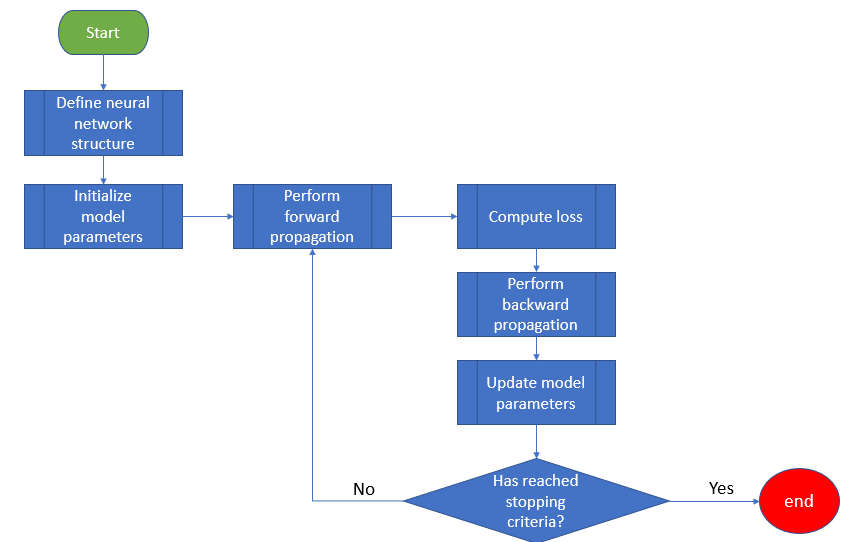

In [2]:
workflow = "iVBORw0KGgoAAAANSUhEUgAAA1gAAAIeCAIAAAApizk6AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAFYqSURBVHhe7d15lNXVne/9rOc+ve7zR7p79Vo93L533ftH9PbKH08/RhMVZCgGp9hqBEcGhWLGGY1ejTGatOkYRUuUEkGUGQRFcCaaGBWDXodoBDVBMRhxCtIRpTFpkuvzob7bb2/3qSqqTp1T9du/836t76q1f/s3n7P97Q8HPPWFTwEAANCQCIIAAAANiiAIAADQoAiCAAAADYogCAAA0KAIggAAAA2KIAgAANCgCIIAAAANiiAIAADQoAiCAAAADapsQfCBx1+96Po1J114a/8xsw4Y2ZJj9R9zw8gL5+oudC/hrgAAAOqgPEFw2YPPHHPmLUed8/1Tr5nQfMtpZy8/7vzVR+VYZy0/rnnOaadeM1H3cvSZravW/SLcIQAAQE2VIQh+8vt/P/OqFf3GzhzXOioJVbmX7qjf6TN1d7rHcLcAAAA1kn0QfO3ND044b/4Jl1+URKgy1bGXnfeNc+fpTsM9AwAA1ELeQfDDjz85ctrNo685O0lO5auTfzD5qGlzdL/hzgEAAHos7yA45XvLT7zywiQzlbWOv/wc3W+4cwAAgB7LOAheu/DRYy/85yQtlbuOPP/bLYvXh/sHAADomVyD4OY3tx9y2g3TFo9IolK5a+riEYeMatG9h1cBAACgB3INgjOuvfuU75+b5KRGqBH/PP2cq1eGVwEAAKAHsgyCz256a3BzS5KQGqcGjb9Or0B4LQAAAKqVZRCcce3dY2eelcSjxqlTrp6oVyC8FgAAANXKLwju2v2Hr5zYcvbyf0riUeOU7v3AE1v0OoRXBAAAoCr5BcG7f7zxmAu+k2SjRqujZlym1yG8IgAAAFXJLwg2X75sdMu4JBg1WukV0OsQXhEAAICq5BcEDzrphnNWHpMEo0YrvQIHntQSXhEAAICqZBYEX379/eFTr0tSUWOWXge9GuF1AQAA6L7MguBdD790/CXfTiJRY9Y/XXyJXo3wugAAAHRfZkHwspvuO/kHk5NIVJPa+M5T4RyffvrE6/ckawtYeh30aoQrBgAA6L7MguC4by0e1zo6iUQ9L0uBNz5+oS2qbQ31qH33izfbYrdKadKPU4/S6zD20oU6BQAAQHUyC4LHnTtn4q2nJJGo5/Xbj7epkk5VkYOgXofjzr257VUBAACoRmZB8PDJrVMXnpBEop7X1h2v6uBJZ/yXxaJFdVo0NHF2VFsb6Kf6dTRruOqiZOc1deGI4ZNuCicAAADovsyCYP+xN5614tgkEvW8FNTs+Mm/Dkw+EbRFX6u2pUOVJT9fVNX7E0G9Dv3G3KBTAAAAVCezIHjAyJbz7/x6EolqVbv+sNPO4nGw878aVvjbuuNVb6t8lareQVCvg16NtusFAACoBp8IpmVx0MJfZRD0zw5NHAS9bcUnggAAoOBy/DeCI5JIVPNSFrRUlwRBS4H+eWHyiWAvB8GpC08YOvHGvS8KAABAVTILgiecP68e/9dwUh0FwY3vPKVV1lb1bRBs+7+G57S9KgAAANXILAiOvXRhPb5HUEdW5rO20l68qLZ/BGjZzlbZZp0EQfv40I9T89LrMPqS23QKAACA6mQWBK9oXVeP3yyS/Mu/OL1Z4BOLg0p7tmifGnYSBK3TNq5HHOQ3iwAAgB7KLAje9fBL/3TxJUkkaszidw0DAIAeyiwIvvz6+0OnXJNEosaspslX69UIrwsAAED3ZRYE5cCTWs5ZeUySihqt9ArodQivCAAAQFXyC4ITv7NidMu4JBg1WukVGPut28MrAgAAUJX8guDdP954zAXfSYJRo9VRMy6740fPhlcEAACgKvkFwV27//CVE1vOXv5PSTZqnNK96xXQ6xBeEQAAgKrkFwTlwpn3nHL1xCQeNU7p3s/6wfLwWgAAAFQryyD47Ka3Bje3JPGocWrQ+Ov0CoTXAgAAoFpZBkGZce3dI/55epKQGqF013wcCAAAaiLXILj5ze2HjGqZunhEkpPKXdMWjzhk1A269/AqAAAA9ECuQVCuXfjo1y+4MolK5a6vz7hCdx3uHwAAoGcyDoIy6colx19+TpKWylonXnnhhCsXhjsHAADosbyD4Icff3L0tLkn/2BykpnKV7rHI6fdrPsNdw4AANBjeQdBee3ND044b/6xl52XJKcy1QmXX3TcObfoTsM9AwAA1EL2QVA++f2/n3nVikPHXjOudVQSoXIv3VG/sTMnfW+h7jHcLQAAQI2UIQiaVet+cdSZsw8/+3unXjOxec5pZy0/LglVuZSuXNevu9C9HDV99rIHnwl3CAAAUFPlCYLmgcdfPfeaFSMvnNt/zA0HjGypU/WfsDLpqWHpyk+YcfMFM+9c++iL4a4AAADqoGxBsHccfsGToQUAAJAtgmA1CIIAAKAECILVIAgCAIASIAhWgyAIAABKgCBYDYIgAAAoAYJgNQiCAACgBAiC1SAIAgCAEiAIVoMgCAAASoAgWA2CIAAAKAGCYDUIggAAoAQIgtUgCAIAgBIgCFaDIAgAAEqAIFgNgiAAACgBgmA1CIIAAKAECILVIAgCAIASIAhWgyAIAABKgCBYDYIgAAAoAYJgNQiCAACgBAiC1SAIAgCAEiAIVoMgCAAASoAgWA2CIAAAKAGCYDUIggAAoAQIgtUgCAIAgBIgCFaDIAgAAEqAIFgNgiAAACgBgmA1CIIAAKAECILVIAgCAIASIAhWgyAIAABKgCBYDYIgAAAoAYJgN6x+/O2p172gUhC0xpMbPwjrAAAAckMQ7IaPd+9RBPQ64bKn393xSVgHAACQG4Jg9yxa96YHQbVDLwAAQIYIgt3jHwrycSAAAMgdQbDb7ENBPg4EAAC5Iwh228e79/BxIAAAKIGaBcEDRrY0Th14SmvSU+4K7zEAACiXWgZB+8dz3a2m6Q99bfT8pJOqbekV1uucdHaxCIIAAJQVQbAhiiAIAAAqEQQbogiCAACgEkGwIYogCAAAKhEEG6IIggAAoFKjBMHWNVvsOl/Z+lGyKtPatn131++FIAgAACrlFAQ9zLm1699Jtumodu7as2HTDmuroX1nzH7J1+ZYBEEAANBDOQVBxT6dyAOc5ULlId+go9Iu2lLb26IFQV+baREEAQBAD2UcBFWWBff5uWASBMtRBEEAANBDeQdBlfJQ/KHgzl177HrEeuzzP6c4aMfxtdrdekS7W7+V94v/zXJSWqVj+nmTVGqdEh9Zh0oWtYG1le2s1OP31XaAveK9CIIAAKCHsg+CCkMej9TwbBSnq+QTwSQIqu2RKz5Ccjq1282C6hc7eCe7xNepzjjSxZeqzdT2a1DFB4wvjyAIAAB6KPsg6KFKUUxr41Va1C5qdB4Ek0zmi0paWmx3VVx+lmRRP+Pt42uoPKlfT5wXK0trPbMSBAEAQA+V5xNBi1MJy2TdCoK+au/+n9duRFO/ncUXdRA1dGFtO31OV4KgRz0ru3hHEAQAALVShn8jaHkoSVdxVR0E44TXUSWbaVEHUaMy0nl1ctJkL7tyO2CyliAIAAB6KO8gqGynHkt47cZEq+qCoPq7krS0fbtBMD5UUp2cNAmC8aWqCIIAAKCGMg6ClgLjMKR0FacorbVGdUHQNvO9tEpl7bi0TbtB0Np+eboGP5Fdue1lZxFblQRB29KuwbYkCAIAgFrJKQhaKop5SvNS2ArroshYXRBUeUqTjlKXVlmk88U4L7btGninyk4kynPx9SRBUOVbitoEQQAAUCs5BUGq6iIIAgCASgTBhiiCIAAAqEQQbIgiCAIAgEoEwYYogiAAAKhEEGyIIggCAIBKBMGGKIIgAACoRBBsiCIIAgCASgTBhiiCIAAAqEQQbIgiCAIAgEoEwb6p+LeJ9EIRBAEAQCWCYN8UQRAAAPQ5gmD7pTuKf4NwzYsgCAAA+hxBsP3SHREErQiCAACUVfmD4Lbtuzds2vHK1o/sOtVI1lq/zJj9knosojltn4Q2O5Qv6uA7d+2xduuaLW077eWdKh1Bi35k67GGt/XTFutRBEEAAFCpIYKgLk9xTW1FPbU9cmmVytqWxiwLquLNkr0U6bSozOeLdnA7gvfryJ4FbVUSDdWjhmVHP3idiiAIAAAqNUQQjD8F9EWLd578VB7pVFoVh7NkLy3GydLCX3KiOD5a7IvP5T2+TV2LIAgAACo1YhBUqWFRLNFREFS/fZ6nTu1uP23RP+dLdlF5slS/1sarrEf8jHUtgiAAAKjU6EHQ+5PSqjjV2Ud3+qlDKbrZovq16AdPdlHtMwj6z3hVPYogCAAAKjVuELR/nOf/pC8prapMderRT9slWbSe+EQWFm2tBT5fFfcoKaqhjeO1NS+CIAAAqNS4QdDaSm++Sm0PZGonf2mrRW2vO7VFHTNeVFm281wYn6iTIKhKLqMeRRAEAACVGjoI2mK4gc9/OmhBTTwOaq0WfV9bjI+s8r0kPkvnQVCldnKo2hZBEAAAVCp/EKRUBEEAAFCJINgQRRAEAACVCIINUQRBAABQiSDYEEUQBAAAlQiCDVEEQQAAUIkg2BBFEAQAAJUIgg1RBEEAAFCJINgQRRAEAACVCIINUQRBAABQiSDYEEUQBAAAlRorCNovCE46e1j1OGbNiyAIAAAqEQR7WgRBAACQqTIHwZ279ti1rV3/jhat7dTTumaLGvZTZsx+SWU9dgRbtN190WzYtEM9YeEz6rGjaUvbxU8Rt/du+tk2Orgtih2zHkUQBAAAlUobBOMP6ryRfHrnmcx7OgmCcVullGlJrt1j2ipftANWns5SoG+sdp2yIEEQAABUKm0QVDhTREs62w1tltKsLO15Txz+tK/Cn/XH1d0g6AdXacc4+and7il6XgRBAABQqbRB0FKX+Gd4qs5Dm6qTINhuslR1NwjGp9NigiAIAAB6Tcn/Z5ENm3bY5dliAYNgnFPrVwRBAABQqeRB0EqX53+9W3UQ1L41+avh+HQ6YLvhsuZFEAQAAJVKGwR1SdaIo1jyj/Aqk5lKG3iw23tjnwVB29g/wNNmtmPlP+zTZhbvLEeKnb3ydDqar1XpUCpfW8MiCAIAgErl/zeC4ulNZT0W3SqTmcrTm1jbd4+PGSc26/E4GG9mR7Co1+7pLAua+n06SBAEAACVGuKvhimCIAAAqEQQbIgiCAIAgEoEwYYogiAAAKhEEGyIIggCAIBKBMGGKIIgAACoRBBsiCIIAgCASrUMgo1T/SesTHrKXeE9BgAA5VKzINhQDv/suwMBAADyRRCsBkEQAACUAEGwGgRBAABQAgTBahAEAQBACRAEq0EQBAAAJUAQrAZBEAAAlABBsBoEQQAAUAIEwWoQBAEAQAkQBKtBEAQAACVAEKwGQRAAAJQAQbAaBEEAAFACBMFqEAQBAEAJEASrQRAEAAAlQBCsBkEQAACUAEGwGgRBAABQAgTBahAEAQBACRAEq0EQBAAAJUAQrAZBEAAAlABBsBoEQQAAUAIEwWoQBAEAQAkQBKtBEAQAACVAEKwGQRAAAJQAQbAbntz4wc1r31ApCFpDPWEdAABAbgiC3fDujk8UAeN68bUPwzoAAIDcEAS755oVmz0FXnH7q6EXAAAgQwTB7ok/FOTjQAAAkDWCYLfZh4J8HAgAAHJHEOw2+1CQjwMBAEDuahYEDxjZ0jh18NgFSU+5K7zHBZNcJFWmCu9xzpI7ospU4T0GSqGWQdD/8Vy3qmn6Q18bPT/ppGpbeoX1OiedXazCPvUYckWuUg65bmF8FrkYn4AjCDZElfKpx5ArcjHRMj6LXIxPwBEEG6JK+dRjyBW5mGgZn0UuxifgCIINUaV86jHkilxMtIzPIhfjE3AEwZrVK1s/2rZ9d9JZkCrlU68RhpxGlN3sjNkvJasKXky0PBKLXIxPwJU/CK5d/44ub5/zqG3WumZL0m+l+Xjnrj1JZ1JxENTGhQqFpXzqFXmi9QBnNLqSDbpSNiaTzlyKibbI45NifAKOIBgq2UztePLWvL7PYJcEQS36qj6vUj71ijzRxgPAhlY8nLpYRf6MeZ/FRFvk8UkxPgFHEGy/tEt3Z+4iT9ulfOoVeaJN/iTQlT9IVBZBMGtFHp8U4xNwjRUEW9dssXbbJe/lAdFX2fbOpvNkStY0H1ZHf3MXb6OG7WiHdb5B3G9b1rVK+dQr8kSbBMF4bMQDbMOmHb6NFn1UJIPQ940HnjbuaF/v8e2903T3z0VVFBNtkccnxfgEXCMGQbFVmp41U1rbVvkEqbbNnVbxRK5dfA5Wp/fH26gR5wCVjuzHtHP5QZLQUI8q5VOvyBNt8p76YjwaVWp7Fmy7p8/Fu3hEqbTWj2nH8Y3bdv3cvnGPTmGLdl4d04d9/YqJtsjjk2J8Aq5BPxG0VfFiskrtjoJgXJpifU6Nt6kMgvFateO1doW+WI8q5VOvyBNtHAQth1km0xiIPwWMx4+2iVep4jFTOUi0ytdW7qseH8Aa1X4Bql4Ybyom2iKPT4rxCTiCYJggk1Vq+zyqiqdklda6rgTB+EQq7WL7xnzjelQpn3pFnmiTtzgeV4k4CMZDThWPqGQEqpIQmewb97QbBP2S6lRMtEUenxTjE3AEwW4HQa3ykBdPxvE2SRDUNsli8vlNvauUT70iT7TJO+6ly04Sm1flqnhExW0rgmDBFXl8UoxPwBEEuxcEk826EgS1jXaxtpXWJpN6vauUT70iT7QdBcGO+lW6oyTMxSOq3VHkh6rcN+7RcNWijXNV/F9E/YqJtsjjk2J8Ao4g2H4Q1IQdf2jnU7LNqTbF2i77DIK+vZft6J1q+MZ1qlI+9Yo80XYU+Gw02pBTaYz5MFN/Mk7iEaXSBn5MO44P18p94x4btH7SZN86FRNtkccnxfgEHEGw/SBoe4nN0/GU7KtEazsPgvHGxjaw05l4sq9TlfKpV+SJtpNP/uIhEW+jRa3yRVU8oqxsLxMnOS0m+8Y92lKLNs5VdgHx7vUoJtoij0+K8Qm48gdBSlXKpx5DrsjFRMv4LHIxPgFHEGyIKuVTjyFX5GKiZXwWuRifgCMINkSV8qnHkCtyMdEyPotcjE/AEQQbokr51GPIFbmYaBmfRS7GJ+AIgg1RpXzqMeSKXEy0jM8iF+MTcATBhqhSPvUYckUuJlrGZ5GL8Qk4gmBDVCmfegy5IhcTLeOzyMX4BBxBsCGqlE89hlyRi4mW8VnkYnwCjiDYEFXKpx5DrsjFRMv4LHIxPgFHEKxZ6UWIfytduxX/JpLerFI+9Yo/5Ow6++Qd76jst4wkv4akHsVEyyOx62W/7SbprGsxPgFHEKxZ6UUgCPamgg+5yl8QV4QiCPaaXhufeqSEU/bKO1uPIggCfYggWLPSi0AQ7E0FH3J6o/c5Hnq/CIK9phfGp72b8W+s1qjzXyrdV6VL6u4AIwgCfYggWLPSi0AQrJ8nN37w7o5PwkKbgg85gmBDTbSL1r0ZWp/phfG5bfvuAn7qrHsnCAIZadAgqKenJmn9Sdou3v5IrU5bTJ5imtGtX5I/bYfetl30M574rV/i5EcQrNrNa9/QxVyzYrPHwcIOOQ0Su0Jjo8ISmEs29l20WZwgba9kXNn4jM+SfCakDWzQVp7aBmoywutRjTbRjrnqWV25RmlYrv/4tLc1eSLF5Q80id9xGyG+1gaJDRjxA9oAU8P6xQ9iq3QB8aJ+2uhyPiz9SSt+/LhsR1+0AxpdmPer/Dr9YuLh7Ze0z2q08Ql0onGDoK7ZnoD+0LEnizrV9geK2v44s6eVP8j0SNJxvK1VPmHHbe3uzzJ1Js+13qkSPPUsCFpZHCz4kNMb7WPAxphPXTYvxqt80db6ILEh58PMFtXQXr6NTYR+cPXHiyot+hhWO1lbp2q0idaCoJXFwXqPTxsMHUUfDQMfNsnwi0eIHUTssdbuyLRTxA9GW+WntkU7gkrteIDF4znZ0ssuI277NroL312H8puKn73+H5p37rMabXwCnWjcIOhToyp+lNi0ao+h+PFkpR3tWWNPtPgprEU7iPbyJ5cqPqA2iFf1WvXkqdd/wsqkpyB1yBmLk54uVu8MuXhQxROYlY8WG0g+7XmPDS3bUYu2qvI4VvG51I7HdjKGbTSq03vqVKUccl2vEy57+sBTWpPOLlYXx2fl08mr8umkIeFPnni0qOLxEO9YeRAtxoPWV9mifvpm8QCLV6k0gOPxaRXfS7JBPGLb3Tc5XRerJ+OTIIiSIQjurfjJGD93tE0y72oze57GTy4rLdpBtNfeV+Tz7FHou/dyleCpF38ieGHrxte37Sr4kIsHVTL1qnwEJnOqlXpsBGpHbWA/bdHnPBuBrqNzJUMuHt51rUabaP0TQUXAReve/Hj3nnqPTxsAycixSt50lW1s7WSEqN/Hg41GG2yVI7OjQRvvpao8YCJ+9lrFl6eG727lF+xHizfQKuts96XoqBptfAKdIAjurfjJGM+U2qa6IJjs5eW793KV4KlnQdAioPUUfMjFgypuW3UeBLVKZUPRFrW7LdqWNvx86u3kXGrHQy4e3nWtRptoFQQ9AlpPvcenjRwfA3Elb7oqfl4lI0T9Ph7iY1o7HplVB8H4IO1WfHnx7laVQ1rb+PZWujb1dPTgraxGG59AJwiCeyt+0MQzpT1xrN+qk/lbi3aQyr28tCp5QPdOleCpt+6Z9zwCmoIPuXhQadgkU5Su38ZYuzOlVml3/bS9kkWVBmF8wPhccVulvXR8X4yHd12r0SZajU+PgKYXxqfe6/g55mVvejyo4gGTjBBt6eMhjnSdPOKSVfFetpkfsIvjzS7Y2slN2RH84F6Vh6284E6q0cYn0AmC4N6Kn4zJk0tt39KeVv6giVfpCFr0g8SrtL3WWlsbeLs3q5RPvYIPuXhQ2RTlg0pjw4dBR7OXOjVK7Qg2Jn1RpYZ6rK2jqe2r4vOqbF/vUVuSGbQexUTbC+PTBk/8dmuQWGbSMPDkZ5tZv62Kd9EqHw/xltYWG5zaRW3bTKW2PeJsgElHx7fx6Yt+hXHZozVu+zba3m/Et7Fr00+Vr02usPNifAKOILi34ieXPdfimdJu0Ngz0cqfgGLPo+Tx6rxTG+hcvthrVcqnXsGHXDId2tRl4jFg/fG4stJwUr/WxovxZtYjasRjLzmvKj61jqANCIK9oHfGZ/wUkvid1RsdeqOBZP3Jk8r3sqFiG3t77/5t4uGX9Oun7aWyJCd+FsuCpt2xZ7ski0Zj2/vjk/pxdJbQ1d5/Rx0V4xNwDRoEG61K+dRjyBW5mGhzH5+WuroerfIqxifgCIINUaV86jHkilxMtLmPT4JgR1WO8Qk4gmBDVCmfegy5IhcTbe7jkyDYUZVjfAKOINgQVcqnHkOuyMVEy/gscjE+AUcQbIgq5VOPIVfkYqJlfBa5GJ+AIwg2RJXyqceQK3Ix0TI+i1yMT8ARBBuiSvnUY8gVuZhoGZ9FLsYn4AiCDVGlfOox5IpcTLSMzyIX4xNwBMGGqFI+9RhyRS4mWsZnkYvxCTiCYENUKZ96DLmuV/JrvnqhmGgZn0UuxifgCIL1reSXL/VVlfKpx5DrpJJfI6YgqB5f7IViomV8FrkYn4AjCNa3CIL1w5DrpJIg2PvFRMv4LHIxPgGXfRDUbLdt+277EnwTfxV+/MvOPY2tXf+Opkn/vebWqR5bFOtR2cF9S/tMxX/HuQ7uW6q0pfWLXYNvaXxirtxSVXlVFiJNfFNVVCmfer0/5OwN8kEV/zp8W2WjyN9oWzTxHwZs0YdBPJDikdxRv9Hp1O8DRuy8yZZ2kVqli7FDJXvFd6HNtOhr4126W0y0ffVIpLpSjE/AlSEI6uw+Y2ka87bmUZ+SbTNr2zwXT3Jq+zytI/jUaHv5otpi07NNtzYZq+K97PgW3SzM+cFVHW3Z7lX59fsu1VUpn3q9P+T0jui89qbYO+tvkK3y8aDSoic5e3N9GKgttnE8kNT2AWDH9wN6O+7XTx8Ydhw/RTx4VGr7kdXWljbqVOr3g9gqX9SqOIx2q5ho++qRSHWlGJ+AK0MQ9BlOlUyHSX8cuXwiTCqZMuODa1KMA5lWaQM1bG6OD5is8uvpZMvKq9Kizfc9r1I+9Xp/yPmbZaXx4MNDjTgz2bvpiyqNHB88WhW/s/GquPx08ehVaeP4MrziwyaXqnZ8qfGq+D+ZeLPKxW4VE21fPRKprhTjE3BlC4IqXYxPh5oy7fKMTaWVk7TKNjB+wOTglUHQ5n47YMLmWkt+HgQ72bLyqtRvG8TpsLoq5VOv94ec3nF7s6zityxZlQwVldb6WNJe2rfdVckI8WOqbbvYiPLdtUHbhoH3J9fjp0gGpJXvGF+JLWqVL3armGj76pFIdaUYn4ArcxDUTOyr4s9UtFZt67fSon+cEx8wOXjnQdD742o3CPrauDpaZVk2SRXdrVI+9Xp/yOkd15DwxfgtS1ZVFwTtgD5a4mPuveHPeKcaWvQ/J6jth02ux09BEOw1ffVIpLpSjE/AlfmvhtXwedH62w2C8SpVfMDk4B0FwfikSSXzbidbJlcVl+3lV1hFlfKp1/tDTu+4hoQv6t334ZGsUltX6IsqjRwbLSqt8pFpq2xcVQ4wO6Y29hPFFR9TFR+28nr8CNosXhWPrngzW0zuouvFRNtXj0SqK8X4BFwJ/2cRn0rVGU+90m4QtKxmM6hNin60ZF6snKf9+OqPt1Tbc5sf3KqjLZOr0pX4uXoyH1uV8qnX+0NOb5bOq7dD7XjY2Crr99JaHx725sZDQuIhp59qx2+09lXbjmnbxGxfbeNjSaPF+23Rz67ScXxLO4tfjPp9y3gzW9SWvtitYqLtq0ci1ZVifAKuJJ8I2kQr8TRmU7WJJz/b2DfzHhPPhcm8qPnSw5lKq+K51mZiY/O6lZ1a4knaesS3rLwq31F82q6uSvnU6/0hp3dcb4q/fWonq3zRyjYz8TuoRb3d2sVW+cBQ+cHVUPkx1eNHsKFiI8cPYqHQD+XZ0YaojqO1tsoWba3EY7jdzXyxW8VE21ePRKorxfgEXAn/jSBVWaV86vX+kNNI03hLOqsoXXwc/vZZyZ9A7E848R82ClhMtH31SKS6UoxPwBEEG6JK+dTr/SHXh0FQu3S0WMxiou2rRyLVlWJ8Ao4g2BBVyqde7w+5vgqCKv8rY5OsLWAx0fbVI5HqSjE+AZd9EKS6UqV86jHkilxMtIzPIhfjE3AEwYaoUj71GHJFLiZaxmeRi/EJOIJgQ1Qpn3oMuSIXEy3js8jF+ARcLYMgVdYK73HBJBdZ7jrwlNakp9wV3uOcJXdU7uo/YWXSU+4K7zFQCjULggDq5OPde6Ze90JYAIrn8Lb/BQpAjgiCQNEtWvemJlr9DMtAwRAEgXwRBIFC+3j3njFXPauJ9oTLng5dQMEQBIF8EQSBQrOPA634UBDFRBAE8kUQBIrLPw604kNBFBNBEMgXQRAortWPv63wp7IUqOJDQRQQQRDIF0EQyAATLYqM8QnkiyAIZICJFkXG+ATyRRAEMsBEiyJjfAL5IggCGWCiRZExPoF8EQSBDDDRosgYn0C+CIJABphoUWSMTyBfBEEgA0y0KDLGJ5AvgiCQASZaFBnjE8gXQRDIABMtiozxCeSLIAhkgIkWRcb4BPJFEAQywESLAnrxtQ/XPfOeSuPTGq9v2xXWAcgEQRDIAEEQBaTYp5EZ15MbPwjrAGSCIAhkQFNsaAFFMvW6FzwFXti6MfQCyAdBEMgAQRDFFH8oyMeBQI4IgkAGCIIoLPtQkI8DgUwRBIEMEARRWPahIB8HApkiCAIZIAiiyG5e+0ZoAcgNQRDIAEEwOweMbKHKWuE9BkqBIAhkgCCYHcUFvWtVVNP0h742en7SSdW29ArrdU46u1gEQZQMQRDIgKaf0EImCIJFLoIg4AiCQAY0/YQWMkEQLHIRBAFHEAQyoOkntJAJgmCRiyAIOIIgkAFNP6GFTDRCELQ73blrT9Jf/CIIAo4gCGRA009oIROFDYIzZr8ULvEzyQZdrFe2frRt++6kM5ciCAKOIAhkQNNPaCEThQ2CrWu26PL00xYV5rToa7teO3ft2bBpR9KZSxEEAUcQBDKg6Se0kIlcgqB9QLh2/Tu+QReLIAiUA0EQyICmn9BCJnIJgiotehC0DwiNMqJ1aq1in35avx3BWRyMO+N/NZjs6z3x9tZp7d7562aCIOAIgkAGNP2EFjKRSxCMFxXCPIdZMrMsaO043qm06J8I2gZ+TB3EN67cN+lRQ4t2Xvt4shc+aCQIAo4gCGRA009oIRO5BEHlMMtkFsL8U0BbZZksDoWVa1WKca9s/chX2aG0l9qV+1qPL+ogdgFWyaHqVARBwBEEgQxo+gktZKLgQdAlHwEm4iBom3nFQVBrLfZ5JSEyXrXPIOiXVL8iCAKOIAhkQNNPaCETuXwi6NVu2rMiCMZFEETJEASBDGj6CS1kIrsg2FG/ap9BUO3Kvxq2QxEEgYIjCAIZ0PQTWshEdkFQpQQWZzK17d/27TMI2gZ+zDjMEQSBgiMIAhnQ9BNayESOQVClEGbXL77NPoOgyrYxcZIjCAIFRxAEMqDpJ7SQicIGQUpFEAQcQRDIgKaf0EImCIJFLoIg4AiCQAY0/YQWMkEQLHIRBAFHEAQyoOkntJAJgmCRiyAIOIIgkAFNP6GFTBAEi1wEQcARBIEMaPoJLWSCIFjkIggCjiAIZEDTT2ghEwTBIhdBEHAEQSADmn5CC5kgCBa5CIKAIwgCGdD0E1rIBEGwyEUQBBxBEMiApp/QQiaKEwRf2fpRTX5Xh/1KEvulc71WGzbt0EmTzp4XQRBwBEEgA5p+QguZIAjWpAiCQL0RBIEMaPoJLWSCIFiTIggC9UYQBDKg6Se0kAmCYE2KIAjUG0EQyICmn9BCJooWBNeuf8cubOeuPfFarbJ+iUOeby+KgOqJg6C1ldKSdGi5zRftIPEqo37rtN3tp9iOvqUulSAI1BtBEMiApp/QQiYKFQR1Pf6hoNKVty0gWlubeUa0AGexTD+t3zOfSg1FNNs4blus9GNqUYdVQxtYQxUf3COgrfK16vd2vLZWRRAEHEEQyICmn9BCJor2iaAvxjksLuu3tpKf5zYvD4L66clPFR9fqzz82aIOa20vO4JFPTumta3i3VV8IgjUG0EQyICmn9BCJgobBOMcplLmsws21qlGZYCz0CZJRvQEqQ10NPtpi9Zvpb3a9g7sAmybOJVq3zhlEgSBeiMIAhnQ9BNayEQWQVCpy1fFnwiq0VEQtM3irKayA6rTMqIWdRYt+sEtBVq78hNBgiDQhwiCQAY0/YQWMlHYIGhJTtkrDmTeb22lMYt0cXlosy19R5WOb7HP4mOyqIrjXedBUHvFpyYIAvVGEAQyoOkntJCJQgVBXY8Cli3GIU/9ls8snIn1W/yyfKaf2kWNOLTZMW1jlQKfju9rLQX6okqL8QVoVUdBMD61JU7xtbUqgiDgCIJABjT9hBYyUaggqLKAJR7IVJbDjG3gq3x7aTe0Kc/5odSpVZYXfTE+kWrvgdrYkTsKgipLmaIj2Abx2poUQRBwBEEgA5p+QguZKE4QpCqLIAg4giCQAU0/oYVMEASLXARBwBEEgQxo+gktZIIgWOQiCAKOIAhkQNNPaCETBMEiF0EQcARBIAOafkILmSAIFrkIgoAjCAIZ0PQTWsgEQbDIRRAEHEEQyICmn9BCJgiCRS6CIOAIgkAGNP2EFjJBECxyEQQBRxAEMqDpJ7SQCYJgkYsgCDiCIJABTT+hhUwQBLteern8t971ThEEAUcQBDKg6Se0kAmCYEdV+WvltLih7Vce91oRBAFHEAQyoOkntJAJgmBH1e7vF+7lIggCjiAIZEDTT2ghE70cBJWrdFL93Llrj12Af8Zmwct+iiUwXxTtYluq1q5/R4t2NKMtfa2OGXo//VRbev8rWz8KvZ+p7LfjJFvaQXTG+BPBbdt3h9WfP4s206Kv7cmHiARBwBEEgQxo+gktZKJPgqBY3lJg8rZnPt84XqtStPIsaKt8Y8tt1lbw8n/JZ5tZprS2bxPv61kt7rfrsX2t4iCotq7H2ralju+rfNFW+S10twiCgCMIAhnQ9BNayESfBME4GCk2WW6rzExKWh7pVLavBaw41SWr4opPp0N5dLN+/bRFL7sG64/bVh4EK1fp4Fprbd+s3cVuFUEQcARBIAOafkILmejzIOj5rDJdaTHJdh6qkiAYr1LpmFrr7HTxLtrS2ypdQNuGwT6DoH6q7f2q+OBJ8tNiHGe7VQRBwBEEgQxo+gktZKJ8QdBSoHXGp7NdnJ9IZ/dUF18DQRAoFIIgkAFNP6GFTPR5EPSc1G7wiiNUvG8SBG2VpcY4h8W7KPDF+czLd1TF19Du9dgR7OzxKo+zqvgCbJEgCPQcQRDIgKaf0EIm+iQISpznOgpetta2VClpediyVWKLSlrKW9aON1OnH0Hb2C7Ot/GgZv12DXapfnZVnPDU9rPYlfuW8Wa2SBAEeo4gCGRA009oIRN99YmgnV08P1lnHARVHvjEg5f3x8fxVarQ1fbVLfppp9Au8RHUVkRTwy7J2PZ+DZ4d7QiVCc/Wit+F9RMEgZojCAIZ0PQTWshEXwXBpL+7ZUEw6ey8tL328kVlNQuCRS6CIOAIgkAGNP2EFjLRUEEw/mQuWSxmEQQBRxAEMqDpJ7SQicYJgvFfAUvxU6CKIAg4giCQAU0/oYVM9HIQpLpVBEHAEQSBDGj6CS1kgiBY5CIIAo4gCGRA009oIRMEwSIXQRBwBEEgA5p+QguZUFxonOo/YWXSU+4K7zFQCgRBIAMEQRQZ4xPIF0EQyAATLYqM8QnkiyAIZICJFkXG+ATyRRAEMsBEiyJjfAL5IggCGWCiRZExPoF8EQSBDDDRosgYn0C+CIJABphoUWSMTyBfBEEgA0y0KDLGJ5AvgiCQASZaFBnjE8gXQRDIABMtiozxCeSLIAhkgIkWRcb4BPJFEAQywESLImN8AvkiCAIZYKJFkTE+gXwRBIEMMNGiyBifQL4IgkAGmGhRZIxPIF8EQSADTLQoMsYnkC+CIJABJloUGeMTyBdBEMgAEy0KaPXjb1/YulGl8WmNdc+8F9YByARBEMgAQRAF9PHuPRqZXidc9vTr23aFdQAyQRAEMkAQRDFds2KzB0G1Qy+AfBAEgQwQBFFM/qEgHwcCmSIIAhkgCKKw7ENBPg4EMkUQBDJAEERhfbx7Dx8HAvkiCAIZIAhm54CRLY1TXxs1P+kpd4X3GCgFgiCQAYJgdhQX9K5VUU3TH/ra6PlJJ1Xb0ius1znp7GIRBFEyBEEgA5p+QguZIAgWuQiCgCMIAhnQ9BNayARBsMhFEAQcQRDIgKaf0EImCIJFLoIg4AiCQAY0/YQWMkEQLHIRBAFHEAQyoOkntJAJgmCRiyAIOIIgkAFNP6GFTBAEi1wEQcARBIEMaPoJLWSCIFjkIggCjiAIZEDTT2ghEwTBIhdBEHAEQSADmn5CC5kgCBa5CIKAIwgCGdD0E1rIBEGwyEUQBBxBEMiApp/QQiYIgkUugiDgCIJABjT9hBYyQRAschEEAUcQBDKg6Se0kAmCYJGLIAg4giCQAU0/oYVMEASLXARBwBEEgQxo+gktZCKLIPjK1o927tqTdBa2dKm64KQzqbXr39GLn3RWFkEQcARBIAOafkILmahfELSsM2P2S3FndZGOIFhFEQRRMgRBIAOafkILmShNEGxds6XydH1SBEGgHgiCQAY0/YQWMkEQrHkRBIF6IAgCGdD0E1rIRB8GwQ2bdmzbvtsCnIk31pbWqW2SIKgeWyW2i29sdGrbMix/+mlHOVI7qnQltpmObJ22qP544/i8fgorHd/6tUsSBH2VeCdBEOgugiCQAU0/oYVM9G0Q1Aa+qJiVrLJ9KzfzEBYfrfITQS16kou3jMsyn+U27au272XXr8PaltrdYqLKzuWXEV+5hUU7oEr93rYbsTZBEOgugiCQAU0/oYVM9G0QjMOZpSsLXur3DKeK94orjlNJENSqeBcLeZ7qvHRkj3cqtT23qbSLpb3k4Cq/pMojq98OYnt5v8oPGF95J0UQBBxBEMiApp/QQiaKEwRV2t5ykjes4r1Uau+99M9YZ5LVtIutjVURBC2PVl6qJ7nKjKgt7SDaa+9ZP8/uy3fvvAiCgCMIAhnQ9BNayET9gmBlQlLFwau6IKiGHyGOU5VBME54HVWyWc2DYLKXF0EQ6C6CIJABTT+hhUzULwgqG+n4cZ5TeUhSJTnJEpV+qq1+S2BW2sW2tGPaNqpOgqB291WdVBeDoJ0oTnu+Y3JJKr/Hyr28CIJAdxEEgQxo+gktZKJ+QVClPKRTeBKyRV9rWc2zoHKVZ7J4y2QztS2cWQIT668MZFq0QGZr/QhxaYOuBEGVdvctLXT6ueJVasTnjVeptMoaBEGguwiCQAY0/YQWMlHXIKiyGGeSKKZV6rFIVLnWEpUoVGkbX2shzNjBfRdtaf0e0WzR+GZxdT0IqnQNdiiJE6cq9LZ9AqojxAeJ9/JMTBAEuosgCGRA009oIRP1DoKdlAXBpJOKiyAIOIIgkAFNP6GFTBAEi1wEQcARBIEMaPoJLWSCIFjkIggCjiAIZEDTT2ghE30YBKl9FkEQcARBIAOafkILmSAIFrkIgoAjCAIZ0PQTWsgEQbDIRRAEHEEQyICmn9BCJgiCRS6CIOAIgkAGNP2EFjJBECxyEQQBRxAEMqDpJ7SQCYJgkYsgCDiCIJABTT+hhUwQBItcBEHAEQSBDGj6CS1kgiBY5CIIAo4gCGRA009oIRMEwXari78LuN5FEAQcQRDIgKaf0EImCILtFkEQKBqCIJABTT+hhUz0VRDctn33hk07VHYZye+as06J+20X/VT/K1s/Us+M2S/ZZqJ+31J7KcnZlqK9rNMWW9ds8S3bPYLvaGz7js6lK7HyfguR0vNfoEcQBBxBEMiApp/QQib6MAjq7JbnVElbqcvaylLeb7tYqlNZMrO2Kl5lmU+BTG2PZZbnLLHZZnYE20yl43vCs72srepkSzugX6RtaefST7+k6oogCDiCIJABTT+hhUz0YRD08KRSYNLF+KKXtvHIFcevyooPqCAYJzAd2TOcwpkWLWhqm/iA8aokCHaypU4af/IXr+p5EQQBRxAEMqDpJ7SQiYIEwTg/6addm/EEluyisr1c14OgfqqtA7bt9zntBsFOttRJ/QrjjeN0WHURBAFHEAQyoOkntJCJogVBS4Ee4+KY1e4u8V/XVhEE4wPGVRkEO9oyvsK4tLvEl1FFEQQBRxAEMqDpJ7SQiYIEQQUmXYwaSQKLY1blLvGnbvHaLgZBbd/R53aVl9HRlvEVJpVcYRVFEAQcQRDIgKaf0EIm+jAI6uwe3dS26BYHNUtjHQVBW2t/P2s50td2MQgmnz6q089lm9nBVZ1smQRBbeObqT9eVUURBAFHEAQyoOkntJCJvv1EUGWXESc8BSnrFLU9S9kuvpnKd1fys6NZfxeDoMoSnkk+vdPprN/iYEdb6qRJ2vMdkwNWUQRBwBEEgQxo+gktZKJvg2DSSSVFEAQcQRDIgKaf0EImCIJFLoIg4AiCQAY0/YQWMkEQLHIRBAFHEAQyoOkntJCJvgqCVFeKIAg4giCQAU0/oYVMEASLXARBwBEEgQxo+gktZIIgWOQiCAKOIAhkQNNPaCETBMEiF0EQcARBIAOafkILmSAIFrkIgoAjCAIZ0PQTWsgEQbDIRRAEHEEQyICmn9BCJgiCRS6CIOAIgkAGNP2EFjJBECxyEQQBRxAEMqDpJ7SQCYJgkYsgCDiCIJABTT+hhUwQBItcBEHAEQSBDGj6CS1kgiBY5CIIAo4gCGRA009oIRMEwSIXQRBwBEEgA5p+QguZUFxonOo/YWXSU+4K7zFQCgRBIAMEQRQZ4xPIF0EQyAATLYqM8QnkiyAIZICJFkXG+ATyRRAEMsBEiyJjfAL5IggCGWCiRZExPoF8EQSBDDDRosgYn0C+CIJABphoUWSMTyBfBEEgA0y0KDLGJ5AvgiCQASZaFBnjE8gXQRDIABMtiozxCeSLIAhkgIkWRcb4BPJFEAQywESLImN8AvkiCAIZYKJFkTE+gXwRBIEMMNGiyBifQL4IgkAGmGhRZIxPIF8EQSADTLQoMsYnkC+CIJABJloUGeMTyBdBEMgAEy2KjPEJ5IsgCGSAiRZFxvgE8kUQBDLARIsiY3wC+SIIAhlgokWRMT6BfBEEgQww0aLIGJ9AvgiCQAaYaFFkjE8gXwRBIANMtCgyxieQL4IgkAEmWhQZ4xPIF0EQyAATLYqM8QnkiyAIZICJFkXG+ATyRRAEMsBEiwJa98x7V9z+qkrj0xqrH387rAOQCYIgkAGCIAro4917NDLjen3brrAOQCYIgkAGNMWGFlAk16zY7CnwittfDb0A8kEQBDJAEEQxxR8K8nEgkCOCIJABgiAKyz4U5ONAIFMEQSADBEEUln0oyMeBQKYIgkAGCIIooB0f7l79yMZJ37n74LELpn53jdrqCesAZIIgCGSAIIjiePv9ncvuf2HMxSu/esqNw6cuHzT1nmHnP6afah90yqzTL12ltdombA2g2AiCQAYIguhzW97aMWfV0yfOWNZv9M2HT18xeNr9wy9Yr5EZl3rUP3DCskNH36wtb7v7Ge0V9gdQSARBIAOaYkML6F0vv/5ey+Injz1r4WGn3zJs6srB0x+Ik18npS37jVuuvbRv64oNOk44IoAiIQgCGdC0GlpAr3j+5W1Xz3/syCm3DR43b/DklU1nPhSHvG6V9u3XfIeOM3zi/OsWPqEjh3MAKACCIJABzaahBdTTkz/femXrI03j5w6deHvT1DuHnP1wHOl6WDpa/wkrm5oVLud+f+5PdK5wVgB9hyAIZECTaGgBtbbnj3965KnNl7Q81H90a9OEBcOmrxlyziNxgKt56fgDJt01bNLCfqNadV6dXdcQrgZA7yIIAhnQ3BlaQI18/G+/v++xV87+l3u+evKswRMWDZu+duh5j8ZxrRdKZxww6e4jpiw56ORZuhJdj64qXB+AXkEQBDKgKTO0gJ7Z/q+77vzRSxMuX33AiS1DJi0ZOGXN8PMei8NZn5SuQVdy+NSluipdm65Q1xmuGEA9EQSBDGimDC2gKr9598Ml9z5/2kV3HHzqTcOmLhs09d7hMx6Po1hBSlela9MVHnzqbF2trllXHu4BQB0QBIEMaIIMLaA7Nr+5vXXFUyPPW9p/zM1HTL9j0PT749RV8NLVDpiwrN+Ym3X9t975v3Uv4a6AYtj2/s6H1v9q+QMvtC549Krvr7zw/LnNk28acfoNQ05tOWBki36qrZ4LL7r9qiuWtM55UFtq+23vF+vPNgRBIAOaFEML6IKXNr87c+ETx561aODpcwdPXDG4B1/+UoTS9fcbt1z3csz0hTcue1J3F+4T6HXv/Pajex947spvLz5uTMvwk2ce/Y2rrj5k1C1fPnLllwY8/N8OeO6v99vyF/9lx3/+4p++8AX9VFs96tdabXP1ASOPPu57h5907XGnzbzy24vue+wVHS0ct+8QBIEMaC4MLaBjz2x86/vzHj1i8m2Dx89vmryq6ax1cZwqQemO+jevGHjGrcMmzr/m9sd0v+HOgTr78VOvffeGB74xpmXYiKu/OXDSHfsN3PyXf//pF75QXW3+i7+/40sDLzpk3LCRP9QxdWQdP5yp1xEEgQxoCgwtoMITz73xndmPDBp3y5AJtw+Zeldtv/yvmKV7PGzCKt3vwDNu+d6cH+sVCK8FUFN/+Pc/Lr9rw8hxN44/5tLl/++Rv/rL/5pEup6Xjrl8v0Hjj79cZ1n+wAs6Yzh3byEIAhnQzBdaQJvf/2HPwz/bfNF1Dxxy2uxBzQuGTl8z9JyfxFGpQUp3PWDSXcMnL9LroFdDr4lemfAaAT3w1nsfttx0/8CTrrt4wMRn/mb/JL3Vo3SWiw85Q2fUeXX2cB31RxAEMqAJL7TQ2D78+JN7f/ryWd+/56CTZw2ZtHjYmfcM6/Uv/ytm6XUYMGXN8MmLDzzpBr0+epX0WoVXDeiOX/76t5d+/67+J1533ddOefOLf5PEtXqXznjdP35DZ9c16ErCNdUTQRDIgOa50EJDeu+Dj1eu+8X4y+488MQbhk1eOnCK8l/ff/lfT2rb9t2vbP0o6exWzZj9kl6ZtevfSfr1yuj1OXLaMr1WesX0uunVs5cR2KcFy5/46sjrl/zj0Z/8pz9LIlpvls6+ZP8mXcmCNc+GK6sbgiCQAU1voYVGsvXtf110z/OnXLj8kFGzD5+2YvDeL/9bH4ceL+UqVdyjhKQjKC3FncWp+gVBL71WesWGTFp28Gmz9RrqldTr2fa6Au341dbtU8699ezh52794t8msayv6tdf/Nuzms6cMuUmXVu4yjogCAIZ0KwWWmgAv3zjtzct3/CNc5ccdvotR5x5x+DpD8T5pt0iCHZeeg0HTljWf+wcvapzVz2tV7jtlQaChSvWHzSyZen+g5MoVoTSVenaFq59LlxrrREEgQxoJgstlNeLv3z72gVPfH367YPG3zpo0sqm7nz5H0Gwi6VXtV/zioHj5h017fZZS5/Ua9722qNxbXt/57SLFp15+Hlv/PnfJQmsOKVrO3PIWbpOXW247tohCAIZ0AQWWiidp3/x5lVzHx0+6dYhzfObptw5pKov/9tnEGxds8VOJ3EC27Bph3Umu1vpIDt37bFDiXX6LhLnsI5OodLBrV9H8x5t44dKttei9YsO6/0W/oxdVXwB3Sq9zv2bVw4ap5d93g9ve0zvgh0WDeU37/5uRPPshQcckwSvYtbCfxg6YtyNuuZw9TVCEAQyoHkrtFAWP31my7dv/NHA0+cMbr69ae+X/z0Sx5TuVudBUFnKE1j8QZpFN9tGPZWhyg7i+6osulk7OVS7p1DF16bdVdapbaydbK8U6IeyK/QsqLZHRrWl8pq7W3rl+09YNXTiwgGnz9E7ovfFjozS2/r2744f07L4//t6kreKXIv/5xBd86+31fJfuxIEgQxougot5OyT3+95aP0vL7zm/oNPvWlQ84Jh09cMPbc2X/5nuaqShbykFLMsgVnOi1clZRvEB9G+cfZSLEsCqJWfIklyXtor/hQwXky291XJ1Sbxseel92LApNWHT1msd+f8q+/TO6X3S6dAKb3x1o5jxxT0HwV2Xsv2bzr2tJm6/nAnPUYQBDKgWSq0kKHffbR7zU82Tbpi9VdG3tA0afHws2r/5S9KS0kgSzKcLTpLaSolNi0m+3q1m70Svm+7p0iO4OXxzhftOBYcE7alDuifFKpqHgS99n4BzeQ1w6cs1fs19bt3673TO2hXgnJ47c0Pvj66Zfl+g5KMlUvpynX9uotwPz1DEAQyoMkptJCPd367c8WDL465ZOVBJ88aNnnZwClrh894PA4cNSwPUl6WwCwIWts/ZvOP66w83lWGqiTG2ZaVH++pOjpFcgSvzoOgXXZSvRYEvfR+6V07cvoKvYNnfGuV3k29pzop2jV9+vQvfOELW7Z8Lsrv1yYsFMPb7+88esyslV8akKSrvErXf/TYWbqXcFc9QBAEMqA5KbT6gj3fk6e5Hvfq/OEPfxiW8Zktb+1YsObZk2YsO3RU6+HTVgyaet/hM9r/8r8aVudBUJErXpsEQatkG6vKGKfFyn1VHZ3Cgl1ldtTG7QbBTuJdcjG9EAT/o2as1/s4oHmp3lO9s3p/9S7r7IjZM0GPi7D86acrVqxQj36G5WKY8a0lc79yfJKrcqx5Xz5yxreWhrvqAYIgkAFNRaHVFywIShz7CIKJl19/b9aSnx1/9qLDxs458qxVXfnyvxqWBymvOAgqk6lt/YpfaltKU9uDlKJbnMyskuylskPZYVV+hI5OodKR/drUaf3qiU8XX7/tHq+yHGnJzw+rtvRSEIxK7+ygiSv0Luu9nnPHU3rf7UogyYeCBfw48M41T48/5pIkUeVb44fPWLXm6XBv1SIIAhnQ9BNafUEPdz3NjzrqKD3iQxdB8DPPv7zth7c9fvSU25qabx08eeXg7nz5Xw0rDlJWcRBUaa1dsG0ZpzTvt564KoOgSvvaLuLHUXV0CpWfRQ3fuKMgqLIsaOKoZ58vGt2ajtb7QdBL73X/tq8kPHLKbdcvekIjIVxZA4s/FEw+DrRVJkmHtqVZv3596K2Dbe/vPPTE6zf91f9I4lS+pXs5dOR1PfxyQYIgkAHNOqHVF+xP+XpA66cnv3aD4N4H+WfKnRF/9sLW78758ZDmeUOabxsy9c6msx+OIwLVUKV3/7AJKwePn980fu6/3PqoxkYYJQ3JHhdq6I+OYp3J00P9ngVtlee/un6CeP55c+d9+Yg4SJWgdEe6r3CHVSEIAhnQZBNafcGf7Nawv/dJgmD8SYAkz/1y+NOf/s9Pnn7tW7N+1H9Ma1Pz7UOn3T30nB59+R9VstJ4OGziXUMnLug3plXjRKNFYyaMnoZhjwJFPf30eNeWCUMoFNvGPiy0jwOtv65Wrnm6+evl+UvhuJqHzVi57hfhPruPIAhkQHNMaPUFD4Jx2kuCoJ7yyR/lfa/c7dr9hwcef/WCa+7/6ik3Dp6wcNj0NcPOfTSe/ikqKY0Q+0rCg06ede4P7tX40SgK46kB2H/7cfKLnxXGe+xJItZfJ3v++KdBp83a9Ff/3cNTmUr3pbvTPYa77SaCIJABTS2h1RfiSGdtPbuTIKi2BURnf9D3jwSy88Hv/m31wxsnfefuA0ZeP3TSkoFT1gw7v8Zf/keVvjRmNHKOmLpUo0hjSSNK4yqMsPKyvxBo918HxvzpEW9QpyfGsvtfuPjIc+PwVLK6eMBE3WO4224iCAIZ0IwSWn0h+WxPbf1ZvzIIJn/it8kguyC47f2dS+//+aiLV3715BuHT102cOq9w2c8EU/tFFVFaRTtHUtTl33tlJvGXrpKY6yH/8C/yNoNgsnzoV377befttT2Ybl2Thh/03N/vb/HpvKV7u6EM2aFu+0mgiCQAU0kodUXkiCoB7o95eOHu9pZfyL4+m8+uHnl0yfNWNZvdOsR01cOnnZfPItTVA1Lo2vghL1fM6nxNn/1Mxp7YRSWRRIERQkveT60q05/elz//BvNI66MY1Mpq/nrl+hOwz13B0EQyIAmj9DqC0kQFD3W7c/uHgQz/TeCm1577/pF6489a9HAM+YOm7ayafqD8YRNUXUtjbd+45dr7GkEzl7+M43GMC4zVxkE7Y+FcY8W7ZM/PSi83x4aNf9E8KpZDy484Jg4M5WyFv7D0KuuXRvuuTsIgkAGNGeEVl+ojHT2WBcPgvbo98XK536hPLdp2w9u/emRU24fNG7vl/81nbUunp4pqpdLI7DtKwlvHT7xtpkLHtf4DCM1T5VBUKzTxWnP/lRp6vH3wkeMnvXGn/9tEpvKV7rHI05rCffcHQRBIAOaKkKrL7T72d5RbV8PET/rkwe9FsOKwnjy57++ovWRweNuaZpwW9PUu4ac/aN4MqaoPi+Nyf4TV2l8Djp9zlVzf6IRG8YuqrVx87uHjpyZZKZC1KBBe6/vnnvS/h6U7lT323bf3UAQBDKgGSK00E3/vuePjzz12v9qebDf6Nam5gVtX/7343jqpagClkbpYRPvGjZp4aGjZmv0agxrJIcxje5Y/fDGy5smJ4GpEFWHIHh5/3G637b77gaCIJABTQyhha75aNfv73vslbO/f89BJ92w98v/zrxnKF/+10eltyP+bXJUt0rjduDkNUdMXaKRrPGsUa2xbYMcXfEv19+zdP+mJDAVouoQBHWnut+2++4GgiCQAc0HoYVO/XbHrlXrftH87dUHnjRryOQlA6esHXb+T+NplUpqxuyX9Lq1rtmS9NewdPz49w5T1ZVGssbz4VOXamxrhGuca7S3jXp0ZvzZ8575m0J+cUwdgqDuVPfbdt/dQBAEMqBpILTQnt+8+7vF9z5/6jdXHHzaTcOnLh807d7D+fK/rlUvBEGqxjXjCY3wwZOWfu20mzTmNfI1/u0/BDy58YN3d3wSFtqccMaNW/7875LA1NOKxf0ffPDpU099etNNYZUo7cUbKPa5OgRB3ekJY7r9/4sQBIEM6OkfWoj8auv22Ss2jDhvyWFj5hwx/Y7B0x743HxJVdSGTTvspdu2fXe8aPxzu1e2fhS6Pv9h3s5de9auf8fX2kG6ssoPolUKneqxzbSLb5ZcjCik+lqq3dKYH9C8TONf/xXMu/Np/RcRXrtGtfrxt/WyXHH7qx4Hh5/asv3/+YskMFVflt6U9mxRDfG1CoKin7a4efPn1loKPLftF5zop6lpENSdDj/l+nDkLiMIAhnQo+3mtW9QVt9dsHHmgieOmHzroHHzBk26YzBf/te1UgLTWLJ0pQRmIazyE0FlOAU1a9taj3EW4GyxW6u8rX6x0+kC1LbrSa7N21QXS/8V9Bu/XP9FDJ94641Ln3zxl3tfwwZkQdDK4uAhJ7b8/j/9WRKYqi8lP895VuJhTqvitZb2LPmpxBOkyj44rGkQ1J3qfvcetjsIgkAG9HSjvGbf9aqmuuGT5g88fa4mP4JgF8sCVtJpoc2DYLKoUobzveJIp3pl60ceGbu4SoeyAJosagPf3vrja6D2WfqvQH8o6j9m7tAJ86Zezb+L+I8aOH75H/6v/zsJTNWXcl4c5pIetTdv/o9V9vGhAl/SjtcSBAGgar/aun3enU8ff+6SfqNvPvSMpfzV8D5LYUuvW/z3tknyqwyL8Wd1SdqLN+7iKnUmQdBWxWexfa1NdV72V8OHjpqj/wpmr9jAXw3rD4r+4lzYuvHF1z5s+6vhP08CU/XVrq4EQft0sM5BkL8aBtCg7H8WOemC5V877aYBzUv5n0U6KUt+YoGsUEHQ+fVQ7VTb/yyica7RPvriO25d/Sz/s4izIGgR0HpOGD+7lr9WRJJPBOPq6yC4938WOePGvYftDoIggPKwr485/dI7Dzxp1qAJi/j6mI7qla0f2eeCSRC0QBbnMAU1JTlrJ2mvJn81bKu0vcr7qcqyr48ZMnmJfX3Mkvte4OtjKin/eQQ0Nf76GOW8OOol1UkQVEmd/43g3q+PmXbz3sN2B0EQQAnZF0pPvmKNfaH0wMlr+EJpJS0PYQpnHrz0csXhrPJ/Fon30qJFt26t2mcQ1E+1Y/YZJGVfKK0xrJE87Xtr+ULp7vqX2Q/V8gul7YO9OL0p/Pn/DtJ5EFQKFHWqbSlQahoE+UJpAEjZr5i78NoHDh01u6l5wWET72rkXzFncU3ifyboIcwjmtZaj8S5zSKdr/V415VV1taqdoNga9t3yni/QqpW+WIDlv2KOY3YQ0bNPu/q+/kVc1Wr/a+Ys3jnPAWqOg+CKsuCoi21KDUNgvyKOQDozJM///UVrY8MPP2WQePn95+4asjZP0pmX6rziiNdUp2s6koluyss6v3yxcYpjcmmqXdpfB42ds5F16/TiLWhi6pt3PzuISNnJoGprHXoyJm633DnXUYQBNBwntu0beaCx4dPvG3guFv7N69oOmtdMh9T7VZdg2D8IWWyWPrSCBw8eWX/0+cNnTD/B7f+VOMzjFTUwhGjZ9Xy/xcpaukejzjlunDP3UEQBNC4Nr323uzlPzvmzIWHtX0lYRNfSdhp1S8IqsJb0qZBUqDGW9uX/91y9LQF1y9ar9EY7h81ddWsBxf+w9AkNpWvdI9XXbs23HN3EAQB4NPXf/PB/NXPjDhv6aGjWgdOWDZ42n3JnE1RtSqNLo2xQ05rPWnGsptXPq2xF0Yh6mP98280j7gyiU3lq+avX6I7DffcHQRBAPgP297fufT+n5/6zTu+dspNTZOWDpx673C+kpDqcWkUaSwNaF6icTX20lW3rXlOIy2MOdTfCWfMeu6va/clMsUr3Z3uMdxtNxEEAaAdH/zu31Y/vHH8ZasPGHl921cSrhl2/mPJ7E5RnZfGjEbO0ElLNIomfefuZfe/qHEVRhh60bL7X7h46PQkPJWpLh4wcdmdG8LddhNBEAA6s2v3Hx54/NUp31371VNuHDxh4YBJq4c1/FcSUp2XRojGydBJiw46edaZV92r8aNRFMYT+sKeP/5p0GmzNv3Vf0/yUzlK9zXo5Ot1j+Fuu4kgCABd8qc//Z+fPP3at2b9qN+Y1qbm29u+kvCRJAFQjVwaD21f/nf7oaNmz7jmQY0WjZkwetDXVq77RfORFyURqhyl+1q55ulwn91HEASAbvvZC1v/5dZHB42bO/CM+YdNWNl09sNJJqC6VTs/+6Zrye53iujdHzL1To0EjYdvz35EYyPcCQrm/G/ePu/LRyQpKvfSHZ1/5uxwh1UhCAJA9Z5/edv1i544fNL8gePm9W9eMfjMh5KUkGltaPt1Iz3PZF05ztr17/hXz2T0O0X0Xg+evPKw0+fp3f/hbY9rJOwdECiwbe/vPHTkdZv+6n8kWSrf0r3ojnr4Px4RBAGgBl5+/b05dzx17FmLDhs759BxywZPfyDJDXmVBThr2+8Obl2zxdd2veLjdKXsXPGvoSta6Z0dNHFFvzFzjpm+cNaSn+l91wUjF6vWPD3+qPL8BfH44TPu7MFfChuCIADU0pa3dixY86x9JeGA5qWDpt53+Iz1SZjIq3oSBKsoncs/ICxKzViv91Hvpn353y2rnta73PZuIz8zvrV03pePTBJVjjX3K8fPOH9uuKseIAgCQF2889udKx588dSL7jjo5FmDJy4dOGXt8BmPpwmjL8o+pTP2l7Zr17+zc9ce+w2/Yj3WiDcWj2jbtu8OXdHf/HZyHCv7m1/TUbLUKu2VdPZJ6f3Su3bYuMV6B8/41qqF9/xc76ldPPL19vs7jz7jppVfGpDkqrxK13/0qBbdS7irHiAIAkB9/e6j3Wt+smn8t+/6ysgbmiYtHjh5zbDz+uwrCeO/q1UUs1/mZnFNGc76vcfalZ8Iai//LXC2pQfKTo6jFOg5Mr6MuIrwbwT17ug90jul92vSFav13ukd1FWhNF5784Ovn3Lt8v0GJekql9KV6/p1F+F+eoYgCAC95JPf73lo/S/Pvureg0+9aeikRXu/au7cnyQppN6ly/A05hWHubjH2kkQtMV4YyU/O2bnx4lLR0u29I8Y487eLL0X9uV/enf0Humd0vtll4TyeeOtHceecs2y/ZuSjFX8Wrr/YF25rj/cSY8RBAGgD/z0mS3fvvFHh425eXDz7f0nrBpydm98JaFluMq/k62Ma50EQVuViIOgbRZv7IvxXyhLnPnizwt7s/TKN029a++7MObmC655QO9LuDiU3a+3/evxo65b/D+HJEmryKWrPf7Ua7e+/btwD7VAEASAvvT0L9784W2PNY2fN/CM+f2bVw45a12SVGpYNQyC1k6q8+MoBfrfGld+ItjLQVCvc9OUvV/+p1f+O60/1rug60Gj+c27vxsx7saF/zA0yVvFrIUHHDNibIuuOVx9jRAEAaAQXvzl27OWPnnUtNsHjpvXr3lFU32+klAn6uivhjvqSYKgZbjKNKnq/DhqaNHalUGwd0qv6qBJK/uNnXvElNuuXfCEXnNdBhrZtvd3Trto0ZlDznrjz/8uCV7FKV2brnDa2bf08CsD20UQBIBi+eUbv5276unjzl7cb8ycQ8ctre1XEsb/N4bSmP0/H50HOJXanuFU8Wd7KrUt0nV+HG2ms1tbnRIHQa2Nj1nb0ms4cMKyQ0fP0at60/INeoXtAgCzcMX6g0a2LN1/cJLAilC6Kl3bwgWPhGutNYIgABTU1rf/ddE9z590wfKDT5s9oHnp4Kn3Dq/FVxJaFjRdCXCqDZ99iYzHwfhf+/mng50fxz5ZNHbAugZBvVZ6xfS66dUbddGKeXc9q9fTzg5U+tXW7VMmtJx12ORff/FvkyjWV7X1i397dtOZuipdW7jKOiAIAkDRvffBxyvX/eL0S+888MQbBk1YPHDKPX34BTQFr71f/jLlHr1Keq3GX3bn4vte0KsXXkdgXxYsf+KrI69fsn/TJ//pz5JY1puls+sadCULbn84XFndEAQBIBsffvzJvT99ecJ37j7wpBuGTFo8YMqaYec9miShxiy9Dno19JrolZn6vbV6lfRahVcN6I5f/vq3l16xvP+J1133j99484t/k0S0epfOqPP2H3GtrkFXEq6pngiCAJCf3/9hz8M/2zzjh/cfctrsIRMXDph019BzevsrCYtQumvdu16Bg0+dfe4P7tNrolcmvEZAD7z13octM1cPPHHmxYec8czf7J/EtXqUznLxgIkDR1yj8+rs4TrqjyAIAHl74rk3vjP7kQGnzxk0/rbD9n4l4cNJWipf6R6HTL1L99t/7JxvzlynVyC8FkBN/eHf/7j8gRdGjm0Zf8yly/cb9Ku//K9Jeut56Zg68vjjLx85aubyJT/RGcO5ewtBEABK4pmNb11z+2PDJs4feMat/ZtXNNXzKwn7pHRHTZNXDTj91qET5n9/3qO633DnQJ39+KnXvvvPd3xjTMuwEVdfdMi4O740cPNf/H0S6bpem//y7+/Yb+A3B07S0b5x2kwdWccPZ+p1BEEAKJuXNr9747Inj5m+8LCxc/uNWz64Pl9J2Gul6x88cUW/0bccNW3BzIVP6O7CfQK97p3ffnTfY69cefGtx5028/ARVx993PeuPmDkLV8+cuWXBjz83w547q/32/IX/2XHf/7in77wBf1UWz3q11ptoy21/fCRP9S+V3578b0PPKejheP2HYIgAJTW5je333rn/z7h3CX9Rt88YMKyQdPvTzJWkUtXq2s+ZFTryPOWtq54SvcS7goohm3vf/jQ+l8tf+CF1jkPXnXJ/AvPmt3c3DJi9HVDTr7ugJEt+qm2etR/1RVLWlvuXn7XBm1fjy+F7gmCIACU32/e/XDJvc+ffOEdB586e0DzkkF7v5Lw8SR4FaF0Vbo2XaGuc8z/Wjl/9bO68nAPAOqAIAgADWT7v+6680cvnfGtOw84sWVQ8+KBU9YML8BXEuoadCVDJi3RVU24fPWS+17QdYYrBlBPBEEAaEQf/9vv73vslclXrvnqybMGT1g0YNLdQ3v9Kwl1Rp1XZz/o5FnT/nmtrkdXFa4PQK8gCAJAQ9vzxz898tTmS1oe6jeqtWnCgr1fy3fOI0liq23p+DqLznXIabPPv/oBnV3XEK4GQO8iCAIAgid/vvXK1kcGnn7L3q/om7Cytl9JqKM1Tb1TR9bxL75+nc4Vzgqg7xAEAQCp51/edt3CJ4bv/UrCef2a72jqwRfQaN/Bk1ceNnbu0Am3Xj3/MR05nANAARAEAQAdevn191pXbDjmzAX9x8zZ+5WE0x9Icl5HpS0HTbyj3+g5R0+7vWXxkzpOOCKAIiEIAgD2bctbO267+5kTzlt66OibB05YNnja/cMvWJ+EP/WoX2sPPq31xBnL5qx6WnuF/QEU0Kef/v9XiySm+yZV1gAAAABJRU5ErkJggg=="
display.Image(b64decode(workflow))

# <font color='blue'>Implemented workflow via Python </font>
# <font color='blue'>Reference:</font>
- The following code is based on a programming assignment that I completed from the online 
course, "Neural Networks and Deep Learning," by Andrew Ng et al., located at URL 
<https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning>

In [3]:
import numpy as np
import copy

class NeuralNet:
    def __init__(self, X, Y, n_h, num_iterations = 10000, learning_rate = 1.2, print_cost=False):       
        self.X = copy.deepcopy(X)
        self.Y = copy.deepcopy(Y)
        self.n_h = n_h
        self.num_iterations = num_iterations
        self.print_cost = print_cost 
        self.learning_rate = learning_rate
        
    def train_model(self):     
        np.random.seed(3)
        layer_sizes = self._get_layer_sizes(self.X, self.n_h, self.Y)
        n_x = layer_sizes[0]
        n_h = layer_sizes[1]
        n_y = layer_sizes[2]       

        # Initialize parameters       
        parameters = self._initialize_parameters(n_x, n_h, n_y)       

        # Loop (gradient descent)
        for i in range(0, self.num_iterations):        
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".           
            A2, cache = self._forward_propagation(self.X, parameters)

            # Cost function. Inputs: "A2, Y". Outputs: "cost".           
            cost = self._compute_cost(A2, self.Y)

            # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".           
            grads = self._backward_propagation(parameters, cache, self.X, self.Y) 

            # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".            
            parameters =  self._update_parameters(parameters, grads, self.learning_rate)          

            # Print the cost every 1000 iterations
            if self.print_cost and i % 1000 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))

        return parameters
    
    # Step 1:  Define neural network structure        
    def _get_layer_sizes(self, X, n_hidden_layer, Y):      
        n_x = X.shape[0] 
        n_h = n_hidden_layer
        n_y = Y.shape[0] 

        return (n_x, n_h, n_y)    
    
    # Step 2:  Initialize model parameters        
    def _initialize_parameters(self, n_x, n_h, n_y):       
        W1 = np.random.randn(n_h, n_x)* 0.01
        b1 = np.zeros((n_h, 1))
        W2 = np.random.randn(n_y, n_h)* 0.01
        b2 =  np.zeros((n_y, 1))        

        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}

        return parameters    
    
    # Step 3:  Perform forward propagation
    def _forward_propagation(self, X, parameters):      
        # Retrieve each parameter from the dictionary "parameters"      
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']         

        # Implement Forward Propagation to calculate A2 (probabilities)       
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = self._sigmoid(Z2)         
        assert(A2.shape == (1, X.shape[1]))

        cache = {"Z1": Z1,
                 "A1": A1,
                 "Z2": Z2,
                 "A2": A2} 

        return A2, cache
    
    # Step 4:  Compute cost
    def _compute_cost(self, A2, Y):       
        m = Y.shape[1] # number of examples

        # Compute the cross-entropy cost       
        logprobs = np.multiply(np.log(A2),Y)
        cost = (-np.sum(logprobs) - np.sum(np.log(1-A2) * (1-Y)) )/m          
        cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                        # E.g., turns [[17]] into 17 

        return cost
    
    # Step 5:  Perform backward propagation
    def _backward_propagation(self, parameters, cache, X, Y):        
        m = X.shape[1]

        # First, retrieve W1 and W2 from the dictionary "parameters".       
        W1 = parameters['W1']
        W2 = parameters['W2']      

        # Retrieve also A1 and A2 from dictionary "cache".      
        A1 = cache['A1']
        A2 = cache['A2']          

        # Backward propagation: calculate dW1, db1, dW2, db2.        
        dZ2 = A2 - Y
        dW2 = (1/m)*np.dot(dZ2, A1.T)
        db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
        dW1 = (1/m)*np.dot(dZ1, X.T)
        db1 =(1/m)*np.sum(dZ1, axis=1, keepdims=True)  
      
        grads = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}

        return grads
    
    # Step 6:  Update model parameters
    def _update_parameters(self, parameters, grads, learning_rate):       
        # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2       
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']    
      
        # Retrieve each gradient from the dictionary "grads"       
        dW1 = grads['dW1']
        db1 = grads['db1']
        dW2 = grads['dW2']
        db2 = grads['db2']    
       
        # Update rule for each parameter        
        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2      

        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}

        return parameters
    
    def predict(self, parameters, input_X):       
        # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
        A2, cache = self._forward_propagation(input_X, parameters)    
        predictions = [1 if item > 0.5 else 0 for item in A2.reshape(-1,)] 
        
        return predictions
    
    def _sigmoid(self, x):           
            s = 1/(1+np.exp(-x))
            return s

In [4]:
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split

"""
REFERENCE:
The following "load_planar_dataset" method was extracted from a programming assignment that I completed from the online 
course, "Neural Networks and Deep Learning," by Andrew Ng et al., located at URL 
https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning.  
"""
def load_planar_dataset():
    np.random.seed(5)  
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius      
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

def get_data():
   
    X, Y =  load_planar_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X.T, Y.T, test_size=0.25, random_state=42)   
    return X_train.T, X_test.T, y_train.T, y_test.T

# <font color='blue'> Create & Visualize Training Dataset </font>

Dimesions of training data (X_train): (2, 300)
Dimesions of training labels (y_train): (1, 300)
Dimesions of testing data (X_test): (2, 100)
Dimesions of testing labels (y_test): (1, 100)


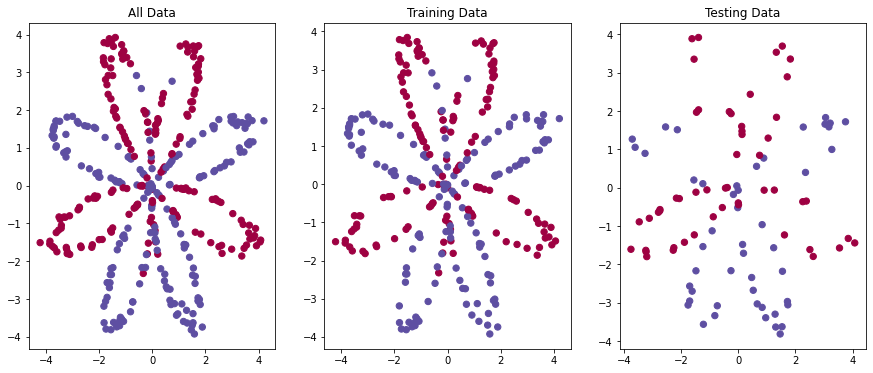

In [5]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = get_data()
X = np.append(X_train, X_test, axis=1)
Y = np.append(y_train, y_test, axis=1)

# Visualize the data:

print('Dimesions of training data (X_train): {}'.format(X_train.shape))
print('Dimesions of training labels (y_train): {}'.format(y_train.shape))
print('Dimesions of testing data (X_test): {}'.format(X_test.shape))
print('Dimesions of testing labels (y_test): {}'.format(y_test.shape))

fig = plt.figure(figsize=(15,6))
ax3 = fig.add_subplot(131)
ax3.set_title('All Data')
ax1 = fig.add_subplot(132)
ax1.set_title('Training Data')
ax2 = fig.add_subplot(133)
ax2.set_title('Testing Data')
ax1.scatter(X_train[0, :], X_train[1, :], c=y_train, s=40, cmap=plt.cm.Spectral)
ax2.scatter(X_test[0, :], X_test[1, :], c=y_test, s=40, cmap=plt.cm.Spectral);
ax3.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
plt.show()

# <font color='blue'> Train Neural Network Model</font>

In [6]:
model = NeuralNet(X_train, y_train, n_h = 4, num_iterations = 50000, learning_rate = 1.2, print_cost=True)
trained_model_parameters = model.train_model()
print(trained_model_parameters)

Cost after iteration 0: 0.693167
Cost after iteration 1000: 0.226464
Cost after iteration 2000: 0.211887
Cost after iteration 3000: 0.207531
Cost after iteration 4000: 0.205599
Cost after iteration 5000: 0.204580
Cost after iteration 6000: 0.203977
Cost after iteration 7000: 0.203582
Cost after iteration 8000: 0.203269
Cost after iteration 9000: 0.202624
Cost after iteration 10000: 0.202131
Cost after iteration 11000: 0.201763
Cost after iteration 12000: 0.201465
Cost after iteration 13000: 0.201211
Cost after iteration 14000: 0.200986
Cost after iteration 15000: 0.200784
Cost after iteration 16000: 0.200595
Cost after iteration 17000: 0.200418
Cost after iteration 18000: 0.200248
Cost after iteration 19000: 0.200083
Cost after iteration 20000: 0.199921
Cost after iteration 21000: 0.199761
Cost after iteration 22000: 0.199602
Cost after iteration 23000: 0.199443
Cost after iteration 24000: 0.199284
Cost after iteration 25000: 0.199124
Cost after iteration 26000: 0.198964
Cost after ite

# <font color='blue'> Perform Simple Test of Tuned Model Parameters</font>

In [7]:
p = model.predict(trained_model_parameters, X_test)
r = p == y_test.reshape(-1, )
correct_predictions = sum(r)
incorrect_predictions = len(p) - sum(r)
print('{}% accuracy'.format(correct_predictions/(correct_predictions + incorrect_predictions) * 100))

97.0% accuracy
